<a href="https://colab.research.google.com/github/joocahyadi/VESPA_NFT_22/blob/main/Lomba_NFT.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# NFT Creator Recommendations & Dashboard
This notebook holds the documentation of the **NFT Creator Recommendations & Dashboard** project, running on the goole colaboratory. 



# Import Libraries

Import every necessary library for the whole project. 

In [ ]:
pip install webcolors

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import plotly.express as px
import ast 
import plotly.graph_objects as go
import urllib, json
from webcolors import hex_to_rgb
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.cluster import SpectralClustering
from sklearn.cluster import AffinityPropagation
from sklearn.cluster import AgglomerativeClustering
from sklearn.mixture import GaussianMixture
from sklearn.cluster import ward_tree
from sklearn.cluster import MeanShift
from sklearn import metrics
from dateutil.relativedelta import relativedelta

# Load Data & Import files

Read and importing datasets for the project

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


Events Data Description

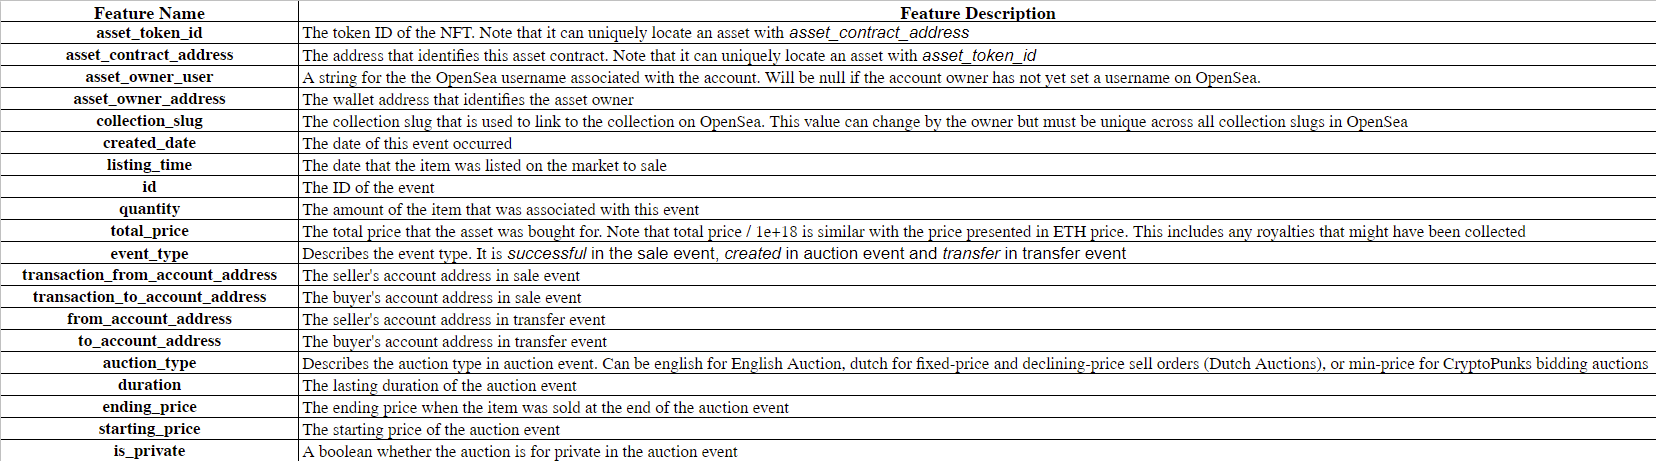

Assets Data Description

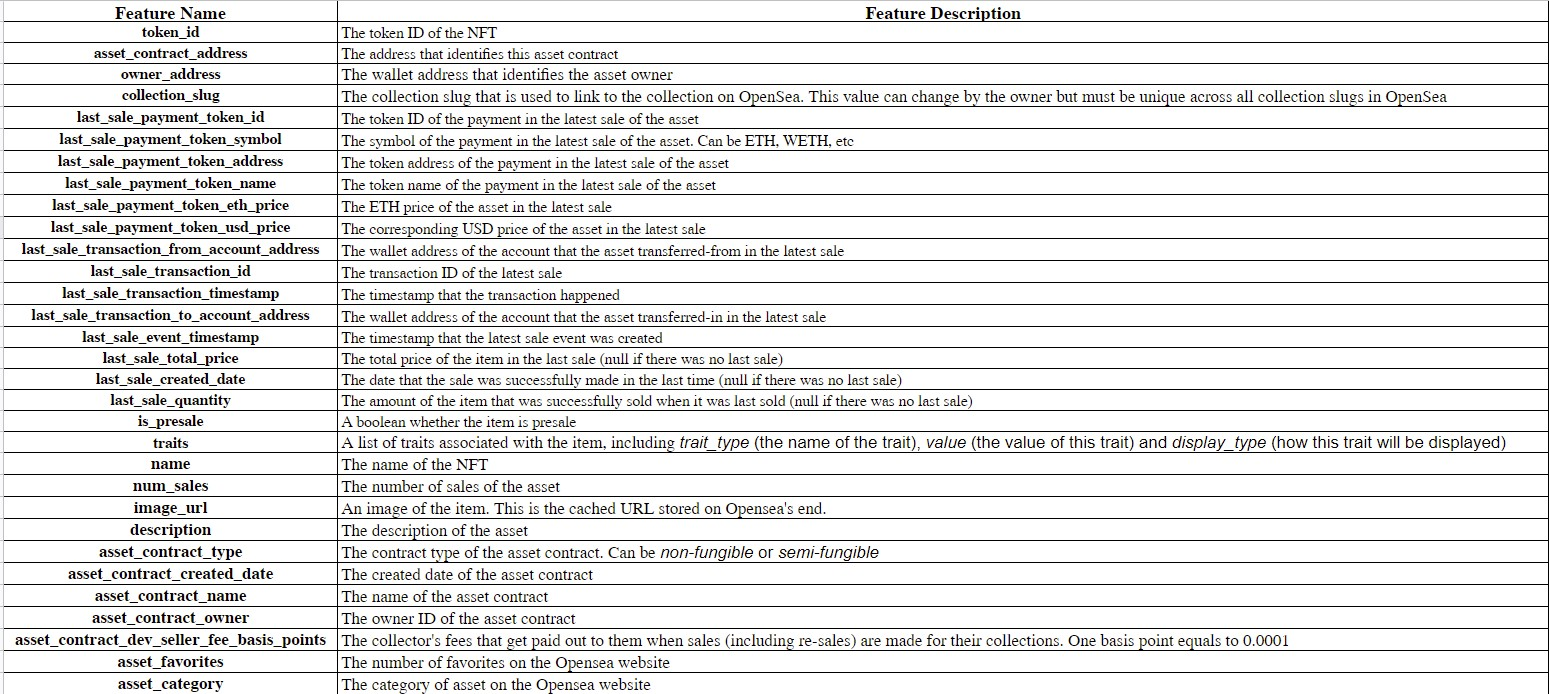

Collections Data Description

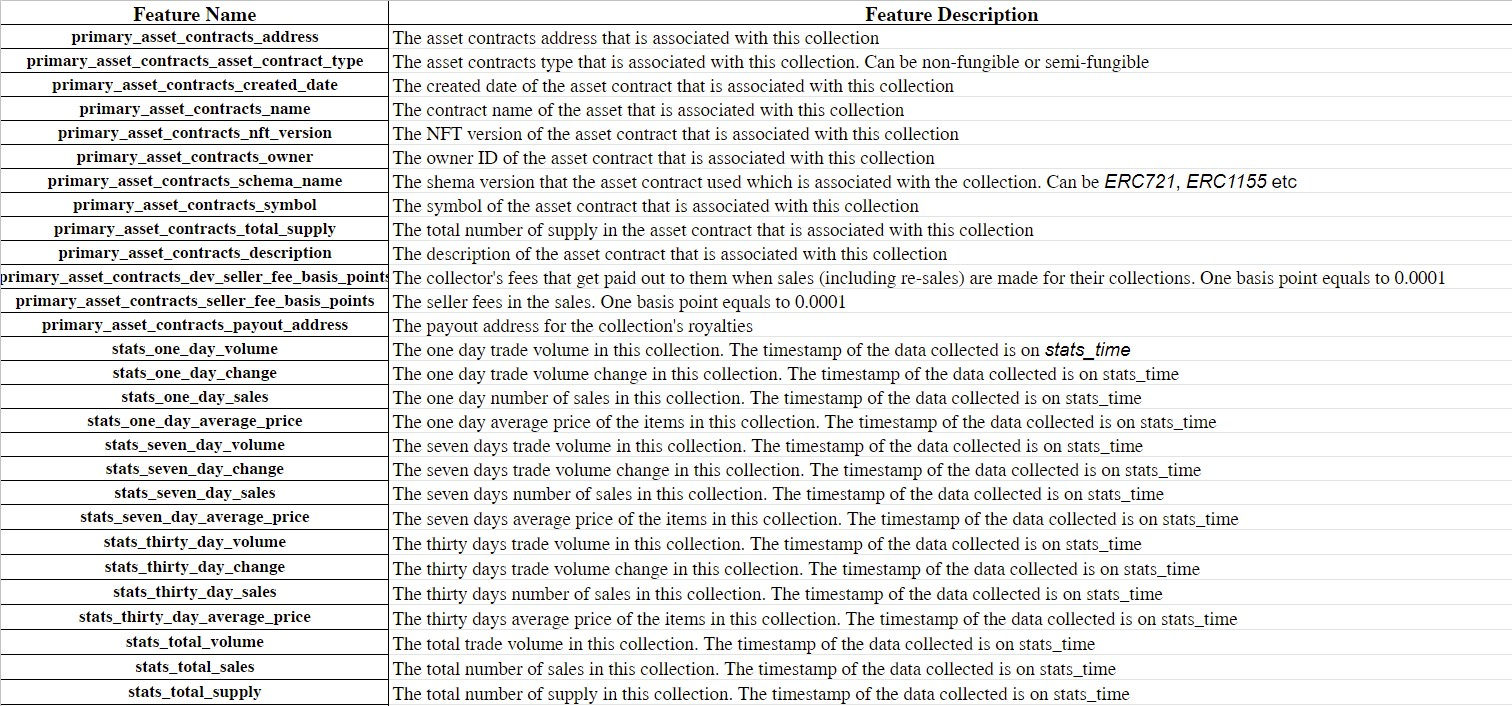

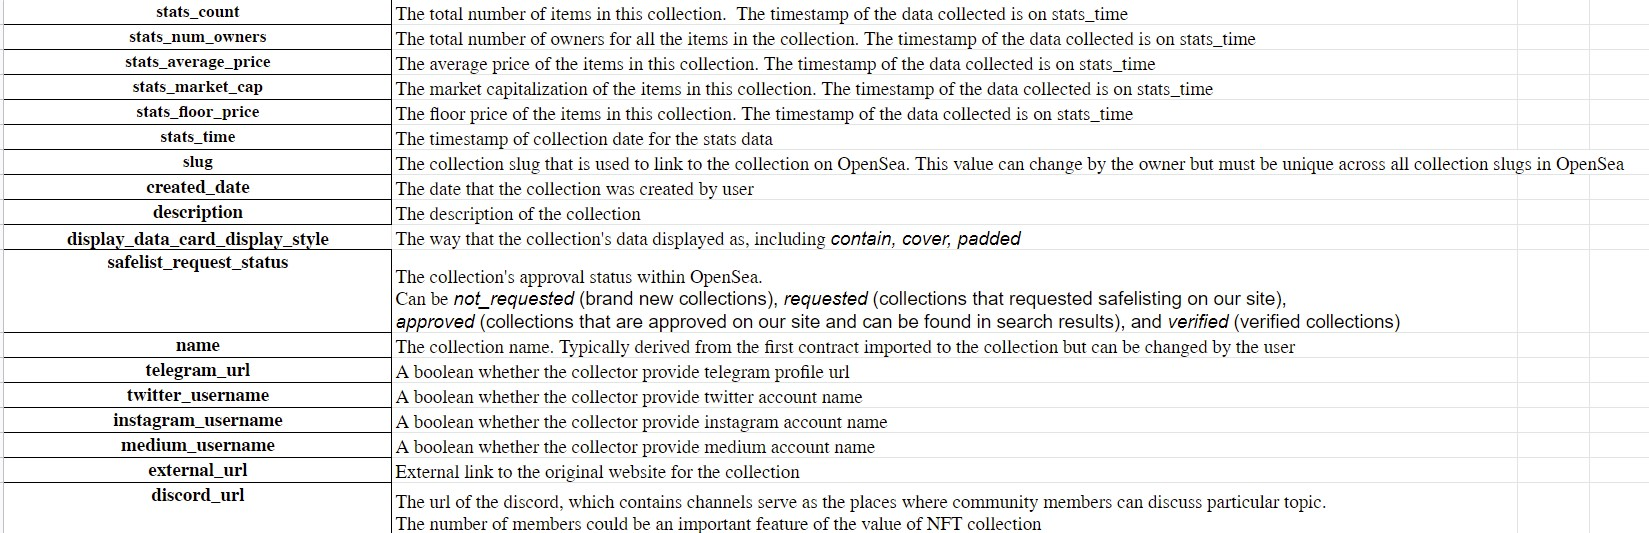

In [ ]:
# Old data
df_events = pd.read_csv('/content/drive/MyDrive/Lomba NFT 2022/data/events.csv')
df_assets = pd.read_csv('/content/drive/MyDrive/Lomba NFT 2022/data/Assets.csv')
df_collections = pd.read_csv('/content/drive/MyDrive/Lomba NFT 2022/data/Collections.csv')

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2882: DtypeWarning:

Columns (13,14) have mixed types.Specify dtype option on import or set low_memory=False.



In [ ]:
# New Data (Updated per 4 April 2022)
#df_events_new = pd.read_csv('/content/drive/MyDrive/Lomba NFT 2022/data/events - 4 April.csv')
#df_assets_new = pd.read_csv('/content/drive/MyDrive/Lomba NFT 2022/data/Assets - 4 April.csv')
#df_collections_new = pd.read_csv('/content/drive/MyDrive/Lomba NFT 2022/data/Collections - 4 April.csv')

In [ ]:
df_events2 = df_events.copy()
df_assets2 = df_assets.copy()
df_collections2 = df_collections.copy()

In [ ]:
df_events2[df_events2['starting_price'] < df_events2['ending_price']][['starting_price','ending_price']]

starting_price          ending_price
8004        6000000000000000      7000000000000000
8008       43000000000000000     70000000000000000
12381      10000000000000000      4000000000000000
15602      10000000000000000      8999999999999999
21085    5500000000000000000    700000000000000000
21298    5100000000000000000    700000000000000500
69523    4600000000000000000    700000000000000500
69680    3660000000000000000    700000000000000000
83021  100000000000000000000  99000000000000000000
83022   10000000000000000000   9000000000000000000
85791    1000000000000000000    400000000000000000
87385      10000000000000000       999999999999999

In [ ]:
df_events2[df_events2['starting_price'] > df_events2['ending_price']][['starting_price','ending_price']]

starting_price            ending_price
4366         10000000000000000         100000000000000
4367         50000000000000000        1000000000000000
5385        250000000000000000      200000000000000010
8471          7000000000000000        6000000000000000
9443         97000000000000000                       0
12377         8000000000000000        6000000000000000
16606        70000000000000000       49999999999999996
16607        60000000000000000       40000000000000003
17181       750000000000000000      179999999999999900
17883       500000000000000000      400000000000000020
17884       500000000000000000      349999999999999980
20721       199000000000000000      159999999999999990
20765      9000000000000000000     1500000000000000000
20771    150000000000000000000   149000000000000000000
21369     45000000000000000000    44000000000000000000
21370     45000000000000000000    40000000000000000000
47926     150000000000000000.0    125000000000000000.0
57523  300000000000000000000.0  30000000000000000000.0
57673    1000000000000000000.0    200000000000000000.0
57674    1000000000000000000.0    200000000000000000.0
58511    2850001000000000000.0   2850000000000000512.0
58512    1280010000000000000.0   1280000000000000000.0
58513     800010000000000000.0    800000000000000000.0
58514    1000100000000000000.0   1000000000000000000.0
58999  100000000000000000000.0  99000000000000000000.0
59947     650000000000000000.0    500000000000000000.0
59948     650000000000000000.0    600000000000000000.0
63188     880000000000000000.0    550000000000000000.0
72387       120000000000000000      100000000000000010
73292        99000000000000000       89999999999999992
82031     40000000000000000000    39000000000000000000
82032     20000000000000000000    19000000000000000000
82127      1890010000000000000     1889999999999999934
82128       750001000000000000      749999999999999971
82129       650010000000000000      650000000000000046
82130      1000100000000000000     1000000000000000011
82457      5000000000000000000      100000000000000000
82861      1890010000000000000     1889999999999999934
82862      1890010000000000000     1889999999999999934
82864      1001000000000000000     1000000000000000110
83153     25000000000000000000    20000000000000000000

# EDA

In [ ]:
# Show the top 5 rows of df_events
df_events.head()

asset_token_id  \
0  9652564406348144737240103651986701405835049840...   
1  9652564406348144737240103651986701405835049840...   
2  9652564406348144737240103651986701405835049840...   
3  9652564406348144737240103651986701405835049840...   
4  5108264144382047380331840980799559675300158545...   

                       asset_contract_address  \
0  0x495f947276749ce646f68ac8c248420045cb7b5e   
1  0x495f947276749ce646f68ac8c248420045cb7b5e   
2  0x495f947276749ce646f68ac8c248420045cb7b5e   
3  0x495f947276749ce646f68ac8c248420045cb7b5e   
4  0x495f947276749ce646f68ac8c248420045cb7b5e   

                          asset_owner_address asset_owner_user  \
0  0x0000000000000000000000000000000000000000      NullAddress   
1  0x0000000000000000000000000000000000000000      NullAddress   
2  0x0000000000000000000000000000000000000000      NullAddress   
3  0x0000000000000000000000000000000000000000      NullAddress   
4  0x0000000000000000000000000000000000000000      NullAddress   

  collection_slug                created_date          id  quantity  \
0        -persona  2022-02-26T22:36:39.940781  3707623152       1.0   
1        -persona  2022-02-05T13:24:04.330138  3280041145       1.0   
2        -persona  2022-02-05T13:22:43.723328  3280022640       1.0   
3        -persona  2022-02-02T13:58:26.564868  3222798752       1.0   
4         ibinola  2022-03-05T23:39:29.367868  3889292601       1.0   

          listing_time event_type total_price auction_type   duration  \
0  2022-02-26T22:36:33    created         NaN        dutch   744355.0   
1  2022-02-05T13:21:00    created         NaN        dutch  2592088.0   
2  2022-02-05T13:20:53    created         NaN        dutch   604895.0   
3                  NaN   transfer         NaN          NaN        NaN   
4  2022-03-05T23:37:27    created         NaN        dutch   557675.0   

         ending_price      starting_price is_private  \
0  150000000000000000  150000000000000000      False   
1  150000000000000000  150000000000000000      False   
2  150000000000000000  150000000000000000      False   
3                 NaN                 NaN        NaN   
4   70000000000000000   70000000000000000      False   

             transaction_from_account_address  \
0                                         NaN   
1                                         NaN   
2                                         NaN   
3                                         NaN   
4  0x911bf7f46044addd684f84fd4b15b8309ca3fa79   

               transaction_to_account_address  \
0                                         NaN   
1                                         NaN   
2                                         NaN   
3                                         NaN   
4  0x7f268357a8c2552623316e2562d90e642bb538e5   

                         from_account_address  \
0  0xd567941697e29e458b0cd46ef5d147fc653f546a   
1  0xd567941697e29e458b0cd46ef5d147fc653f546a   
2  0xd567941697e29e458b0cd46ef5d147fc653f546a   
3  0x0000000000000000000000000000000000000000   
4  0x911bf7f46044addd684f84fd4b15b8309ca3fa79   

                           to_account_address  
0  0xd567941697e29e458b0cd46ef5d147fc653f546a  
1                                         NaN  
2                                         NaN  
3                                         NaN  
4  0x911bf7f46044addd684f84fd4b15b8309ca3fa79

In [ ]:
#Check Asset contract Address
len(df_events) == len(df_events["asset_contract_address"].unique())

False

In [ ]:
# Show the top 5 rows of df_assets
df_assets.head()

token_id  \
0  1041544390811223925548137112510456274926830839...   
1  3408548560580985823464505673624610083362790836...   
2  2344366250094683526428341084644309510528416437...   
3  3038784457613480191389558437600275577887949373...   
4                                               6996   

                       asset_contract_address  \
0  0x495f947276749ce646f68ac8c248420045cb7b5e   
1  0x495f947276749ce646f68ac8c248420045cb7b5e   
2  0x495f947276749ce646f68ac8c248420045cb7b5e   
3  0x495f947276749ce646f68ac8c248420045cb7b5e   
4  0x417737d49a175d62625154262d8569d3890425ae   

                                owner_address   collection_slug  \
0  0x0000000000000000000000000000000000000000         spiritman   
1  0x0000000000000000000000000000000000000000       byteosaurus   
2  0x0000000000000000000000000000000000000000  crypto-totem-nft   
3  0x0000000000000000000000000000000000000000        ultrapunks   
4  0x02e49aaddeca1b6b27edd1f5f43b5ed3e2be12ce     whaletogether   

   last_sale_payment_token_id last_sale_payment_token_symbol  \
0                         NaN                            NaN   
1                         NaN                            NaN   
2                         NaN                            NaN   
3                         NaN                            NaN   
4                         1.0                            ETH   

              last_sale_payment_token_address last_sale_payment_token_name  \
0                                         NaN                          NaN   
1                                         NaN                          NaN   
2                                         NaN                          NaN   
3                                         NaN                          NaN   
4  0x0000000000000000000000000000000000000000                        Ether   

   last_sale_payment_token_eth_price  last_sale_payment_token_usd_price  ...  \
0                                NaN                                NaN  ...   
1                                NaN                                NaN  ...   
2                                NaN                                NaN  ...   
3                                NaN                                NaN  ...   
4                                1.0                            2657.88  ...   

  num_sales                                          image_url  \
0       0.0  https://lh3.googleusercontent.com/pUDYH7EnULJc...   
1       0.0  https://lh3.googleusercontent.com/NixgIufh8tt9...   
2       0.0  https://lh3.googleusercontent.com/F7JUs4kn5gfm...   
3       0.0  https://lh3.googleusercontent.com/pUq0zWz_C1tn...   
4       1.0  https://lh3.googleusercontent.com/ndXzObLk0INB...   

                                         description asset_contract_type  \
0                                                NaN       semi-fungible   
1                                                NaN       semi-fungible   
2  Crypto totem is a collection of 5555 totems cr...       semi-fungible   
3                          Ultra Cyberpunk right now       semi-fungible   
4  Alphie is the friendly alpha whale for the lit...        non-fungible   

  asset_contract_created_date asset_contract_name asset_contract_owner  \
0  2020-12-02T17:40:53.232025  OpenSea Collection             102384.0   
1  2020-12-02T17:40:53.232025  OpenSea Collection             102384.0   
2  2020-12-02T17:40:53.232025  OpenSea Collection             102384.0   
3  2020-12-02T17:40:53.232025  OpenSea Collection             102384.0   
4  2022-02-02T08:11:36.815197        AlphieWhales          242350928.0   

   asset_contract_dev_seller_fee_basis_points asset_favorites asset_category  
0                                         0.0               4            art  
1                                         0.0               1            art  
2                                         0.0               7            art  
3                                         0.0              

In [ ]:
# Show the top 5 rows of df_collections
df_collections.head()

primary_asset_contracts_address  \
0                                         NaN   
1                                         NaN   
2                                         NaN   
3                                         NaN   
4  0x417737d49a175d62625154262d8569d3890425ae   

  primary_asset_contracts_asset_contract_type  \
0                                         NaN   
1                                         NaN   
2                                         NaN   
3                                         NaN   
4                                non-fungible   

  primary_asset_contracts_created_date primary_asset_contracts_name  \
0                                  NaN                          NaN   
1                                  NaN                          NaN   
2                                  NaN                          NaN   
3                                  NaN                          NaN   
4           2022-02-02T08:11:36.815197                 AlphieWhales   

  primary_asset_contracts_nft_version  primary_asset_contracts_owner  \
0                                 NaN                            NaN   
1                                 NaN                            NaN   
2                                 NaN                            NaN   
3                                 NaN                            NaN   
4                                   3                    242350928.0   

  primary_asset_contracts_schema_name primary_asset_contracts_symbol  \
0                                 NaN                            NaN   
1                                 NaN                            NaN   
2                                 NaN                            NaN   
3                                 NaN                            NaN   
4                              ERC721                         ALPHIE   

   primary_asset_contracts_total_supply  \
0                                   NaN   
1                                   NaN   
2                                   NaN   
3                                   NaN   
4                                   0.0   

                 primary_asset_contracts_description  ...  \
0                                                NaN  ...   
1                                                NaN  ...   
2                                                NaN  ...   
3                                                NaN  ...   
4  A collection of 7,777 AlphieWhales that give y...  ...   

                                         description  \
0  Arri Novrizal[@fujhine](https://www.instagram....   
1  Amazing collection of 9666 unique NFT dinosaur...   
2  Crypto totem is a collection of 5555 totems cr...   
3  Ultra punks are punks inspired by official cry...   
4  A collection of 7,777 AlphieWhales that give y...   

   display_data_card_display_style safelist_request_status           name  \
0                          contain                approved     Spirit Man   
1                            cover                approved    Byteosaurus   
2                            cover                approved   Crypto-Totem   
3                            cover                approved     UltraPunks   
4                            cover                approved  WhaleTogether   

   telegram_url  twitter_username  instagram_username  discord_url  \
0             0                 1                   1            1   
1             1                 1                   0            1   
2             0                 0                   0            1   
3             1                 1                   0            1   
4             0                 0                   0            1   

   medium_username                             external_url  
0                0                  http://www.spiritman.io  
1                0                                      NaN  
2                0  http://cryptototem.fashionartworld.com/  
3                1                  

In [ ]:
# Show the info of df_events
df_events.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 87404 entries, 0 to 87403
Data columns (total 20 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   asset_token_id                    87404 non-null  object 
 1   asset_contract_address            87404 non-null  object 
 2   asset_owner_address               87404 non-null  object 
 3   asset_owner_user                  78076 non-null  object 
 4   collection_slug                   87404 non-null  object 
 5   created_date                      87404 non-null  object 
 6   id                                87404 non-null  int64  
 7   quantity                          87351 non-null  float64
 8   listing_time                      58756 non-null  object 
 9   event_type                        87404 non-null  object 
 10  total_price                       19614 non-null  object 
 11  auction_type                      41792 non-null  object 
 12  dura

In [ ]:
df_events.isna().sum() / len(df_events) * 100

asset_token_id                       0.000000
asset_contract_address               0.000000
asset_owner_address                  0.000000
asset_owner_user                    10.672280
collection_slug                      0.000000
created_date                         0.000000
id                                   0.000000
quantity                             0.060638
listing_time                        32.776532
event_type                           0.000000
total_price                         77.559379
auction_type                        52.185255
duration                            53.216100
ending_price                        52.375177
starting_price                      52.375177
is_private                          32.776532
transaction_from_account_address    69.319482
transaction_to_account_address      69.320626
from_account_address                23.315867
to_account_address                  90.927189
dtype: float64

In [ ]:
df_events2[df_events2.duplicated()] #check duplicates

Empty DataFrame
Columns: [asset_token_id, asset_contract_address, asset_owner_address, asset_owner_user, collection_slug, created_date, id, quantity, listing_time, event_type, total_price, auction_type, duration, ending_price, starting_price, is_private, transaction_from_account_address, transaction_to_account_address, from_account_address, to_account_address]
Index: []

In [ ]:
df_assets2[df_assets2.duplicated()] #check duplicates

Empty DataFrame
Columns: [token_id, asset_contract_address, owner_address, collection_slug, last_sale_payment_token_id, last_sale_payment_token_symbol, last_sale_payment_token_address, last_sale_payment_token_name, last_sale_payment_token_eth_price, last_sale_payment_token_usd_price, last_sale_transaction_from_account_address, last_sale_transaction_id, last_sale_transaction_timestamp, last_sale_transaction_to_account_address, last_sale_event_timestamp, last_sale_total_price, last_sale_created_date, last_sale_quantity, is_presale, traits, name, num_sales, image_url, description, asset_contract_type, asset_contract_created_date, asset_contract_name, asset_contract_owner, asset_contract_dev_seller_fee_basis_points, asset_favorites, asset_category]
Index: []

[0 rows x 31 columns]

In [ ]:
df_collections2[df_collections2.duplicated()] #check duplicates

Empty DataFrame
Columns: [primary_asset_contracts_address, primary_asset_contracts_asset_contract_type, primary_asset_contracts_created_date, primary_asset_contracts_name, primary_asset_contracts_nft_version, primary_asset_contracts_owner, primary_asset_contracts_schema_name, primary_asset_contracts_symbol, primary_asset_contracts_total_supply, primary_asset_contracts_description, primary_asset_contracts_dev_seller_fee_basis_points, primary_asset_contracts_seller_fee_basis_points, primary_asset_contracts_payout_address, stats_one_day_volume, stats_one_day_change, stats_one_day_sales, stats_one_day_average_price, stats_seven_day_volume, stats_seven_day_change, stats_seven_day_sales, stats_seven_day_average_price, stats_thirty_day_volume, stats_thirty_day_change, stats_thirty_day_sales, stats_thirty_day_average_price, stats_total_volume, stats_total_sales, stats_total_supply, stats_count, stats_num_owners, stats_average_price, stats_market_cap, stats_floor_price, slug, stats_time, created_date, description, display_data_card_display_style, safelist_request_status, name, telegram_url, twitter_username, instagram_username, discord_url, medium_username, external_url]
Index: []

[0 rows x 46 columns]

In [ ]:
# Show the info of df_assets
df_assets.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16550 entries, 0 to 16549
Data columns (total 31 columns):
 #   Column                                      Non-Null Count  Dtype  
---  ------                                      --------------  -----  
 0   token_id                                    16549 non-null  object 
 1   asset_contract_address                      16549 non-null  object 
 2   owner_address                               16549 non-null  object 
 3   collection_slug                             16549 non-null  object 
 4   last_sale_payment_token_id                  8193 non-null   float64
 5   last_sale_payment_token_symbol              8193 non-null   object 
 6   last_sale_payment_token_address             8193 non-null   object 
 7   last_sale_payment_token_name                8193 non-null   object 
 8   last_sale_payment_token_eth_price           8193 non-null   float64
 9   last_sale_payment_token_usd_price           8193 non-null   float64
 10  last_sale_

In [ ]:
# Show the info of df_collections
df_collections.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1427 entries, 0 to 1426
Data columns (total 46 columns):
 #   Column                                               Non-Null Count  Dtype  
---  ------                                               --------------  -----  
 0   primary_asset_contracts_address                      962 non-null    object 
 1   primary_asset_contracts_asset_contract_type          962 non-null    object 
 2   primary_asset_contracts_created_date                 962 non-null    object 
 3   primary_asset_contracts_name                         961 non-null    object 
 4   primary_asset_contracts_nft_version                  870 non-null    object 
 5   primary_asset_contracts_owner                        909 non-null    float64
 6   primary_asset_contracts_schema_name                  962 non-null    object 
 7   primary_asset_contracts_symbol                       894 non-null    object 
 8   primary_asset_contracts_total_supply                 772 non-null   

In [ ]:
df_assets2[df_assets2.duplicated()]

Empty DataFrame
Columns: [token_id, asset_contract_address, owner_address, collection_slug, last_sale_payment_token_id, last_sale_payment_token_symbol, last_sale_payment_token_address, last_sale_payment_token_name, last_sale_payment_token_eth_price, last_sale_payment_token_usd_price, last_sale_transaction_from_account_address, last_sale_transaction_id, last_sale_transaction_timestamp, last_sale_transaction_to_account_address, last_sale_event_timestamp, last_sale_total_price, last_sale_created_date, last_sale_quantity, is_presale, traits, name, num_sales, image_url, description, asset_contract_type, asset_contract_created_date, asset_contract_name, asset_contract_owner, asset_contract_dev_seller_fee_basis_points, asset_favorites, asset_category]
Index: []

[0 rows x 31 columns]

# Dataset's columns Visualization

Retrieving informations by plotting important columns on each datasets

## Events Dataset

###Formatting Columns

In [ ]:
# Convert total_price column to 'float' and ETH
df_events['total_price']    = df_events['total_price'].apply(lambda x: float(x) / 10**(18) if type(x) != 'float' else  x)
df_events['starting_price'] = df_events['starting_price'].apply(lambda x: float(x) / 10**(18) if type(x) != 'float' else  x)
df_events['ending_price']   = df_events['ending_price'].apply(lambda x: float(x) / 10**(18) if type(x) != 'float' else  x)

#Convert Date to datetime
df_events['created_date'] = pd.to_datetime(df_events['created_date'])
df_events['listing_time'] = pd.to_datetime(df_events['listing_time'])

#Label encoding
df_events["auction_type"] = df_events["auction_type"].map(dict(zip(df_events["auction_type"].dropna().unique(), [i for i in range(len(df_events["auction_type"].dropna().unique()))])))
df_events["is_private"] = df_events["is_private"].map(dict(zip(df_events["is_private"].dropna().unique(), [i for i in range(len(df_events["is_private"].dropna().unique()))])))
df_events["event_type"] = df_events["event_type"].map(dict(zip(df_events["event_type"].dropna().unique(), [i for i in range(len(df_events["event_type"].dropna().unique()))])))

#Create market time and price differents columns
df_events['market_time'] = (df_events['created_date'] - df_events['listing_time']).apply(lambda x: x.seconds / 60)
df_events['price_diff'] = df_events['ending_price'] - df_events['starting_price']

#Convert to Date without seconds
df_events['created_date'] = df_events['created_date'].dt.date

In [ ]:
(df_events2["event_type"].dropna().unique())

array(['created', 'transfer', 'successful', 'offer_entered',
       'bid_entered', 'cancelled', 'bid_withdrawn', 'approve'],
      dtype=object)

In [ ]:
df_events.head()

asset_token_id  \
0  9652564406348144737240103651986701405835049840...   
1  9652564406348144737240103651986701405835049840...   
2  9652564406348144737240103651986701405835049840...   
3  9652564406348144737240103651986701405835049840...   
4  5108264144382047380331840980799559675300158545...   

                       asset_contract_address  \
0  0x495f947276749ce646f68ac8c248420045cb7b5e   
1  0x495f947276749ce646f68ac8c248420045cb7b5e   
2  0x495f947276749ce646f68ac8c248420045cb7b5e   
3  0x495f947276749ce646f68ac8c248420045cb7b5e   
4  0x495f947276749ce646f68ac8c248420045cb7b5e   

                          asset_owner_address asset_owner_user  \
0  0x0000000000000000000000000000000000000000      NullAddress   
1  0x0000000000000000000000000000000000000000      NullAddress   
2  0x0000000000000000000000000000000000000000      NullAddress   
3  0x0000000000000000000000000000000000000000      NullAddress   
4  0x0000000000000000000000000000000000000000      NullAddress   

  collection_slug created_date          id  quantity        listing_time  \
0        -persona   2022-02-26  3707623152       1.0 2022-02-26 22:36:33   
1        -persona   2022-02-05  3280041145       1.0 2022-02-05 13:21:00   
2        -persona   2022-02-05  3280022640       1.0 2022-02-05 13:20:53   
3        -persona   2022-02-02  3222798752       1.0                 NaT   
4         ibinola   2022-03-05  3889292601       1.0 2022-03-05 23:37:27   

   event_type  ...   duration  ending_price  starting_price  is_private  \
0           0  ...   744355.0          0.15            0.15         0.0   
1           0  ...  2592088.0          0.15            0.15         0.0   
2           0  ...   604895.0          0.15            0.15         0.0   
3           1  ...        NaN           NaN             NaN         NaN   
4           0  ...   557675.0          0.07            0.07         0.0   

             transaction_from_account_address  \
0                                         NaN   
1                                         NaN   
2                                         NaN   
3                                         NaN   
4  0x911bf7f46044addd684f84fd4b15b8309ca3fa79   

               transaction_to_account_address  \
0                                         NaN   
1                                         NaN   
2                                         NaN   
3                                         NaN   
4  0x7f268357a8c2552623316e2562d90e642bb538e5   

                         from_account_address  \
0  0xd567941697e29e458b0cd46ef5d147fc653f546a   
1  0xd567941697e29e458b0cd46ef5d147fc653f546a   
2  0xd567941697e29e458b0cd46ef5d147fc653f546a   
3  0x0000000000000000000000000000000000000000   
4  0x911bf7f46044addd684f84fd4b15b8309ca3fa79   

                           to_account_address market_time price_diff  
0  0xd567941697e29e458b0cd46ef5d147fc653f546a    0.100000        0.0  
1                                         NaN    3.066667        0.0  
2                                         NaN    1.833333        0.0  
3                                         NaN         NaN        NaN  
4  0x911bf7f46044addd684f84fd4b15b8309ca3fa79    2.033333        0.0  

[5 rows x 22 columns]

In [ ]:
df_events2['event_type'].dropna().unique()

array(['created', 'transfer', 'successful', 'offer_entered',
       'bid_entered', 'cancelled', 'bid_withdrawn', 'approve'],
      dtype=object)

### Plot

In [ ]:
df_events2['event_type'].unique()

array(['created', 'transfer', 'successful', 'offer_entered',
       'bid_entered', 'cancelled', 'bid_withdrawn', 'approve'],
      dtype=object)

In [ ]:
# Total_price from 23 January 2018 - 6 March 2022
total_price_plot = px.line(df_events[df_events['event_type'] == 2].sort_values('created_date').groupby('created_date').sum().reset_index().sort_values(by = "created_date"), x='created_date', y='total_price', title='Total Price')
total_price_plot.show()

In [ ]:
# Number of transactions 23 January 2018 - 6 March 2022
total_price_plot = px.line(df_events[df_events['event_type'] == 2].sort_values('created_date').groupby('created_date').count().reset_index(), x='created_date', y='total_price', title='Number of Transactions 23 January 2018 - 6 March 2022')
total_price_plot.show()

In [ ]:
df_events["created_date"]

0        2022-02-26
1        2022-02-05
2        2022-02-05
3        2022-02-02
4        2022-03-05
            ...    
87399    2022-02-02
87400    2021-09-14
87401    2021-09-09
87402    2021-09-07
87403    2022-02-26
Name: created_date, Length: 87404, dtype: object

In [ ]:
type(df_events2["created_date"].iloc[0])

str

In [ ]:
df_events2[(df_events2["event_type"] == "successful") & (df_events2["created_date"].str.contains("2022-03-06"))]["created_date"].sort_values()

30851    2022-03-06T00:00:30.969693
1372     2022-03-06T00:02:47.286461
8265     2022-03-06T00:04:27.525997
9205     2022-03-06T00:06:28.556572
1745     2022-03-06T00:06:51.044890
                    ...            
1737     2022-03-06T01:59:56.298196
1512     2022-03-06T01:59:57.052629
15684    2022-03-06T01:59:57.274451
28183    2022-03-06T02:27:05.435662
21341    2022-03-06T02:27:08.787809
Name: created_date, Length: 344, dtype: object

In [ ]:
#Auction Start&Ending Price Difference (Ending Price - Starting Price in Auction Events) 
hist = px.histogram(df_events[df_events['price_diff'].notna()]['price_diff'], title='Auction Start & Ending Price Difference 23 January 2018 - 6 March 2022', labels = {'value':'Difference in ETH', 'count':'Count'})
hist.show()

In [ ]:
df_events[df_events['price_diff'].notna()]['price_diff'].describe(percentiles = [0.0001, 0.005, 0.01, 0.05, 0.1, 0.15, 0.2])

count    41626.000000
mean        -0.007672
std          1.325231
min       -270.000000
0.01%       -4.883750
0.5%         0.000000
1%           0.000000
5%           0.000000
10%          0.000000
15%          0.000000
20%          0.000000
50%          0.000000
max          0.027000
Name: price_diff, dtype: float64

In [ ]:
df_events[df_events['price_diff'] == -270]

asset_token_id  \
57523  1178673830799948215828344588240196847295918223...   

                           asset_contract_address  \
57523  0x57f1887a8bf19b14fc0df6fd9b2acc9af147ea85   

                              asset_owner_address asset_owner_user  \
57523  0xbb49c781bd22c93c392a9b1e290501252b598ac3         onlyname   

      collection_slug created_date         id  quantity        listing_time  \
57523             ens   2021-08-29  689527688       1.0 2021-08-29 23:45:45   

       event_type  ...  duration  ending_price  starting_price  is_private  \
57523           0  ...  432082.0          30.0           300.0         0.0   

       transaction_from_account_address  transaction_to_account_address  \
57523                               NaN                             NaN   

                             from_account_address to_account_address  \
57523  0xbb49c781bd22c93c392a9b1e290501252b598ac3                NaN   

      market_time price_diff  
57523    1.733333     -270.0  

[1 rows x 22 columns]

In [ ]:
df_events.head()

asset_token_id  \
0  9652564406348144737240103651986701405835049840...   
1  9652564406348144737240103651986701405835049840...   
2  9652564406348144737240103651986701405835049840...   
3  9652564406348144737240103651986701405835049840...   
4  5108264144382047380331840980799559675300158545...   

                       asset_contract_address  \
0  0x495f947276749ce646f68ac8c248420045cb7b5e   
1  0x495f947276749ce646f68ac8c248420045cb7b5e   
2  0x495f947276749ce646f68ac8c248420045cb7b5e   
3  0x495f947276749ce646f68ac8c248420045cb7b5e   
4  0x495f947276749ce646f68ac8c248420045cb7b5e   

                          asset_owner_address asset_owner_user  \
0  0x0000000000000000000000000000000000000000      NullAddress   
1  0x0000000000000000000000000000000000000000      NullAddress   
2  0x0000000000000000000000000000000000000000      NullAddress   
3  0x0000000000000000000000000000000000000000      NullAddress   
4  0x0000000000000000000000000000000000000000      NullAddress   

  collection_slug created_date          id  quantity        listing_time  \
0        -persona   2022-02-26  3707623152       1.0 2022-02-26 22:36:33   
1        -persona   2022-02-05  3280041145       1.0 2022-02-05 13:21:00   
2        -persona   2022-02-05  3280022640       1.0 2022-02-05 13:20:53   
3        -persona   2022-02-02  3222798752       1.0                 NaT   
4         ibinola   2022-03-05  3889292601       1.0 2022-03-05 23:37:27   

   event_type  ...   duration  ending_price  starting_price  is_private  \
0           0  ...   744355.0          0.15            0.15         0.0   
1           0  ...  2592088.0          0.15            0.15         0.0   
2           0  ...   604895.0          0.15            0.15         0.0   
3           1  ...        NaN           NaN             NaN         NaN   
4           0  ...   557675.0          0.07            0.07         0.0   

             transaction_from_account_address  \
0                                         NaN   
1                                         NaN   
2                                         NaN   
3                                         NaN   
4  0x911bf7f46044addd684f84fd4b15b8309ca3fa79   

               transaction_to_account_address  \
0                                         NaN   
1                                         NaN   
2                                         NaN   
3                                         NaN   
4  0x7f268357a8c2552623316e2562d90e642bb538e5   

                         from_account_address  \
0  0xd567941697e29e458b0cd46ef5d147fc653f546a   
1  0xd567941697e29e458b0cd46ef5d147fc653f546a   
2  0xd567941697e29e458b0cd46ef5d147fc653f546a   
3  0x0000000000000000000000000000000000000000   
4  0x911bf7f46044addd684f84fd4b15b8309ca3fa79   

                           to_account_address market_time price_diff  
0  0xd567941697e29e458b0cd46ef5d147fc653f546a    0.100000        0.0  
1                                         NaN    3.066667        0.0  
2                                         NaN    1.833333        0.0  
3                                         NaN         NaN        NaN  
4  0x911bf7f46044addd684f84fd4b15b8309ca3fa79    2.033333        0.0  

[5 rows x 22 columns]

In [ ]:
#Duration dari waktu NFT di create sampai terjual
hist = px.histogram(df_events[df_events['event_type'] == 2]['market_time'], title='Market Time Distribution 23 January 2018 - 6 March 2022', labels = {'value':'Minutes', 'count':'Count'})
hist.show()

In [ ]:
df_events[df_events['event_type'] == 2]['market_time'].describe()

count    16942.000000
mean       409.460579
std        425.740112
min          0.050000
25%         37.020833
50%        244.400000
75%        704.050000
max       1439.283333
Name: market_time, dtype: float64

In [ ]:
df_events2[["created_date", "listing_time"]]

created_date         listing_time
0      2022-02-26T22:36:39.940781  2022-02-26T22:36:33
1      2022-02-05T13:24:04.330138  2022-02-05T13:21:00
2      2022-02-05T13:22:43.723328  2022-02-05T13:20:53
3      2022-02-02T13:58:26.564868                  NaN
4      2022-03-05T23:39:29.367868  2022-03-05T23:37:27
...                           ...                  ...
87399  2022-02-02T05:40:07.193873                  NaN
87400  2021-09-14T05:59:43.174135  2021-09-14T05:58:00
87401  2021-09-09T23:47:41.857057  2021-09-09T23:45:58
87402  2021-09-07T06:58:21.354107  2021-09-07T06:56:39
87403  2022-02-26T18:11:53.451056                  NaN

[87404 rows x 2 columns]

In [ ]:
df_events2[['auction_type']].value_counts()

auction_type
dutch           41326
english           461
min_price           5
dtype: int64

In [ ]:
df_events[['auction_type']].value_counts()

auction_type
0.0             41326
1.0               461
2.0                 5
dtype: int64

In [ ]:
df_events[df_events['auction_type'] == 0]['price_diff'].unique()

array([ 0.00000000e+00, -9.90000000e-03, -4.90000000e-02, -5.00000000e-02,
        1.00000000e-03,             nan,  2.70000000e-02, -1.00000000e-03,
       -9.70000000e-02, -2.00000000e-03, -6.00000000e-03, -1.00000000e-03,
       -2.00000000e-02, -2.00000000e-02, -5.70000000e-01, -1.00000000e-01,
       -1.50000000e-01, -3.90000000e-02, -7.50000000e+00, -1.00000000e+00,
       -4.80000000e+00, -4.40000000e+00, -5.00000000e+00, -2.50000000e-02,
       -2.70000000e+02, -8.00000000e-01, -9.99999999e-07, -1.00000000e-05,
       -1.00000000e-05, -1.00000000e-04, -5.00000000e-02, -3.30000000e-01,
       -3.90000000e+00, -2.96000000e+00, -2.00000000e-02, -9.00000000e-03,
       -1.00000000e-06, -4.90000000e+00, -1.00000000e-03, -6.00000000e-01,
       -9.00000000e-03])

In [ ]:
df_events[df_events['auction_type'] == 1]['price_diff'].unique()[0]

0.0

In [ ]:
df_events[(df_events['auction_type'] == 0) & (df_events['price_diff'] > 0)][['asset_token_id','asset_contract_address']]

asset_token_id                      asset_contract_address
8004         281239  0x06012c8cf97bead5deae237070f9587f8e7a266d
8008         281239  0x06012c8cf97bead5deae237070f9587f8e7a266d

In [ ]:
df_events.head(1)

asset_token_id  \
0  9652564406348144737240103651986701405835049840...   

                       asset_contract_address  \
0  0x495f947276749ce646f68ac8c248420045cb7b5e   

                          asset_owner_address asset_owner_user  \
0  0x0000000000000000000000000000000000000000      NullAddress   

  collection_slug created_date          id  quantity        listing_time  \
0        -persona   2022-02-26  3707623152       1.0 2022-02-26 22:36:33   

   event_type  ...  duration  ending_price  starting_price  is_private  \
0           0  ...  744355.0          0.15            0.15         0.0   

   transaction_from_account_address  transaction_to_account_address  \
0                               NaN                             NaN   

                         from_account_address  \
0  0xd567941697e29e458b0cd46ef5d147fc653f546a   

                           to_account_address market_time price_diff  
0  0xd567941697e29e458b0cd46ef5d147fc653f546a         0.1        0.0  

[1 rows x 22 columns]

In [ ]:
df_events2.head(1)

asset_token_id  \
0  9652564406348144737240103651986701405835049840...   

                       asset_contract_address  \
0  0x495f947276749ce646f68ac8c248420045cb7b5e   

                          asset_owner_address asset_owner_user  \
0  0x0000000000000000000000000000000000000000      NullAddress   

  collection_slug                created_date          id  quantity  \
0        -persona  2022-02-26T22:36:39.940781  3707623152       1.0   

          listing_time event_type total_price auction_type  duration  \
0  2022-02-26T22:36:33    created         NaN        dutch  744355.0   

         ending_price      starting_price is_private  \
0  150000000000000000  150000000000000000      False   

  transaction_from_account_address transaction_to_account_address  \
0                              NaN                            NaN   

                         from_account_address  \
0  0xd567941697e29e458b0cd46ef5d147fc653f546a   

                           to_account_address  
0  0xd567941697e29e458b0cd46ef5d147fc653f546a

In [ ]:
df_events2['asset_contract_address'].value_counts()

0x495f947276749ce646f68ac8c248420045cb7b5e    29972
0x57f1887a8bf19b14fc0df6fd9b2acc9af147ea85     5358
0x76be3b62873462d2142405439777e971754e8e77     4476
0xc36cf0cfcb5d905b8b513860db0cfe63f6cf9f5c     2827
0x82f5ef9ddc3d231962ba57a9c2ebb307dc8d26c2     1807
                                              ...  
0x30917a657ae7d1132bdca40187d781fa3b60002f        1
0xf8a8db29a9fba05ac4e36b8d7df6d47d120247fd        1
0xa9ee01aee0704bef7076d6e42c311d4fcf633444        1
0x236ebe2257ed8bd59299d61fe41baee2ccf8ed28        1
0x80adb36595239fe918c7d118c1f81e07d070801a        1
Name: asset_contract_address, Length: 966, dtype: int64

In [ ]:
df_events2[df_events2['asset_contract_address'] == '0x57f1887a8bf19b14fc0df6fd9b2acc9af147ea85']

asset_token_id  \
13125  8018491101180283663990677604045933322651102510...   
13126  8018491101180283663990677604045933322651102510...   
13127  8018491101180283663990677604045933322651102510...   
13128  8018491101180283663990677604045933322651102510...   
13129  8018491101180283663990677604045933322651102510...   
...                                                  ...   
83629  8986796163385812117936310515564874828021254925...   
83630  8986796163385812117936310515564874828021254925...   
83631  8986796163385812117936310515564874828021254925...   
83632  8986796163385812117936310515564874828021254925...   
83633  8986796163385812117936310515564874828021254925...   

                           asset_contract_address  \
13125  0x57f1887a8bf19b14fc0df6fd9b2acc9af147ea85   
13126  0x57f1887a8bf19b14fc0df6fd9b2acc9af147ea85   
13127  0x57f1887a8bf19b14fc0df6fd9b2acc9af147ea85   
13128  0x57f1887a8bf19b14fc0df6fd9b2acc9af147ea85   
13129  0x57f1887a8bf19b14fc0df6fd9b2acc9af147ea85   
...                                           ...   
83629  0x57f1887a8bf19b14fc0df6fd9b2acc9af147ea85   
83630  0x57f1887a8bf19b14fc0df6fd9b2acc9af147ea85   
83631  0x57f1887a8bf19b14fc0df6fd9b2acc9af147ea85   
83632  0x57f1887a8bf19b14fc0df6fd9b2acc9af147ea85   
83633  0x57f1887a8bf19b14fc0df6fd9b2acc9af147ea85   

                              asset_owner_address asset_owner_user  \
13125  0xcbd0e5b2ce3b2c4f1de4d54a94fef2445fd2058c    KnightMoon_JP   
13126  0xcbd0e5b2ce3b2c4f1de4d54a94fef2445fd2058c    KnightMoon_JP   
13127  0xcbd0e5b2ce3b2c4f1de4d54a94fef2445fd2058c    KnightMoon_JP   
13128  0xcbd0e5b2ce3b2c4f1de4d54a94fef2445fd2058c    KnightMoon_JP   
13129  0xcbd0e5b2ce3b2c4f1de4d54a94fef2445fd2058c    KnightMoon_JP   
...                                           ...              ...   
83629  0x5583347e299dfe16247224797704e093caee28a1             v587   
83630  0x5583347e299dfe16247224797704e093caee28a1             v587   
83631  0x5583347e299dfe16247224797704e093caee28a1             v587   
83632  0x5583347e299dfe16247224797704e093caee28a1             v587   
83633  0x5583347e299dfe16247224797704e093caee28a1             v587   

      collection_slug                created_date          id  quantity  \
13125             ens  2022-03-04T06:04:39.175567  3843642827       1.0   
13126             ens  2022-03-01T16:46:10.324394  3777763819       1.0   
13127             ens  2022-02-27T07:29:32.242940  3716819471       1.0   
13128             ens  2022-02-27T07:25:21.080847  3716748378       1.0   
13129             ens  2022-02-27T07:25:20.917920  3716748323       1.0   
...               ...                         ...         ...       ...   
83629             ens  2022-03-03T19:22:42.634816  3832853089       1.0   
83630             ens  2022-03-03T19:20:36.560973  3832807446       1.0   
83631             ens  2022-03-03T16:58:09.209293  3830474018       1.0   
83632             ens  2020-12-03T02:56:45.893236    75562678       1.0   
83633             ens  2020-11-02T04:51:39.321811    74651987       1.0   

                     listing_time event_type            total_price  \
13125         2022-03-04T06:02:55    created                    NaN   
13126         2022-03-01T16:44:25    created                    NaN   
13127         2022-02-27T07:27:47    created                    NaN   
13128                         NaN   transfer                    NaN   
13129                         NaN   transfer                    NaN   
...                           ...        ...                    ...   
83629         2022-03-03T19:20:55    created                    NaN   
83630  2022-03-03T16:58:09.150663  cancelled  500000000000000000000   
83631  2022-03-03T16:58:09.150663    created                    NaN   
83632                         NaN    created                    NaN   
83633                         NaN    created                    NaN   

      auction_type    duration             ending_price  \
13125        dutch    384173.0

In [ ]:
df_events['asset_token_id'].head(1)

0    9652564406348144737240103651986701405835049840...
Name: asset_token_id, dtype: object

## Assets Dataset

In [ ]:
df_assets2.head()

token_id  \
0  1041544390811223925548137112510456274926830839...   
1  3408548560580985823464505673624610083362790836...   
2  2344366250094683526428341084644309510528416437...   
3  3038784457613480191389558437600275577887949373...   
4                                               6996   

                       asset_contract_address  \
0  0x495f947276749ce646f68ac8c248420045cb7b5e   
1  0x495f947276749ce646f68ac8c248420045cb7b5e   
2  0x495f947276749ce646f68ac8c248420045cb7b5e   
3  0x495f947276749ce646f68ac8c248420045cb7b5e   
4  0x417737d49a175d62625154262d8569d3890425ae   

                                owner_address   collection_slug  \
0  0x0000000000000000000000000000000000000000         spiritman   
1  0x0000000000000000000000000000000000000000       byteosaurus   
2  0x0000000000000000000000000000000000000000  crypto-totem-nft   
3  0x0000000000000000000000000000000000000000        ultrapunks   
4  0x02e49aaddeca1b6b27edd1f5f43b5ed3e2be12ce     whaletogether   

   last_sale_payment_token_id last_sale_payment_token_symbol  \
0                         NaN                            NaN   
1                         NaN                            NaN   
2                         NaN                            NaN   
3                         NaN                            NaN   
4                         1.0                            ETH   

              last_sale_payment_token_address last_sale_payment_token_name  \
0                                         NaN                          NaN   
1                                         NaN                          NaN   
2                                         NaN                          NaN   
3                                         NaN                          NaN   
4  0x0000000000000000000000000000000000000000                        Ether   

   last_sale_payment_token_eth_price  last_sale_payment_token_usd_price  ...  \
0                                NaN                                NaN  ...   
1                                NaN                                NaN  ...   
2                                NaN                                NaN  ...   
3                                NaN                                NaN  ...   
4                                1.0                            2657.88  ...   

  num_sales                                          image_url  \
0       0.0  https://lh3.googleusercontent.com/pUDYH7EnULJc...   
1       0.0  https://lh3.googleusercontent.com/NixgIufh8tt9...   
2       0.0  https://lh3.googleusercontent.com/F7JUs4kn5gfm...   
3       0.0  https://lh3.googleusercontent.com/pUq0zWz_C1tn...   
4       1.0  https://lh3.googleusercontent.com/ndXzObLk0INB...   

                                         description asset_contract_type  \
0                                                NaN       semi-fungible   
1                                                NaN       semi-fungible   
2  Crypto totem is a collection of 5555 totems cr...       semi-fungible   
3                          Ultra Cyberpunk right now       semi-fungible   
4  Alphie is the friendly alpha whale for the lit...        non-fungible   

  asset_contract_created_date asset_contract_name asset_contract_owner  \
0  2020-12-02T17:40:53.232025  OpenSea Collection             102384.0   
1  2020-12-02T17:40:53.232025  OpenSea Collection             102384.0   
2  2020-12-02T17:40:53.232025  OpenSea Collection             102384.0   
3  2020-12-02T17:40:53.232025  OpenSea Collection             102384.0   
4  2022-02-02T08:11:36.815197        AlphieWhales          242350928.0   

   asset_contract_dev_seller_fee_basis_points asset_favorites asset_category  
0                                         0.0               4            art  
1                                         0.0               1            art  
2                                         0.0               7            art  
3                                         0.0              

### Formatting Columns 

In [ ]:
sorted(df_assets.token_id.dropna().unique()) == sorted(df_events.asset_token_id.dropna().unique())

False

In [ ]:
#Label encoding Categorical Data
assets_cat = ["asset_category", "asset_contract_type", "is_presale", "last_sale_payment_token_symbol"]
for col in assets_cat : 
  df_assets[col] = df_assets[col].map(dict(zip(df_assets[col].dropna().unique(), [i for i in range(len(df_assets[col].dropna().unique()))])))

#Date 
assets_date = []
for col in df_assets.columns : 
  if ("timestamp" in col) or ("date" in col) :
    assets_date.append(col)
    df_assets[col] = pd.to_datetime(df_assets[col])

In [ ]:
def trait (row) :
  row = ast.literal_eval(row) 
  trait_type = []
  value = []
  for i in range(len(row)) : 
    if row[i]["trait_type"] != None : 
      trait_type.append(row[i]["trait_type"]) #Get trait_type indicator
    if row[i]["value"] != None : 
      value.append(row[i]["value"]) #Get value indicator
  array = [trait_type,value ]
  return array

In [ ]:
df_assets["traits"] = df_assets.traits.apply(lambda row : trait(row) if str(row) != "nan" else row)

In [ ]:
len(df_assets2[["token_id", "asset_category"]].drop_duplicates()["token_id"].values)

15802

In [ ]:
category_map = dict(zip(df_assets2[["token_id", "asset_category"]].drop_duplicates()["token_id"].values, 
                        df_assets2[["token_id", "asset_category"]].drop_duplicates()["asset_category"].values))



In [ ]:
len(df_assets2["token_id"].unique()) == len(df_assets2["token_id"])

False

In [ ]:
print(len(df_assets2))
for col in df_assets2.columns : 
  print(col, len(df_assets2[col].unique()))

16550
token_id 14005
asset_contract_address 977
owner_address 5594
collection_slug 1427
last_sale_payment_token_id 10
last_sale_payment_token_symbol 10
last_sale_payment_token_address 10
last_sale_payment_token_name 10
last_sale_payment_token_eth_price 14
last_sale_payment_token_usd_price 20
last_sale_transaction_from_account_address 5570
last_sale_transaction_id 7493
last_sale_transaction_timestamp 5018
last_sale_transaction_to_account_address 25
last_sale_event_timestamp 5018
last_sale_total_price 1468
last_sale_created_date 8194
last_sale_quantity 9
is_presale 3
traits 11813
name 15058
num_sales 293
image_url 14437
description 4996
asset_contract_type 3
asset_contract_created_date 976
asset_contract_name 933
asset_contract_owner 851
asset_contract_dev_seller_fee_basis_points 32
asset_favorites 313
asset_category 10


### Plot 

In [ ]:
len(df_assets2['name'].unique()) == len(df_assets2)

False

In [ ]:
# Check wether the duplicated items based on 'name','collection_slug',token_id'
df_assets2[df_assets2[['name','collection_slug','token_id']].duplicated(keep=False)][['name','collection_slug','token_id','asset_contract_address']].sort_values('name')

Empty DataFrame
Columns: [name, collection_slug, token_id, asset_contract_address]
Index: []

In [ ]:
df_assets2[df_assets2[['name','collection_slug']].duplicated(keep=False)][['name','collection_slug','token_id','asset_contract_address']].sort_values('name')

name             collection_slug token_id  \
13640  Asteroids  gft-atari-50th-anniversary     8384   
13928  Asteroids  gft-atari-50th-anniversary     3980   
13193  Asteroids  gft-atari-50th-anniversary     1738   
13814  Asteroids  gft-atari-50th-anniversary     4246   
14392  Asteroids  gft-atari-50th-anniversary     8647   
...          ...                         ...      ...   
14339        NaN                   chinachic      823   
14391        NaN                 clayfriends     2977   
15695        NaN        wgmi-studios-genesis     1647   
15819        NaN          fluf-world-burrows     1692   
16188        NaN        wgmi-studios-genesis     3872   

                           asset_contract_address  
13640  0x589b89164ce781475df59db280b42b13a640100d  
13928  0x589b89164ce781475df59db280b42b13a640100d  
13193  0x589b89164ce781475df59db280b42b13a640100d  
13814  0x589b89164ce781475df59db280b42b13a640100d  
14392  0x589b89164ce781475df59db280b42b13a640100d  
...                                           ...  
14339  0x7bc5d353663c4c94fd022d3df0642b56c174b45c  
14391  0xfde881c7b76ad10b59a82247e1cd3cbad0d739f3  
15695  0xd89b00736c50c867133ebc5bf731fdba6b29b3b7  
15819  0xe51aac67b09eaed6d3d43e794d6bae679cbe09d8  
16188  0xd89b00736c50c867133ebc5bf731fdba6b29b3b7  

[1551 rows x 4 columns]

In [ ]:
df_assets2[df_assets2[['name','token_id']].duplicated(keep=False)][['name','collection_slug','token_id','asset_contract_address']].sort_values('name')

name            collection_slug token_id  \
8397   #709               xenoinfinity      709   
12375  #709  lil-heroes-by-edgar-plans      709   
13954  #914                join55unity      914   
14404  #914   future-turtles-genesis-1      914   
3869    NaN           partydegenerates      256   
5053    NaN                theorbsbybt      826   
5368    NaN      mutant-ape-yacht-club      744   
5525    NaN               monsterrehab     2388   
6548    NaN           partydegenerates     3697   
6549    NaN         fluf-world-burrows     3697   
13076   NaN                  chinachic      744   
13338   NaN                clayfriends     2388   
13576   NaN        fluf-world-thingies      826   
16161   NaN            the-bettorverse      256   

                           asset_contract_address  
8397   0x5c2877fb8992d22b8d764e7d799b7f89d8130ecb  
12375  0xd78b76fcc33cd416da9d3d42f72649a23d7ac647  
13954  0xd8723058f2b456484e3cde4ccfaea903116fa9e4  
14404  0x4e0e38e3edf5eb7813c66181aa0f48036fc97e3c  
3869   0x4be3223f8708ca6b30d1e8b8926cf281ec83e770  
5053   0x52e66ca968010d064938a8099a172cbaaf08c125  
5368   0x60e4d786628fea6478f785a6d7e704777c86a7c6  
5525   0x3e2895d0e6e303ac115dd424fcad52187907871a  
6548   0x4be3223f8708ca6b30d1e8b8926cf281ec83e770  
6549   0xe51aac67b09eaed6d3d43e794d6bae679cbe09d8  
13076  0x7bc5d353663c4c94fd022d3df0642b56c174b45c  
13338  0xfde881c7b76ad10b59a82247e1cd3cbad0d739f3  
13576  0x1afef6b252cc35ec061efe6a9676c90915a73f18  
16161  0x378bc723ab7c5445fc2756aa17ff469a544f653c

In [ ]:
def return_group(group) :
  return group

In [ ]:
test2 = df_assets2.groupby(['name','collection_slug','token_id']).apply(return_group)
test2.head()

token_id  \
0  1041544390811223925548137112510456274926830839...   
1  3408548560580985823464505673624610083362790836...   
2  2344366250094683526428341084644309510528416437...   
3  3038784457613480191389558437600275577887949373...   
4                                               6996   

                       asset_contract_address  \
0  0x495f947276749ce646f68ac8c248420045cb7b5e   
1  0x495f947276749ce646f68ac8c248420045cb7b5e   
2  0x495f947276749ce646f68ac8c248420045cb7b5e   
3  0x495f947276749ce646f68ac8c248420045cb7b5e   
4  0x417737d49a175d62625154262d8569d3890425ae   

                                owner_address   collection_slug  \
0  0x0000000000000000000000000000000000000000         spiritman   
1  0x0000000000000000000000000000000000000000       byteosaurus   
2  0x0000000000000000000000000000000000000000  crypto-totem-nft   
3  0x0000000000000000000000000000000000000000        ultrapunks   
4  0x02e49aaddeca1b6b27edd1f5f43b5ed3e2be12ce     whaletogether   

   last_sale_payment_token_id last_sale_payment_token_symbol  \
0                         NaN                            NaN   
1                         NaN                            NaN   
2                         NaN                            NaN   
3                         NaN                            NaN   
4                         1.0                            ETH   

              last_sale_payment_token_address last_sale_payment_token_name  \
0                                         NaN                          NaN   
1                                         NaN                          NaN   
2                                         NaN                          NaN   
3                                         NaN                          NaN   
4  0x0000000000000000000000000000000000000000                        Ether   

   last_sale_payment_token_eth_price  last_sale_payment_token_usd_price  ...  \
0                                NaN                                NaN  ...   
1                                NaN                                NaN  ...   
2                                NaN                                NaN  ...   
3                                NaN                                NaN  ...   
4                                1.0                            2657.88  ...   

  num_sales                                          image_url  \
0       0.0  https://lh3.googleusercontent.com/pUDYH7EnULJc...   
1       0.0  https://lh3.googleusercontent.com/NixgIufh8tt9...   
2       0.0  https://lh3.googleusercontent.com/F7JUs4kn5gfm...   
3       0.0  https://lh3.googleusercontent.com/pUq0zWz_C1tn...   
4       1.0  https://lh3.googleusercontent.com/ndXzObLk0INB...   

                                         description asset_contract_type  \
0                                                NaN       semi-fungible   
1                                                NaN       semi-fungible   
2  Crypto totem is a collection of 5555 totems cr...       semi-fungible   
3                          Ultra Cyberpunk right now       semi-fungible   
4  Alphie is the friendly alpha whale for the lit...        non-fungible   

  asset_contract_created_date asset_contract_name asset_contract_owner  \
0  2020-12-02T17:40:53.232025  OpenSea Collection             102384.0   
1  2020-12-02T17:40:53.232025  OpenSea Collection             102384.0   
2  2020-12-02T17:40:53.232025  OpenSea Collection             102384.0   
3  2020-12-02T17:40:53.232025  OpenSea Collection             102384.0   
4  2022-02-02T08:11:36.815197        AlphieWhales          242350928.0   

   asset_contract_dev_seller_fee_basis_points asset_favorites asset_category  
0                                         0.0               4            art  
1                                         0.0               1            art  
2                                         0.0               7            art  
3                                         0.0              

In [ ]:
#df_assets2 == test2

In [ ]:
df_assets2[df_assets2[['name','token_id']].duplicated(keep=False)][['name','collection_slug','token_id','asset_contract_address']].sort_values('name')

name            collection_slug token_id  \
8397   #709               xenoinfinity      709   
12375  #709  lil-heroes-by-edgar-plans      709   
13954  #914                join55unity      914   
14404  #914   future-turtles-genesis-1      914   
3869    NaN           partydegenerates      256   
5053    NaN                theorbsbybt      826   
5368    NaN      mutant-ape-yacht-club      744   
5525    NaN               monsterrehab     2388   
6548    NaN           partydegenerates     3697   
6549    NaN         fluf-world-burrows     3697   
13076   NaN                  chinachic      744   
13338   NaN                clayfriends     2388   
13576   NaN        fluf-world-thingies      826   
16161   NaN            the-bettorverse      256   

                           asset_contract_address  
8397   0x5c2877fb8992d22b8d764e7d799b7f89d8130ecb  
12375  0xd78b76fcc33cd416da9d3d42f72649a23d7ac647  
13954  0xd8723058f2b456484e3cde4ccfaea903116fa9e4  
14404  0x4e0e38e3edf5eb7813c66181aa0f48036fc97e3c  
3869   0x4be3223f8708ca6b30d1e8b8926cf281ec83e770  
5053   0x52e66ca968010d064938a8099a172cbaaf08c125  
5368   0x60e4d786628fea6478f785a6d7e704777c86a7c6  
5525   0x3e2895d0e6e303ac115dd424fcad52187907871a  
6548   0x4be3223f8708ca6b30d1e8b8926cf281ec83e770  
6549   0xe51aac67b09eaed6d3d43e794d6bae679cbe09d8  
13076  0x7bc5d353663c4c94fd022d3df0642b56c174b45c  
13338  0xfde881c7b76ad10b59a82247e1cd3cbad0d739f3  
13576  0x1afef6b252cc35ec061efe6a9676c90915a73f18  
16161  0x378bc723ab7c5445fc2756aa17ff469a544f653c

In [ ]:
df_assets2[df_assets2['name'].duplicated(keep=False)][['name','collection_slug','token_id','asset_contract_address']].sort_values('name').loc[df_assets2['name']=='Tuxedo T Shirt']

name         collection_slug token_id  \
9223   Tuxedo T Shirt  decentraland-wearables     7775   
16442  Tuxedo T Shirt  decentraland-wearables     9237   

                           asset_contract_address  
9223   0x32b7495895264ac9d0b12d32afd435453458b1c6  
16442  0x32b7495895264ac9d0b12d32afd435453458b1c6

In [ ]:
df_assets2[df_assets2[["token_id"]].duplicated()].sort_values(by = "token_id")

token_id                      asset_contract_address  \
15796        0  0x7daec605e9e2a1717326eedfd660601e2753a057   
16253        0  0x517e84661b86134072919f5e6be686e6caaa6bcf   
14361        0  0xd0aafdc6ef44eb8a734382bc40f9588446c7300f   
14223        0  0xd22f83e8a1502b1d41c0b40cf64b291a6eabc44d   
15685        0  0xd374410e9bb22f3771ffbd0b40a07c0cf44a04fc   
...        ...                                         ...   
12444      990  0x0732156088264b59ee9287851c4457326127ec3e   
12251      991  0x99c2546aebc070fb1f286a346ec4d25e70533474   
10893      991  0x5c2877fb8992d22b8d764e7d799b7f89d8130ecb   
15315      991  0x9c310a63ee5352d1cdbec32439ce22f0e89d5e14   
14226     9912  0x8d609bd201beaea7dccbfbd9c22851e23da68691   

                                    owner_address             collection_slug  \
15796  0x0000000000000000000000000000000000000000             10ktf-stockroom   
16253  0x0000000000000000000000000000000000000000           meta-organization   
14361  0x0000000000000000000000000000000000000000            galaktic-gadgets   
14223  0x0000000000000000000000000000000000000000  opendao-genesis-membership   
15685  0x0000000000000000000000000000000000000000                nifty-portal   
...                                           ...                         ...   
12444  0x59b37e9e2cef946a3fad5046029ffb2791a10867                entershizuka   
12251  0x0b231ee3d532fd1ef602e0204b12de271ba7b66c                    quadrums   
10893  0x55416355a3a3075725b5e2955e6773ff0b4a1535                xenoinfinity   
15315  0xc050b8538d1c569285ddc3c5797b081631c53e87            fcf-ballerz-gang   
14226  0x6be72a198322160a319f146a6f63d418a681c7ed                 dourdarcels   

       last_sale_payment_token_id last_sale_payment_token_symbol  \
15796                         1.0                            ETH   
16253                         1.0                            ETH   
14361                         1.0                            ETH   
14223                         1.0                            ETH   
15685                         2.0                           WETH   
...                           ...                            ...   
12444                         1.0                            ETH   
12251                         1.0                            ETH   
10893                         NaN                            NaN   
15315                         1.0                            ETH   
14226                         1.0                            ETH   

                  last_sale_payment_token_address  \
15796  0x0000000000000000000000000000000000000000   
16253  0x0000000000000000000000000000000000000000   
14361  0x0000000000000000000000000000000000000000   
14223  0x0000000000000000000000000000000000000000   
15685  0xc02aaa39b223fe8d0a0e5c4f27ead9083c756cc2   
...                                           ...   
12444  0x0000000000000000000000000000000000000000   
12251  0x0000000000000000000000000000000000000000   
10893                                         NaN   
15315  0x0000000000000000000000000000000000000000   
14226  0x0000000000000000000000000000000000000000   

      last_sale_payment_token_name  last_sale_payment_token_eth_price  \
15796                        Ether                                1.0   
16253                        Ether                                1.0   
14361                        Ether                                1.0   
14223                        Ether                                1.0   
15685                Wrapped Ether                                1.0   
...                            ...                                ...   
12444                        Ether                                1.0   
12251                        Ether                                1.0   
10893                          NaN                                NaN   
15315                        Ether                                1.0   
14226                        Et

In [ ]:
df_assets2[df_assets2["token_id"] == "991"]["owner_address"].unique()

array(['0xf584807ea45154351daa364ce559be5c8490260c',
       '0x55416355a3a3075725b5e2955e6773ff0b4a1535',
       '0x0b231ee3d532fd1ef602e0204b12de271ba7b66c',
       '0xc050b8538d1c569285ddc3c5797b081631c53e87'], dtype=object)

In [ ]:
# Asset Category Distribution
pie = px.pie(values=df_assets2["asset_category"].value_counts().values, names=df_assets2["asset_category"].value_counts().index, title='Asset Category Distribution')
pie.show()

In [ ]:
# Cryptocurrency for NFT Payment
fig = px.pie(values=df_assets['last_sale_payment_token_symbol'].value_counts().values, names=df_assets2['last_sale_payment_token_symbol'].value_counts().index, title='Cryptocurrency for NFT Payment')
fig.show()

In [ ]:
# Sales per Asset's Category 
bar = px.bar(df_assets2.groupby("asset_category").sum()["num_sales"].sort_values(ascending = False), title="Number of Sales per NFT Category Distribution", labels = {'value':'Number of Sales'}).update_xaxes(tickangle=45)
bar.show()

In [ ]:
# Sales per Asset's Category 
bar = px.bar(df_assets2.groupby("asset_category").sum()["last_sale_payment_token_eth_price"].sort_values(ascending = False), title="Total Last Sale Price per NFT Category Distribution (in ETH)", labels = {'value':'Total Last Sale Price (ETH)'}).update_xaxes(tickangle=45)
bar.show()

In [ ]:
# Presale Asset Proportion
fig = px.pie(values=df_assets['is_presale'].value_counts().values, names=df_assets2['is_presale'].value_counts().index, title='Presale Asset Proportion')
fig.show()

In [ ]:
# Asset Contract Type Proportion
fig = px.pie(values=df_assets['asset_contract_type'].value_counts().values, names=df_assets2['asset_contract_type'].value_counts().index, title='Asset Contract Type Proportion')
fig.show()

In [ ]:
def return_asset_contract(group) :
  return group["asset_contract_address"]

In [ ]:
test3 = df_assets2.groupby(["name","collection_slug","token_id"]).apply(return_asset_contract)

In [ ]:
test3.head()

name    collection_slug  token_id                                                                           
 #3329  spiritman        104154439081122392554813711251045627492683083969063417536811685583879715946497  553    0x495f947276749ce646f68ac8c248420045cb7b5e
 #3331  spiritman        104154439081122392554813711251045627492683083969063417536811685589377274085377  206    0x495f947276749ce646f68ac8c248420045cb7b5e
 #3334  spiritman        104154439081122392554813711251045627492683083969063417536811685595974343852033  488    0x495f947276749ce646f68ac8c248420045cb7b5e
 #3335  spiritman        104154439081122392554813711251045627492683083969063417536811685598173367107585  633    0x495f947276749ce646f68ac8c248420045cb7b5e
 #3337  spiritman        104154439081122392554813711251045627492683083969063417536811685603670925246465  841    0x495f947276749ce646f68ac8c248420045cb7b5e
Name: asset_contract_address, dtype: object

In [ ]:
len(df_assets2['asset_contract_address'].unique()) == len(df_assets2)

False

In [ ]:
df_assets2[df_assets2['asset_contract_address'].duplicated(keep=False)]['asset_contract_address']

0        0x495f947276749ce646f68ac8c248420045cb7b5e
1        0x495f947276749ce646f68ac8c248420045cb7b5e
2        0x495f947276749ce646f68ac8c248420045cb7b5e
3        0x495f947276749ce646f68ac8c248420045cb7b5e
4        0x417737d49a175d62625154262d8569d3890425ae
                            ...                    
16545    0xa1d4657e0e6507d5a94d06da93e94dc7c8c44b51
16546    0x5cc5b05a8a13e3fbdb0bb9fccd98d38e50f90c38
16547    0xa1d4657e0e6507d5a94d06da93e94dc7c8c44b51
16548    0xa342f5d851e866e18ff98f351f2c6637f4478db5
16549    0xa342f5d851e866e18ff98f351f2c6637f4478db5
Name: asset_contract_address, Length: 16168, dtype: object

In [ ]:
len(df_assets2["asset_contract_address"].unique()) == len(df_assets2)

False

In [ ]:
df_assets2[df_assets2["asset_contract_address"].duplicated()].sort_values(by = "asset_contract_address")

token_id                      asset_contract_address  \
12420     3092  0x000000059619cdddc056910672abc90887136a95   
12673     2263  0x000000059619cdddc056910672abc90887136a95   
12421       97  0x000000059619cdddc056910672abc90887136a95   
13018     2271  0x000000059619cdddc056910672abc90887136a95   
12633      862  0x000000059619cdddc056910672abc90887136a95   
...        ...                                         ...   
7883       327  0xffb4bcc28b1b3936f095f382b6fd9b27cfc9e3f9   
2996      1927  0xffb4bcc28b1b3936f095f382b6fd9b27cfc9e3f9   
9287       509  0xffc5043d9a00865d089d5eefa5b3d1625aec6763   
3412       345  0xffd287647f3f5ac7e5d613911b75023311712f93   
10340     3214  0xffd287647f3f5ac7e5d613911b75023311712f93   

                                    owner_address         collection_slug  \
12420  0xbf0414f55e46a9133b8224552297642e863bd646         official-sekira   
12673  0xea4aa53b28fd1ce2138957bb85d8af9c734ce144         official-sekira   
12421  0xea4aa53b28fd1ce2138957bb85d8af9c734ce144         official-sekira   
13018  0xea4aa53b28fd1ce2138957bb85d8af9c734ce144         official-sekira   
12633  0xbf0414f55e46a9133b8224552297642e863bd646         official-sekira   
...                                           ...                     ...   
7883   0x747874d8cfe401fa7c45293b3b38bd745a7eeb70      the-kokoro-academy   
2996   0x400bb1c0f75cd551915fa8e4c192eb07a9a91ebf      the-kokoro-academy   
9287   0xbc6da649e59020369a1140e28836155a278188c4  decentraland-wearables   
3412   0x6758a4b526070556d867871632aaa3532c4dbc31               neckville   
10340  0x4653a3bbc69840c9bdfac934a8acc48f8ebb92b0               neckville   

       last_sale_payment_token_id last_sale_payment_token_symbol  \
12420                         1.0                            ETH   
12673                         1.0                            ETH   
12421                         1.0                            ETH   
13018                         1.0                            ETH   
12633                         1.0                            ETH   
...                           ...                            ...   
7883                          1.0                            ETH   
2996                          NaN                            NaN   
9287                          NaN                            NaN   
3412                          1.0                            ETH   
10340                         1.0                            ETH   

                  last_sale_payment_token_address  \
12420  0x0000000000000000000000000000000000000000   
12673  0x0000000000000000000000000000000000000000   
12421  0x0000000000000000000000000000000000000000   
13018  0x0000000000000000000000000000000000000000   
12633  0x0000000000000000000000000000000000000000   
...                                           ...   
7883   0x0000000000000000000000000000000000000000   
2996                                          NaN   
9287                                          NaN   
3412   0x0000000000000000000000000000000000000000   
10340  0x0000000000000000000000000000000000000000   

      last_sale_payment_token_name  last_sale_payment_token_eth_price  \
12420                        Ether                                1.0   
12673                        Ether                                1.0   
12421                        Ether                                1.0   
13018                        Ether                                1.0   
12633                        Ether                                1.0   
...                            ...                                ...   
7883                         Ether                                1.0   
2996                           NaN                                NaN   
9287                           NaN                                NaN   
3412                         Ether                                1.0   
10340                        Ether                                1.0   

     

In [ ]:
df_assets2[df_assets2["asset_contract_address"] == "0xffb4bcc28b1b3936f095f382b6fd9b27cfc9e3f9"]

token_id                      asset_contract_address  \
2865     1926  0xffb4bcc28b1b3936f095f382b6fd9b27cfc9e3f9   
2996     1927  0xffb4bcc28b1b3936f095f382b6fd9b27cfc9e3f9   
7883      327  0xffb4bcc28b1b3936f095f382b6fd9b27cfc9e3f9   

                                   owner_address     collection_slug  \
2865  0x400bb1c0f75cd551915fa8e4c192eb07a9a91ebf  the-kokoro-academy   
2996  0x400bb1c0f75cd551915fa8e4c192eb07a9a91ebf  the-kokoro-academy   
7883  0x747874d8cfe401fa7c45293b3b38bd745a7eeb70  the-kokoro-academy   

      last_sale_payment_token_id last_sale_payment_token_symbol  \
2865                         NaN                            NaN   
2996                         NaN                            NaN   
7883                         1.0                            ETH   

                 last_sale_payment_token_address last_sale_payment_token_name  \
2865                                         NaN                          NaN   
2996                                         NaN                          NaN   
7883  0x0000000000000000000000000000000000000000                        Ether   

      last_sale_payment_token_eth_price  last_sale_payment_token_usd_price  \
2865                                NaN                                NaN   
2996                                NaN                                NaN   
7883                                1.0                             2667.0   

      ... num_sales                                          image_url  \
2865  ...       0.0  https://lh3.googleusercontent.com/yqUcmZYU1i8X...   
2996  ...       0.0  https://lh3.googleusercontent.com/sqVONZsfH8mF...   
7883  ...       1.0  https://lh3.googleusercontent.com/Z7s0iUzo6jbs...   

     description asset_contract_type asset_contract_created_date  \
2865         NaN        non-fungible  2022-02-15T05:48:11.174762   
2996         NaN        non-fungible  2022-02-15T05:48:11.174762   
7883         NaN        non-fungible  2022-02-15T05:48:11.174762   

     asset_contract_name asset_contract_owner  \
2865      Kokoro Academy           76425878.0   
2996      Kokoro Academy           76425878.0   
7883      Kokoro Academy           76425878.0   

      asset_contract_dev_seller_fee_basis_points asset_favorites  \
2865                                       500.0               3   
2996                                       500.0               1   
7883                                       500.0               0   

     asset_category  
2865   collectibles  
2996   collectibles  
7883   collectibles  

[3 rows x 31 columns]

In [ ]:
df_assets2[df_assets2["asset_contract_address"] =="0x000000059619cdddc056910672abc90887136a95"][["token_id", "collection_slug", "name"]]

token_id  collection_slug          name
12185     3091  official-sekira  SのKIRA #3091
12218     1247  official-sekira  SのKIRA #1247
12304     1016  official-sekira  SのKIRA #1016
12420     3092  official-sekira  SのKIRA #3092
12421       97  official-sekira    SのKIRA #97
12617     2081  official-sekira  SのKIRA #2081
12633      862  official-sekira   SのKIRA #862
12673     2263  official-sekira  SのKIRA #2263
13018     2271  official-sekira  SのKIRA #2271

In [ ]:
df_assets2[df_assets2["collection_slug"] =="the-kokoro-academy"][["asset_contract_address", "token_id", "collection_slug", "name"]]

asset_contract_address token_id     collection_slug  \
2865  0xffb4bcc28b1b3936f095f382b6fd9b27cfc9e3f9     1926  the-kokoro-academy   
2996  0xffb4bcc28b1b3936f095f382b6fd9b27cfc9e3f9     1927  the-kokoro-academy   
7883  0xffb4bcc28b1b3936f095f382b6fd9b27cfc9e3f9      327  the-kokoro-academy   

                   name  
2865   Yubata Yoshigami  
2996  Tomishita Iridoka  
7883   Shinaka Sakumeki

In [ ]:
df_assets2.groupby(["collection_slug", "asset_contract_address"]).size()

collection_slug  asset_contract_address                    
-impermanence-   0x95a590e89263adf6e6af140434fd3982890135ba     1
-persona         0x495f947276749ce646f68ac8c248420045cb7b5e     1
-surreal-apes    0x495f947276749ce646f68ac8c248420045cb7b5e     1
0n1-force        0x3bf2922f4520a8ba0c2efc3d2a1539678dad5e9d     5
0xazuki          0x2eb6be120ef111553f768fcd509b6368e82d1661    11
                                                               ..
zodiacfriends    0xb6353e6753c857ec4961ac16df4a4094bb923d97     2
zombiecat        0xde17efac631d766e509c8bb77fc9811b4a3c0750     7
zoofrenznft      0xce141c45619e9adbdbdda5af19b3052ff79d5663     3
zooversegenesis  0x73382b19fe136907e9fd4cb1d55228237566324c     6
zosphotos        0x495f947276749ce646f68ac8c248420045cb7b5e     1
Length: 1447, dtype: int64

In [ ]:
df_assets2["last_sale_payment_token_address"].unique()

array([nan, '0x0000000000000000000000000000000000000000',
       '0xc02aaa39b223fe8d0a0e5c4f27ead9083c756cc2',
       '0x0f5d2fb29fb7d3cfee444a200298f468908cc942',
       '0x15d4c048f83bd7e37d49ea4c83a07267ec4203da',
       '0x3845badade8e6dff049820680d1f14bd3903a5d0',
       '0xa0b86991c6218b36c1d19d4a2e9eb0ce3606eb48',
       '0x64d91f12ece7362f91a6f8e7940cd55f05060b92',
       '0x6b175474e89094c44da98b954eedeac495271d0f',
       '0x557b933a7c2c45672b610f8954a3deb39a51a8ca'], dtype=object)

In [ ]:
#0x000000059619cdddc056910672abc90887136a95
df_assets2[['token_id', 'name', "collection_slug"]].sort_values(by = "token_id").head(20)

token_id                                               name  \
16253        0                    Meta Organization – Access Card   
12463        0                                                 nu   
15796        0                           Super Clean Cotton Cloth   
14223        0                  OpenDAO Genesis Membership Tier 1   
15685        0                                   The Nifty Portal   
13336        0                   BloodShed Bears Genesis MetaPass   
16082        0                               WEEDGANG.GAME - PLOT   
14361        0                                            Eye Can   
11414        0                                        Access Pass   
12687        1                              Dead Ringers: Edition   
11320        1                                             A SHOE   
11253        1                                      Connection 連関   
15670        1                                       Gift of Zeus   
11325        1                                Trillion Star Hotel   
11344        1  Notorious B.I.G. by Pat Johnson - Curated Coll...   
8317         1              Ape-In Productions: ApeSh!t by TheZoo   
8307         1                             BLACK BOX - Series One   
12546        1                                          #01 Peace   
15788        1                                     Bronze SpooKey   
15651        1                                          Plug Pass   

                               collection_slug  
16253                        meta-organization  
12463                              findbalance  
15796                          10ktf-stockroom  
14223               opendao-genesis-membership  
15685                             nifty-portal  
13336            bloodshedbearsgenesismetapass  
16082                       weedgang-game-plot  
14361                         galaktic-gadgets  
11414                     phto-all-access-pass  
12687  dead-ringers-edition-by-dmitri-cherniak  
11320                                kevindyor  
11253                           -impermanence-  
15670         the-ascendants-gifts-of-the-gods  
11325                     cath-simard-editions  
11344                  phto-curated-collection  
8317                        ape-in-productions  
8307                              frontiergame  
12546                                lifeofmon  
15788                                 spookeys  
15651                                 plugpass

In [ ]:
df_assets2.traits.iloc[0]

"[{'trait_type': 'smile', 'value': 'laughing', 'display_type': None, 'max_value': None, 'trait_count': 6001, 'order': None}, {'trait_type': 'pet', 'value': 'Platypus Purle', 'display_type': None, 'max_value': None, 'trait_count': 678, 'order': None}, {'trait_type': 'eye', 'value': 'Purple', 'display_type': None, 'max_value': None, 'trait_count': 3552, 'order': None}, {'trait_type': 'body', 'value': 'Orange', 'display_type': None, 'max_value': None, 'trait_count': 1849, 'order': None}, {'trait_type': 'cloth', 'value': 'Body Suit1', 'display_type': None, 'max_value': None, 'trait_count': 656, 'order': None}, {'trait_type': 'hair', 'value': 'hairstyle4 Green', 'display_type': None, 'max_value': None, 'trait_count': 498, 'order': None}, {'trait_type': 'background', 'value': 'Black Eagle Cloud', 'display_type': None, 'max_value': None, 'trait_count': 2377, 'order': None}]"

In [ ]:
#traits
test1  = df_assets2.traits.apply(lambda x : np.array([dict["trait_type"] for dict in ast.literal_eval(x)]) if  str(x) != "nan" else x  )
test1.head()

#3102 traits, how? 
traits = []
for arr in test1.dropna().values : 
  traits.extend(arr)
len(pd.Series(traits).unique())

3102

## Collection Dataset

### Formatting

In [ ]:
df_collections[['telegram_url','twitter_username','instagram_username','medium_username']]

telegram_url  twitter_username  instagram_username  medium_username
0                0                 1                   1                0
1                1                 1                   0                0
2                0                 0                   0                0
3                1                 1                   0                1
4                0                 0                   0                0
...            ...               ...                 ...              ...
1422             1                 0                   1                0
1423             0                 1                   1                0
1424             0                 1                   0                1
1425             0                 0                   0                0
1426             0                 0                   1                0

[1427 rows x 4 columns]

In [ ]:
# Label encoding categorical columns
collections_cat = ['primary_asset_contracts_asset_contract_type','display_data_card_display_style','safelist_request_status']
for col in collections_cat :
  df_collections[col] = df_collections[col].map(dict(zip(df_collections[col].dropna().unique(), [i for i in range(len(df_collections[col].dropna().unique()))])))

In [ ]:
# Date formatting to Pandas datetime
datetime_col = ["created_date", "stats_time","primary_asset_contracts_created_date"]
for col in datetime_col :
  df_collections[col] = pd.to_datetime(df_collections[col])

In [ ]:
df_collections

primary_asset_contracts_address  \
0                                            NaN   
1                                            NaN   
2                                            NaN   
3                                            NaN   
4     0x417737d49a175d62625154262d8569d3890425ae   
...                                          ...   
1422                                         NaN   
1423  0x9ca8887d13bc4591ae36972702fdf9de2c97957f   
1424  0xe4597f9182ba947f7f3bf8cbc6562285751d5aee   
1425  0x26c813804430772665b0d38a3a0520a9c87c10b4   
1426                                         NaN   

      primary_asset_contracts_asset_contract_type  \
0                                             NaN   
1                                             NaN   
2                                             NaN   
3                                             NaN   
4                                             0.0   
...                                           ...   
1422                                          NaN   
1423                                          0.0   
1424                                          1.0   
1425                                          0.0   
1426                                          NaN   

     primary_asset_contracts_created_date primary_asset_contracts_name  \
0                                     NaT                          NaN   
1                                     NaT                          NaN   
2                                     NaT                          NaN   
3                                     NaT                          NaN   
4              2022-02-02 08:11:36.815197                 AlphieWhales   
...                                   ...                          ...   
1422                                  NaT                          NaN   
1423           2021-10-13 21:40:51.317895                HUXLEY Comics   
1424           2021-03-31 18:52:52.569843        Unidentified contract   
1425           2022-01-03 04:30:08.975783                 Squishy Apes   
1426                                  NaT                          NaN   

     primary_asset_contracts_nft_version  primary_asset_contracts_owner  \
0                                    NaN                            NaN   
1                                    NaN                            NaN   
2                                    NaN                            NaN   
3                                    NaN                            NaN   
4                                      3                    242350928.0   
...                                  ...                            ...   
1422                                 NaN                            NaN   
1423                                   3                     93246066.0   
1424                                 NaN                     52705634.0   
1425                                   3                    179581525.0   
1426                                 NaN                            NaN   

     primary_asset_contracts_schema_name primary_asset_contracts_symbol  \
0                                    NaN                            NaN   
1                                    NaN                            NaN   
2                                    NaN                            NaN   
3                                    NaN                            NaN   
4                                 ERC721                         ALPHIE   
...                                  ...                            ...   
1422                                 NaN                            NaN   
1423                              ERC721                         HUXLEY   
1424                             ERC1155                            NaN   
1425                              ERC721                        SQUAPES   
1426                                 NaN                            NaN   

      primary_asset_contracts_total_supply  \
0                 

In [ ]:
stats = ['stats_one_day_volume', 'stats_one_day_change', 'stats_one_day_sales',
       'stats_one_day_average_price', 'stats_seven_day_volume',
       'stats_seven_day_change', 'stats_seven_day_sales',
       'stats_seven_day_average_price', 'stats_thirty_day_volume',
       'stats_thirty_day_change', 'stats_thirty_day_sales',
       'stats_thirty_day_average_price']

### Plot

In [ ]:
#Top 5 Collection for Volume, Change, Sales, Average price for each day, week, and month 
plt.figure()
top = 5
for col in stats : 
  if "one" in col : 
    color_ = "red"
  elif "seven" in col : 
    color_ = "green"
  else : 
    color_ = "blue"
  bar = px.bar(df_collections.set_index("name")[col].sort_values(ascending = False).head(top),title=col, labels = {'name':'Collection Name', "Asset Label" : col}, color_discrete_sequence = [color_ for i in range(top)])
  bar.show()

<Figure size 432x288 with 0 Axes>

In [ ]:
bar = px.bar(pd.concat((df_collections[df_collections.columns[-6:-1]].sum(), pd.Series(df_collections[df_collections.columns[-1]].count(), index = [df_collections.columns[-1]] ))).sort_values(ascending = False),title="Social Media Empowerement", labels = {'index':'Social Media', "Asset Label" : col}, 
             color =pd.concat((df_collections[df_collections.columns[-6:-1]].sum(), pd.Series(df_collections[df_collections.columns[-1]].count(), index = [df_collections.columns[-1]] ))).sort_values(ascending = False) )
bar.show()

# Sankey Diagram

## Sankey 1

In [ ]:
df_events2["event_type"].unique()

array(['created', 'transfer', 'successful', 'offer_entered',
       'bid_entered', 'cancelled', 'bid_withdrawn', 'approve'],
      dtype=object)

In [ ]:
df_events2["auction_type"].unique()

array(['dutch', nan, 'english', 'min_price'], dtype=object)

In [ ]:
for i in df_events2["event_type"].unique() :
  print(i, sorted(df_events2[df_events2["event_type"] == i]["auction_type"].fillna("no data").unique()))

created ['dutch', 'english', 'min_price']
transfer ['no data']
successful ['dutch', 'no data']
offer_entered ['no data']
bid_entered ['no data']
cancelled ['dutch', 'min_price', 'no data']
bid_withdrawn ['no data']
approve ['no data']


In [ ]:
[i for i in df_events2["event_type"].unique() for j in range(len(df_events2["auction_type"].unique()))]

['created',
 'created',
 'created',
 'created',
 'transfer',
 'transfer',
 'transfer',
 'transfer',
 'successful',
 'successful',
 'successful',
 'successful',
 'offer_entered',
 'offer_entered',
 'offer_entered',
 'offer_entered',
 'bid_entered',
 'bid_entered',
 'bid_entered',
 'bid_entered',
 'cancelled',
 'cancelled',
 'cancelled',
 'cancelled',
 'bid_withdrawn',
 'bid_withdrawn',
 'bid_withdrawn',
 'bid_withdrawn',
 'approve',
 'approve',
 'approve',
 'approve']

In [ ]:
[i for j in range(len(df_events2["event_type"].unique())) for i in df_events2["auction_type"].fillna("no data").unique()]

['dutch',
 'no data',
 'english',
 'min_price',
 'dutch',
 'no data',
 'english',
 'min_price',
 'dutch',
 'no data',
 'english',
 'min_price',
 'dutch',
 'no data',
 'english',
 'min_price',
 'dutch',
 'no data',
 'english',
 'min_price',
 'dutch',
 'no data',
 'english',
 'min_price',
 'dutch',
 'no data',
 'english',
 'min_price',
 'dutch',
 'no data',
 'english',
 'min_price']

In [ ]:
df_events2[df_events2["event_type"] == "transfer"]["auction_type"].fillna("no data").value_counts()

no data    8380
Name: auction_type, dtype: int64

In [ ]:
df_events2[(df_events2["event_type"] == "created") & (df_events2["auction_type"] == "dutch")]

asset_token_id  \
0      9652564406348144737240103651986701405835049840...   
1      9652564406348144737240103651986701405835049840...   
2      9652564406348144737240103651986701405835049840...   
4      5108264144382047380331840980799559675300158545...   
5      5108264144382047380331840980799559675300158545...   
...                                                  ...   
87392  5997745292817130303746623780778600522129474071...   
87396  5997745292817130303746623780778600522129474071...   
87400  8585919186663880836533143787495322896678581947...   
87401  8585919186663880836533143787495322896678581947...   
87402  8585919186663880836533143787495322896678581947...   

                           asset_contract_address  \
0      0x495f947276749ce646f68ac8c248420045cb7b5e   
1      0x495f947276749ce646f68ac8c248420045cb7b5e   
2      0x495f947276749ce646f68ac8c248420045cb7b5e   
4      0x495f947276749ce646f68ac8c248420045cb7b5e   
5      0x495f947276749ce646f68ac8c248420045cb7b5e   
...                                           ...   
87392  0x495f947276749ce646f68ac8c248420045cb7b5e   
87396  0x495f947276749ce646f68ac8c248420045cb7b5e   
87400  0x495f947276749ce646f68ac8c248420045cb7b5e   
87401  0x495f947276749ce646f68ac8c248420045cb7b5e   
87402  0x495f947276749ce646f68ac8c248420045cb7b5e   

                              asset_owner_address asset_owner_user  \
0      0x0000000000000000000000000000000000000000      NullAddress   
1      0x0000000000000000000000000000000000000000      NullAddress   
2      0x0000000000000000000000000000000000000000      NullAddress   
4      0x0000000000000000000000000000000000000000      NullAddress   
5      0x0000000000000000000000000000000000000000      NullAddress   
...                                           ...              ...   
87392  0x0000000000000000000000000000000000000000      NullAddress   
87396  0x0000000000000000000000000000000000000000      NullAddress   
87400  0x0000000000000000000000000000000000000000      NullAddress   
87401  0x0000000000000000000000000000000000000000      NullAddress   
87402  0x0000000000000000000000000000000000000000      NullAddress   

                  collection_slug                created_date          id  \
0                        -persona  2022-02-26T22:36:39.940781  3707623152   
1                        -persona  2022-02-05T13:24:04.330138  3280041145   
2                        -persona  2022-02-05T13:22:43.723328  3280022640   
4                         ibinola  2022-03-05T23:39:29.367868  3889292601   
5                         ibinola  2022-03-05T18:53:40.248715  3883968814   
...                           ...                         ...         ...   
87392          science-collection  2021-03-14T22:13:07.864093    85136701   
87396          science-collection  2021-03-22T21:55:49.944527    89338669   
87400  emergent-biological-events  2021-09-14T05:59:43.174135   885855141   
87401  emergent-biological-events  2021-09-09T23:47:41.857057   831879915   
87402  emergent-biological-events  2021-09-07T06:58:21.354107   793459712   

       quantity         listing_time event_type total_price auction_type  \
0           1.0  2022-02-26T22:36:33    created         NaN        dutch   
1           1.0  2022-02-05T13:21:00    created         NaN        dutch   
2           1.0  2022-02-05T13:20:53    created         NaN        dutch   
4           1.0  2022-03-05T23:37:27    created         NaN        dutch   
5           1.0  2022-03-05T18:51:56    created         NaN        dutch   
...         ...                  ...        ...         ...          ...   
87392       1.0                  NaN    created         NaN        dutch   
87396       1.0                  NaN    created         NaN        dutch   
87400       1.0  2021-09-14T05:58:00    created         NaN        dutch   
87401       1.0  2021-09-09T23:45:58    created         NaN        dutch   
87402       1.0  2021-09-07T06:56:39    created         NaN        dutch   

     

In [ ]:
[len(df_events2[(df_events2["event_type"] == i) & (df_events2["auction_type"] == j)]) for i in df_events2["event_type"].unique() for j in df_events2["auction_type"].fillna("no data").unique()] 

[41161,
 0,
 461,
 4,
 0,
 0,
 0,
 0,
 162,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 3,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0]

In [ ]:
arr = []
for i in df_events2["event_type"].unique() :
  for j in df_events2["auction_type"].fillna("no data").unique() :
    print(i,j,len(df_events2[(df_events2["event_type"] == i) & (df_events2["auction_type"] == j)]))
    #arr.append(len(df_events2[(df_events2["event_type"] == i) & (df_events2["auction_type"] == j)]))
#arr

created dutch 41161
created no data 0
created english 461
created min_price 4
transfer dutch 0
transfer no data 0
transfer english 0
transfer min_price 0
successful dutch 162
successful no data 0
successful english 0
successful min_price 0
offer_entered dutch 0
offer_entered no data 0
offer_entered english 0
offer_entered min_price 0
bid_entered dutch 0
bid_entered no data 0
bid_entered english 0
bid_entered min_price 0
cancelled dutch 3
cancelled no data 0
cancelled english 0
cancelled min_price 1
bid_withdrawn dutch 0
bid_withdrawn no data 0
bid_withdrawn english 0
bid_withdrawn min_price 0
approve dutch 0
approve no data 0
approve english 0
approve min_price 0


In [ ]:
# Sankey untuk jenis" auction
node_color = ['#F94144', '#F3722C', '#F8961E', '#F9C74F', '#43AA8B','#577590','#90BE6D','#58d57d','#bde5bf','#5890d5','#1f002e','#dd94ff','#b2b9e0']

node_label = np.concatenate((df_events2["event_type"].unique(), df_events2["auction_type"].fillna("no data").unique()))
node_label
node_dict = {y:x for x, y in enumerate(node_label)}
node_dict

source = [i for i in df_events2["event_type"].unique() for j in range(len(df_events2["auction_type"].unique()))]
target = [i for j in range(len(df_events2["event_type"].unique())) for i in df_events2["auction_type"].fillna("no data").unique()]
values = [len(df_events2[(df_events2["event_type"] == i) & (df_events2["auction_type"] == j)]) 
          for i in df_events2["event_type"].unique() 
          for j in df_events2["auction_type"].fillna("no data").unique()]

node_label_color = {x:y for x, y in zip(node_label, node_color)}
link_color = [node_label_color[x] for x in target]

link_color = ['rgba({},{},{}, 0.4)'.format(
    hex_to_rgb(x)[0],
    hex_to_rgb(x)[1],
    hex_to_rgb(x)[2]) for x in link_color] 

source_node = [node_dict[x] for x in source]
target_node = [node_dict[x] for x in target]


fig = go.Figure( 
    data=[go.Sankey( # The plot we are interest
        # This part is for the node information
        node = dict( 
            label = node_label,
            color = node_color
        ),
        # This part is for the link information
        link = dict(
            source = source_node,
            target = target_node,
            value = values,
            color = link_color
        ))])

# With this save the plots 
plot(fig,
     image_filename='sankey_plot_1', 
     image='png', 
     image_width=1000, 
     image_height=600,
)
# And shows the plot
fig.show()

NameError: ignored

In [ ]:
node_label

array(['created', 'transfer', 'successful', 'offer_entered',
       'bid_entered', 'cancelled', 'bid_withdrawn', 'approve', 'dutch',
       'no data', 'english', 'min_price'], dtype=object)

In [ ]:
node_label_color

{'approve': '#58d57d',
 'bid_entered': '#43AA8B',
 'bid_withdrawn': '#90BE6D',
 'cancelled': '#577590',
 'created': '#F94144',
 'dutch': '#bde5bf',
 'english': '#1f002e',
 'min_price': '#dd94ff',
 'no data': '#5890d5',
 'offer_entered': '#F9C74F',
 'successful': '#F8961E',
 'transfer': '#F3722C'}

In [ ]:
len(source)

32

In [ ]:
df_coba = pd.DataFrame(np.transpose(np.array([source, target, values])))

In [ ]:
df_coba[df_coba[1] == "no data"]

0        1  2
1         created  no data  0
5        transfer  no data  0
9      successful  no data  0
13  offer_entered  no data  0
17    bid_entered  no data  0
21      cancelled  no data  0
25  bid_withdrawn  no data  0
29        approve  no data  0

In [ ]:
'''
node_color = ['#F94144', '#F3722C', '#F8961E', '#F9C74F', '#90BE6D', '#43AA8B', '#577590']
node_label_color = {x:y for x, y in zip(node_label, node_color)}
link_color = [node_label_color[x] for x in target]

link_color = ['rgba({},{},{}, 0.4)'.format(
    hex_to_rgb(x)[0],
    hex_to_rgb(x)[1],
    hex_to_rgb(x)[2]) for x in link_color] 
link_color
'''

"\nnode_color = ['#F94144', '#F3722C', '#F8961E', '#F9C74F', '#90BE6D', '#43AA8B', '#577590']\nnode_label_color = {x:y for x, y in zip(node_label, node_color)}\nlink_color = [node_label_color[x] for x in target]\n\nlink_color = ['rgba({},{},{}, 0.4)'.format(\n    hex_to_rgb(x)[0],\n    hex_to_rgb(x)[1],\n    hex_to_rgb(x)[2]) for x in link_color] \nlink_color\n"

## Sankey 2

In [ ]:
# Merge Events and Assets
df_merged = pd.merge(df_events2, df_assets2, how = 'left', left_on = ["asset_contract_address","asset_token_id"], right_on = ["asset_contract_address","token_id"])

In [ ]:
(df_merged["collection_slug_x"].notna() == df_merged["collection_slug_y"].notna()).value_counts()

True     87310
False       94
dtype: int64

In [ ]:
df_merged.head()

asset_token_id  \
0  9652564406348144737240103651986701405835049840...   
1  9652564406348144737240103651986701405835049840...   
2  9652564406348144737240103651986701405835049840...   
3  9652564406348144737240103651986701405835049840...   
4  5108264144382047380331840980799559675300158545...   

                       asset_contract_address  \
0  0x495f947276749ce646f68ac8c248420045cb7b5e   
1  0x495f947276749ce646f68ac8c248420045cb7b5e   
2  0x495f947276749ce646f68ac8c248420045cb7b5e   
3  0x495f947276749ce646f68ac8c248420045cb7b5e   
4  0x495f947276749ce646f68ac8c248420045cb7b5e   

                          asset_owner_address asset_owner_user  \
0  0x0000000000000000000000000000000000000000      NullAddress   
1  0x0000000000000000000000000000000000000000      NullAddress   
2  0x0000000000000000000000000000000000000000      NullAddress   
3  0x0000000000000000000000000000000000000000      NullAddress   
4  0x0000000000000000000000000000000000000000      NullAddress   

  collection_slug_x                created_date          id  quantity  \
0          -persona  2022-02-26T22:36:39.940781  3707623152       1.0   
1          -persona  2022-02-05T13:24:04.330138  3280041145       1.0   
2          -persona  2022-02-05T13:22:43.723328  3280022640       1.0   
3          -persona  2022-02-02T13:58:26.564868  3222798752       1.0   
4           ibinola  2022-03-05T23:39:29.367868  3889292601       1.0   

          listing_time event_type  ... num_sales  \
0  2022-02-26T22:36:33    created  ...       1.0   
1  2022-02-05T13:21:00    created  ...       1.0   
2  2022-02-05T13:20:53    created  ...       1.0   
3                  NaN   transfer  ...       1.0   
4  2022-03-05T23:37:27    created  ...       2.0   

                                           image_url  \
0  https://lh3.googleusercontent.com/iePKvlAv3R08...   
1  https://lh3.googleusercontent.com/iePKvlAv3R08...   
2  https://lh3.googleusercontent.com/iePKvlAv3R08...   
3  https://lh3.googleusercontent.com/iePKvlAv3R08...   
4  https://lh3.googleusercontent.com/Hvk3lIiA5cTV...   

                                         description asset_contract_type  \
0  Wet Plate Collodion Glass Negative Scan\n\n"Th...       semi-fungible   
1  Wet Plate Collodion Glass Negative Scan\n\n"Th...       semi-fungible   
2  Wet Plate Collodion Glass Negative Scan\n\n"Th...       semi-fungible   
3  Wet Plate Collodion Glass Negative Scan\n\n"Th...       semi-fungible   
4  If one does not know to which port one is sail...       semi-fungible   

  asset_contract_created_date asset_contract_name asset_contract_owner  \
0  2020-12-02T17:40:53.232025  OpenSea Collection             102384.0   
1  2020-12-02T17:40:53.232025  OpenSea Collection             102384.0   
2  2020-12-02T17:40:53.232025  OpenSea Collection             102384.0   
3  2020-12-02T17:40:53.232025  OpenSea Collection             102384.0   
4  2020-12-02T17:40:53.232025  OpenSea Collection             102384.0   

  asset_contract_dev_seller_fee_basis_points asset_favorites asset_category  
0                                        0.0               0    photography  
1                                        0.0               0    photography  
2                                        0.0               0    photography  
3                                        0.0               0    photography  
4                                        0.0              17    photography  

[5 rows x 50 columns]

In [ ]:
df_events2["total_price"].isna().sum()

67790

In [ ]:
df_merged.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 87404 entries, 0 to 87403
Data columns (total 50 columns):
 #   Column                                      Non-Null Count  Dtype  
---  ------                                      --------------  -----  
 0   asset_token_id                              87404 non-null  object 
 1   asset_contract_address                      87404 non-null  object 
 2   asset_owner_address                         87404 non-null  object 
 3   asset_owner_user                            78076 non-null  object 
 4   collection_slug_x                           87404 non-null  object 
 5   created_date                                87404 non-null  object 
 6   id                                          87404 non-null  int64  
 7   quantity                                    87351 non-null  float64
 8   listing_time                                58756 non-null  object 
 9   event_type                                  87404 non-null  object 
 10  total_pric

In [ ]:
# Merge Events and Collections
df_merged2 = pd.merge(df_events2, df_collections2, how = 'left', left_on = ["collection_slug"], right_on = ["slug"])

In [ ]:
df_merged2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 87404 entries, 0 to 87403
Data columns (total 66 columns):
 #   Column                                               Non-Null Count  Dtype  
---  ------                                               --------------  -----  
 0   asset_token_id                                       87404 non-null  object 
 1   asset_contract_address                               87404 non-null  object 
 2   asset_owner_address                                  87404 non-null  object 
 3   asset_owner_user                                     78076 non-null  object 
 4   collection_slug                                      87404 non-null  object 
 5   created_date_x                                       87404 non-null  object 
 6   id                                                   87404 non-null  int64  
 7   quantity                                             87351 non-null  float64
 8   listing_time                                         58756 non-nul

In [ ]:
df_merged2.to_csv("new_col.csv")

In [ ]:
df_merged2

asset_token_id  \
0      9652564406348144737240103651986701405835049840...   
1      9652564406348144737240103651986701405835049840...   
2      9652564406348144737240103651986701405835049840...   
3      9652564406348144737240103651986701405835049840...   
4      5108264144382047380331840980799559675300158545...   
...                                                  ...   
87399  8585919186663880836533143787495322896678581947...   
87400  8585919186663880836533143787495322896678581947...   
87401  8585919186663880836533143787495322896678581947...   
87402  8585919186663880836533143787495322896678581947...   
87403  8991735154846129661830407385366266415029284049...   

                           asset_contract_address  \
0      0x495f947276749ce646f68ac8c248420045cb7b5e   
1      0x495f947276749ce646f68ac8c248420045cb7b5e   
2      0x495f947276749ce646f68ac8c248420045cb7b5e   
3      0x495f947276749ce646f68ac8c248420045cb7b5e   
4      0x495f947276749ce646f68ac8c248420045cb7b5e   
...                                           ...   
87399  0x495f947276749ce646f68ac8c248420045cb7b5e   
87400  0x495f947276749ce646f68ac8c248420045cb7b5e   
87401  0x495f947276749ce646f68ac8c248420045cb7b5e   
87402  0x495f947276749ce646f68ac8c248420045cb7b5e   
87403  0x495f947276749ce646f68ac8c248420045cb7b5e   

                              asset_owner_address asset_owner_user  \
0      0x0000000000000000000000000000000000000000      NullAddress   
1      0x0000000000000000000000000000000000000000      NullAddress   
2      0x0000000000000000000000000000000000000000      NullAddress   
3      0x0000000000000000000000000000000000000000      NullAddress   
4      0x0000000000000000000000000000000000000000      NullAddress   
...                                           ...              ...   
87399  0x0000000000000000000000000000000000000000      NullAddress   
87400  0x0000000000000000000000000000000000000000      NullAddress   
87401  0x0000000000000000000000000000000000000000      NullAddress   
87402  0x0000000000000000000000000000000000000000      NullAddress   
87403  0x0000000000000000000000000000000000000000      NullAddress   

                     collection_slug              created_date_x          id  \
0                           -persona  2022-02-26T22:36:39.940781  3707623152   
1                           -persona  2022-02-05T13:24:04.330138  3280041145   
2                           -persona  2022-02-05T13:22:43.723328  3280022640   
3                           -persona  2022-02-02T13:58:26.564868  3222798752   
4                            ibinola  2022-03-05T23:39:29.367868  3889292601   
...                              ...                         ...         ...   
87399     emergent-biological-events  2022-02-02T05:40:07.193873  3215579428   
87400     emergent-biological-events  2021-09-14T05:59:43.174135   885855141   
87401     emergent-biological-events  2021-09-09T23:47:41.857057   831879915   
87402     emergent-biological-events  2021-09-07T06:58:21.354107   793459712   
87403  4th-year-of-psups-term-papers  2022-02-26T18:11:53.451056  3702861530   

       quantity         listing_time event_type  ...  \
0           1.0  2022-02-26T22:36:33    created  ...   
1           1.0  2022-02-05T13:21:00    created  ...   
2           1.0  2022-02-05T13:20:53    created  ...   
3           1.0                  NaN   transfer  ...   
4           1.0  2022-03-05T23:37:27    created  ...   
...         ...                  ...        ...  ...   
87399       1.0                  NaN   transfer  ...   
87400       1.0  2021-09-14T05:58:00    created  ...   
87401       1.0  2021-09-09T23:45:58    created  ...   
87402       1.0  2021-09-07T06:56:39    created  ...   
87403       1.0                  NaN   transfer  ...   

                                             description  \
0                                                    NaN   
1                                                    NaN   
2                            

In [ ]:
df_merged2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 87404 entries, 0 to 87403
Data columns (total 66 columns):
 #   Column                                               Non-Null Count  Dtype  
---  ------                                               --------------  -----  
 0   asset_token_id                                       87404 non-null  object 
 1   asset_contract_address                               87404 non-null  object 
 2   asset_owner_address                                  87404 non-null  object 
 3   asset_owner_user                                     78076 non-null  object 
 4   collection_slug                                      87404 non-null  object 
 5   created_date_x                                       87404 non-null  object 
 6   id                                                   87404 non-null  int64  
 7   quantity                                             87351 non-null  float64
 8   listing_time                                         58756 non-nul

In [ ]:
len(df_collections2["name"].unique()) == len(df_collections2)

True

In [ ]:
(df_collections2["name"].str.lower() == df_collections2["slug"].str.lower()).value_counts()

False    1209
True      218
dtype: int64

In [ ]:
# Merged all 3 dataframes
df_merged3 = pd.merge(df_merged, df_collections2, how = 'left', left_on = ["collection_slug_x","asset_contract_address"], right_on = ["slug","primary_asset_contracts_address"])
df_merged3

asset_token_id  \
0      9652564406348144737240103651986701405835049840...   
1      9652564406348144737240103651986701405835049840...   
2      9652564406348144737240103651986701405835049840...   
3      9652564406348144737240103651986701405835049840...   
4      5108264144382047380331840980799559675300158545...   
...                                                  ...   
87399  8585919186663880836533143787495322896678581947...   
87400  8585919186663880836533143787495322896678581947...   
87401  8585919186663880836533143787495322896678581947...   
87402  8585919186663880836533143787495322896678581947...   
87403  8991735154846129661830407385366266415029284049...   

                           asset_contract_address  \
0      0x495f947276749ce646f68ac8c248420045cb7b5e   
1      0x495f947276749ce646f68ac8c248420045cb7b5e   
2      0x495f947276749ce646f68ac8c248420045cb7b5e   
3      0x495f947276749ce646f68ac8c248420045cb7b5e   
4      0x495f947276749ce646f68ac8c248420045cb7b5e   
...                                           ...   
87399  0x495f947276749ce646f68ac8c248420045cb7b5e   
87400  0x495f947276749ce646f68ac8c248420045cb7b5e   
87401  0x495f947276749ce646f68ac8c248420045cb7b5e   
87402  0x495f947276749ce646f68ac8c248420045cb7b5e   
87403  0x495f947276749ce646f68ac8c248420045cb7b5e   

                              asset_owner_address asset_owner_user  \
0      0x0000000000000000000000000000000000000000      NullAddress   
1      0x0000000000000000000000000000000000000000      NullAddress   
2      0x0000000000000000000000000000000000000000      NullAddress   
3      0x0000000000000000000000000000000000000000      NullAddress   
4      0x0000000000000000000000000000000000000000      NullAddress   
...                                           ...              ...   
87399  0x0000000000000000000000000000000000000000      NullAddress   
87400  0x0000000000000000000000000000000000000000      NullAddress   
87401  0x0000000000000000000000000000000000000000      NullAddress   
87402  0x0000000000000000000000000000000000000000      NullAddress   
87403  0x0000000000000000000000000000000000000000      NullAddress   

                   collection_slug_x              created_date_x          id  \
0                           -persona  2022-02-26T22:36:39.940781  3707623152   
1                           -persona  2022-02-05T13:24:04.330138  3280041145   
2                           -persona  2022-02-05T13:22:43.723328  3280022640   
3                           -persona  2022-02-02T13:58:26.564868  3222798752   
4                            ibinola  2022-03-05T23:39:29.367868  3889292601   
...                              ...                         ...         ...   
87399     emergent-biological-events  2022-02-02T05:40:07.193873  3215579428   
87400     emergent-biological-events  2021-09-14T05:59:43.174135   885855141   
87401     emergent-biological-events  2021-09-09T23:47:41.857057   831879915   
87402     emergent-biological-events  2021-09-07T06:58:21.354107   793459712   
87403  4th-year-of-psups-term-papers  2022-02-26T18:11:53.451056  3702861530   

       quantity         listing_time event_type  ... description_y  \
0           1.0  2022-02-26T22:36:33    created  ...           NaN   
1           1.0  2022-02-05T13:21:00    created  ...           NaN   
2           1.0  2022-02-05T13:20:53    created  ...           NaN   
3           1.0                  NaN   transfer  ...           NaN   
4           1.0  2022-03-05T23:37:27    created  ...           NaN   
...         ...                  ...        ...  ...           ...   
87399       1.0                  NaN   transfer  ...           NaN   
87400       1.0  2021-09-14T05:58:00    created  ...           NaN   
87401       1.0  2021-09-09T23:45:58    created  ...           NaN   
87402       1.0  2021-09-07T06:56:39    created  ...           NaN   
87403       1.0                  NaN   transfer  ...           NaN   

      display_data_card_display_style  sa

In [ ]:
df_merged3.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 87404 entries, 0 to 87403
Data columns (total 96 columns):
 #   Column                                               Non-Null Count  Dtype  
---  ------                                               --------------  -----  
 0   asset_token_id                                       87404 non-null  object 
 1   asset_contract_address                               87404 non-null  object 
 2   asset_owner_address                                  87404 non-null  object 
 3   asset_owner_user                                     78076 non-null  object 
 4   collection_slug_x                                    87404 non-null  object 
 5   created_date_x                                       87404 non-null  object 
 6   id                                                   87404 non-null  int64  
 7   quantity                                             87351 non-null  float64
 8   listing_time                                         58756 non-nul

In [ ]:
print("unique slug_x: ", len(df_merged3["collection_slug_x"].unique()))
print("unique slug_y: ", len(df_merged3["collection_slug_y"].unique()))
print("unique slug: ", len(df_merged3["slug"].unique()))

unique slug_x:  1404
unique slug_y:  1403
unique slug:  929


In [ ]:
len(df_merged3["name_y"].unique())

929

In [ ]:
df_merged3['total_price']    = df_merged3['total_price'].apply(lambda x: float(x) / 10**(18) if type(x) != 'float' else  x)
df_merged3['starting_price'] = df_merged3['starting_price'].apply(lambda x: float(x) / 10**(18) if type(x) != 'float' else  x)
df_merged3['ending_price']   = df_merged3['ending_price'].apply(lambda x: float(x) / 10**(18) if type(x) != 'float' else  x)

In [ ]:
df_merged3["price_diff"] = df_merged3["ending_price"] - df_merged3["starting_price"]

In [ ]:
df_merged3["price_diff"].describe()

count    41626.000000
mean        -0.007672
std          1.325231
min       -270.000000
25%          0.000000
50%          0.000000
75%          0.000000
max          0.027000
Name: price_diff, dtype: float64

In [ ]:
#df_merged3.groupby("collection_slug_x").

In [ ]:
df_merged3[df_merged3["price_diff"] < 0]["collection_slug_x"].unique()

array(['gearbox-collection', 'felinefiendznft', 'cryptokitties', 'ens',
       'fcf-ballerz-8oki', 'allstarfreaks', 'knights-of-degen-official',
       'influenceth-asteroids', 'cryptovoxels', 'decentraland-wearables',
       'audioglyphs', 'pgfk', 'dippies', 'spottiewifi', 'fudders',
       'hypersloths-rdy-labs', 'science-collection'], dtype=object)

In [ ]:
df_merged3[df_merged3["price_diff"] == 0]["collection_slug_x"].unique()

array(['-persona', 'ibinola', 'naturesfury-collection-130001526', ...,
       'science-in-motion', 'syntheticbiology',
       'nfi-group-research-data-to-nft'], dtype=object)

In [ ]:
len(df_merged3[df_merged3["price_diff"] == 0]["collection_slug_x"].unique())

1277

In [ ]:
df_merged3[df_merged3["price_diff"] > 0]["collection_slug_x"].unique()

array(['cryptokitties'], dtype=object)

In [ ]:
df_merged3[df_merged3["price_diff"].notna()]["event_type"].unique()

array(['created'], dtype=object)

In [ ]:
# Create Column for labelling price_diff (positive, negative, 0)
df_merged3["price_diff_label"] = df_merged3["price_diff"].apply(lambda x: "positive" if x > 0 else "negative" if x < 0 else "zero" if x == 0 else np.nan)

In [ ]:
df_merged3[["price_diff","price_diff_label"]]

price_diff price_diff_label
0             0.0             zero
1             0.0             zero
2             0.0             zero
3             NaN              NaN
4             0.0             zero
...           ...              ...
87399         NaN              NaN
87400         0.0             zero
87401         0.0             zero
87402         0.0             zero
87403         NaN              NaN

[87404 rows x 2 columns]

In [ ]:
# Sankey untuk hubungan jenis price diff (pos, neg, zero) dengan tipe auction (dutch, english, min_price)
node_color = ['#F94144', '#F3722C', '#F8961E', '#F9C74F', '#43AA8B','#577590']

node_label = np.concatenate((df_merged3["price_diff_label"].dropna().unique(), df_merged3["auction_type"].dropna().unique()))
node_label
node_dict = {y:x for x, y in enumerate(node_label)}
node_dict

source = [i for i in df_merged3["price_diff_label"].dropna().unique() for j in range(len(df_merged3["auction_type"].dropna().unique()))]
target = [i for j in range(len(df_merged3["price_diff_label"].dropna().unique())) for i in df_merged3["auction_type"].dropna().unique()]
values = [len(df_events2[(df_merged3["price_diff_label"] == i) & (df_merged3["auction_type"] == j)]) 
          for i in df_merged3["price_diff_label"].dropna().unique() 
          for j in df_merged3["auction_type"].dropna().unique()]

node_label_color = {x:y for x, y in zip(node_label, node_color)}
link_color = [node_label_color[x] for x in target]

link_color = ['rgba({},{},{}, 0.4)'.format(
    hex_to_rgb(x)[0],
    hex_to_rgb(x)[1],
    hex_to_rgb(x)[2]) for x in link_color] 

source_node = [node_dict[x] for x in source]
target_node = [node_dict[x] for x in target]
# [0, 0, 0, 1, 1, 1, 2, 3, 3, 4, 4]
# [2, 3, 4, 2, 3, 4, 5, 5, 6, 5, 6]


fig = go.Figure( 
    data=[go.Sankey( # The plot we are interest
        # This part is for the node information
        node = dict( 
            label = node_label,
            color = node_color
        ),
        # This part is for the link information
        link = dict(
            source = source_node,
            target = target_node,
            value = values,
            color = link_color
        ))])

# With this save the plots 
plot(fig,
     image_filename='sankey_plot_1', 
     image='png', 
     image_width=1000, 
     image_height=600
)
# And shows the plot
fig.show()

# Clustering Data Preparation

Preparing Features used for the Clustering Process

## Features

In [ ]:
# Possible features from events dataset
# created_date sama listing_time lumayan penting buat analisis nanti
# trait di hold dulu (kira2 pake NLP)
# collection_slug dibikin array, quantity disum, 
# collection_slug, event_type, is_presale, auction_type di array list
features_events = df_events[df_events["event_type"].isin([i for i in range(4)])][["asset_token_id","asset_contract_address","collection_slug",
                                                                                  "event_type","auction_type","duration","ending_price","starting_price",
                                                                                  "is_private","market_time","total_price", "created_date"]]

In [ ]:
# Possible features from assets dataset
# trait di hold dulu (kira2 pake NLP)
features_assets = df_assets[["token_id","asset_contract_address","name","is_presale","num_sales","traits",
                             "asset_contract_type","asset_favorites","asset_category"]]

In [ ]:
# Possible feature from assets dataset 
features_collections = df_collections[["primary_asset_contracts_address","primary_asset_contracts_asset_contract_type",
                                       "primary_asset_contracts_schema_name","primary_asset_contracts_dev_seller_fee_basis_points","stats_total_supply",
                                       "stats_total_volume","stats_count","stats_average_price","stats_market_cap","stats_num_owners", "stats_floor_price","slug",
                                       "display_data_card_display_style","safelist_request_status","name","discord_url"]]

## Feature Events

In [ ]:
features_events.head()

asset_token_id  \
0  9652564406348144737240103651986701405835049840...   
1  9652564406348144737240103651986701405835049840...   
2  9652564406348144737240103651986701405835049840...   
3  9652564406348144737240103651986701405835049840...   
4  5108264144382047380331840980799559675300158545...   

                       asset_contract_address collection_slug  event_type  \
0  0x495f947276749ce646f68ac8c248420045cb7b5e        -persona           0   
1  0x495f947276749ce646f68ac8c248420045cb7b5e        -persona           0   
2  0x495f947276749ce646f68ac8c248420045cb7b5e        -persona           0   
3  0x495f947276749ce646f68ac8c248420045cb7b5e        -persona           1   
4  0x495f947276749ce646f68ac8c248420045cb7b5e         ibinola           0   

   auction_type   duration  ending_price  starting_price  is_private  \
0           0.0   744355.0          0.15            0.15         0.0   
1           0.0  2592088.0          0.15            0.15         0.0   
2           0.0   604895.0          0.15            0.15         0.0   
3           NaN        NaN           NaN             NaN         NaN   
4           0.0   557675.0          0.07            0.07         0.0   

   market_time  total_price created_date  
0     0.100000          NaN   2022-02-26  
1     3.066667          NaN   2022-02-05  
2     1.833333          NaN   2022-02-05  
3          NaN          NaN   2022-02-02  
4     2.033333          NaN   2022-03-05

In [ ]:
features_events.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 86677 entries, 0 to 87403
Data columns (total 12 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   asset_token_id          86677 non-null  object 
 1   asset_contract_address  86677 non-null  object 
 2   collection_slug         86677 non-null  object 
 3   event_type              86677 non-null  int64  
 4   auction_type            41788 non-null  float64
 5   duration                40891 non-null  float64
 6   ending_price            41626 non-null  float64
 7   starting_price          41626 non-null  float64
 8   is_private              58316 non-null  float64
 9   market_time             58316 non-null  float64
 10  total_price             19050 non-null  float64
 11  created_date            86677 non-null  object 
dtypes: float64(7), int64(1), object(4)
memory usage: 8.6+ MB


In [ ]:
features_events_final = features_events.groupby("asset_contract_address").agg({"collection_slug": lambda x: list(x), "event_type": lambda x: list(x), "auction_type": lambda x: list(x), 
                                                      "is_private": lambda x: list(x), "created_date": lambda x: list(x),  "duration":"mean", "ending_price":"mean", "starting_price":"mean", 
                                                      "market_time":"mean","total_price":"mean"})

In [ ]:
features_events_final.head()

collection_slug  \
asset_contract_address                                                                          
0x000000059619cdddc056910672abc90887136a95  [official-sekira, official-sekira, official-se...   
0x000a682feeeffc5e56a58a3b015fb07665d8a979  [baliverse-nft, baliverse-nft, baliverse-nft, ...   
0x000e49c87d2874431567d38ff9548890ab39baac  [thegoobers, thegoobers, thegoobers, thegoober...   
0x0048309a970094a68ef7eb56a561302c08c91898  [crypto-lords-nft, crypto-lords-nft, crypto-lo...   
0x006936f22c894f8196ffb3ee847349cd35219f55  [immortals-futbol-club, immortals-futbol-club,...   

                                                                                   event_type  \
asset_contract_address                                                                          
0x000000059619cdddc056910672abc90887136a95  [3, 3, 0, 3, 3, 3, 0, 0, 3, 0, 3, 3, 3, 3, 3, ...   
0x000a682feeeffc5e56a58a3b015fb07665d8a979                                    [2, 0, 1, 0, 0]   
0x000e49c87d2874431567d38ff9548890ab39baac            [0, 3, 0, 3, 3, 3, 3, 3, 3, 3, 2, 2, 2]   
0x0048309a970094a68ef7eb56a561302c08c91898  [0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, ...   
0x006936f22c894f8196ffb3ee847349cd35219f55               [2, 1, 0, 0, 2, 1, 0, 1, 2, 1, 0, 1]   

                                                                                 auction_type  \
asset_contract_address                                                                          
0x000000059619cdddc056910672abc90887136a95  [nan, nan, 0.0, nan, nan, nan, 0.0, 0.0, nan, ...   
0x000a682feeeffc5e56a58a3b015fb07665d8a979                          [nan, 0.0, nan, 0.0, 0.0]   
0x000e49c87d2874431567d38ff9548890ab39baac  [0.0, nan, 0.0, nan, nan, nan, nan, nan, nan, ...   
0x0048309a970094a68ef7eb56a561302c08c91898  [0.0, nan, 0.0, 0.0, nan, 0.0, 0.0, 0.0, nan, ...   
0x006936f22c894f8196ffb3ee847349cd35219f55  [nan, nan, 0.0, 0.0, nan, nan, 0.0, nan, nan, ...   

                                                                                   is_private  \
asset_contract_address                                                                          
0x000000059619cdddc056910672abc90887136a95  [nan, nan, 0.0, nan, nan, nan, 0.0, 0.0, nan, ...   
0x000a682feeeffc5e56a58a3b015fb07665d8a979                          [0.0, 0.0, nan, 0.0, 0.0]   
0x000e49c87d2874431567d38ff9548890ab39baac  [0.0, nan, 0.0, nan, nan, nan, nan, nan, nan, ...   
0x0048309a970094a68ef7eb56a561302c08c91898  [0.0, nan, 0.0, 0.0, nan, 0.0, 0.0, 0.0, nan, ...   
0x006936f22c894f8196ffb3ee847349cd35219f55  [0.0, nan, 0.0, 1.0, 1.0, nan, 1.0, nan, 1.0, ...   

                                                                                 created_date  \
asset_contract_address                                                                          
0x000000059619cdddc056910672abc90887136a95  [2022-03-05, 2022-03-04, 2022-03-04, 2022-03-0...   
0x000a682feeeffc5e56a58a3b015fb07665d8a979  [2022-02-07, 2022-03-05, 2022-02-07, 2022-02-0...   
0x000e49c87d2874431567d38ff9548890ab39baac  [2022-03-06, 2022-03-05, 2022-03-05, 2022-03-0...   
0x0048309a970094a68ef7eb56a561302c08c91898  [2022-03-05, 2022-03-05, 2022-03-05, 2022-03-0...   
0x006936f22c894f8196ffb3ee847349cd35219f55  [2022-03-03, 2022-03-03, 2022-03-02, 2022-03-0...   

                                                 duration  ending_price  \
asset_contract_address                                                    
0x000000059619cdddc056910672abc90887136a95  394946.214286      0.036629   
0x000a682feeeffc5e56a58a3b015fb07665d8a979  604769.333333      0.073000   
0x000e49c87d2874431567d38ff9548890ab39baac   68656.000000      0.153000   
0x0048309a970094a68ef7eb56a561302c08c91898  518444.600000      0.022612   
0x006936f22c894f8196ffb3ee847349cd35219f55  604887.000000      0.250000   

                                            starting_price  market_time  \
asset_contract_address                                                    
0x

## Feature Assets

In [ ]:
features_assets["asset_favorites"] = features_assets["asset_favorites"].apply(lambda x: int(float(x[:-1])*10**3) if "K" in x else int(x))

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [ ]:
features_assets["trait_type"] = features_assets["traits"].apply(lambda row : row[0] if str(row) != "nan" else row)
features_assets["trait_value"] = features_assets["traits"].apply(lambda row : row[1] if str(row) != "nan" else row)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [ ]:
features_assets_final = features_assets.groupby("asset_contract_address").agg({"name": lambda x: list(x), "is_presale": lambda x: list(x), 
                                                                               "trait_type" : lambda x : list(x), "trait_value" : lambda x : list(x),
                                                                               "num_sales":"mean", "asset_contract_type": lambda x: list(x), "asset_favorites":"mean",
                                                                               "asset_category":  lambda x: list(x)})

In [ ]:
features_assets_final.head()

name  \
asset_contract_address                                                                          
0x000000059619cdddc056910672abc90887136a95  [SのKIRA #3091, SのKIRA #1247, SのKIRA #1016, SのK...   
0x000a682feeeffc5e56a58a3b015fb07665d8a979                                  [Baliverse #6900]   
0x000e49c87d2874431567d38ff9548890ab39baac                       [Goober #3150, Goober #4900]   
0x0048309a970094a68ef7eb56a561302c08c91898  [Crypto Lord#339, Crypto Lord#3963, Crypto Lor...   
0x006936f22c894f8196ffb3ee847349cd35219f55   [IMMORTAL 00032, IMMORTAL 00044, IMMORTAL 00040]   

                                                                                   is_presale  \
asset_contract_address                                                                          
0x000000059619cdddc056910672abc90887136a95      [1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0]   
0x000a682feeeffc5e56a58a3b015fb07665d8a979                                              [1.0]   
0x000e49c87d2874431567d38ff9548890ab39baac                                         [1.0, 1.0]   
0x0048309a970094a68ef7eb56a561302c08c91898  [1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, ...   
0x006936f22c894f8196ffb3ee847349cd35219f55                                    [1.0, 1.0, 1.0]   

                                                                                   trait_type  \
asset_contract_address                                                                          
0x000000059619cdddc056910672abc90887136a95  [[SKIN, EYES, CLOTH, BACKGROUND, MOUTH, HAIR, ...   
0x000a682feeeffc5e56a58a3b015fb07665d8a979  [[skin, mouth, skinaccesories, clothes, eyes, ...   
0x000e49c87d2874431567d38ff9548890ab39baac  [[animation, bodyColor, background, outfit, ac...   
0x0048309a970094a68ef7eb56a561302c08c91898  [[Background, Type, Pants, Face, Human Pet, He...   
0x006936f22c894f8196ffb3ee847349cd35219f55  [[COLLECTION, CLUB TEAM, BALL, EXOTIC], [COLLE...   

                                                                                  trait_value  \
asset_contract_address                                                                          
0x000000059619cdddc056910672abc90887136a95  [[pink, Bluesquint, Redleatherjacket, PURPLE, ...   
0x000a682feeeffc5e56a58a3b015fb07665d8a979  [[light_skin, neutral, face_tattoo, goalkeeper...   
0x000e49c87d2874431567d38ff9548890ab39baac  [[None, Blue, Orange, Graduation Gown, Tape To...   
0x0048309a970094a68ef7eb56a561302c08c91898  [[Untitled_Artwork, human 1, long pants, black...   
0x006936f22c894f8196ffb3ee847349cd35219f55  [[GENESIS, IMMORTALS FUTBOL CLUB, GOLD, ETHERI...   

                                            num_sales  \
asset_contract_address                                  
0x000000059619cdddc056910672abc90887136a95   2.444444   
0x000a682feeeffc5e56a58a3b015fb07665d8a979   1.000000   
0x000e49c87d2874431567d38ff9548890ab39baac   2.500000   
0x0048309a970094a68ef7eb56a561302c08c91898   1.170455   
0x006936f22c894f8196ffb3ee847349cd35219f55   1.000000   

                                                                          asset_contract_type  \
asset_contract_address                                                                          
0x000000059619cdddc056910672abc90887136a95      [1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0]   
0x000a682feeeffc5e56a58a3b015fb07665d8a979                                              [1.0]   
0x000e49c87d2874431567d38ff9548890ab39baac                                         [1.0, 1.0]   
0x0048309a970094a68ef7eb56a561302c08c91898  [1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, ...   
0x006936f22c894f8196ffb3ee847349cd35219f55                                    [1.0, 1.0, 1.0]   

                                            asset_favorites  \
asset_contract_address                                        
0x000000059619cdddc056910672abc90887136a95         3.333333   
0x000a682feeeffc5e56a58a3b015fb07665d8a979         4.000000   
0x000e49c87d2874431567d38ff9548890ab3

In [ ]:
features_assets.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16550 entries, 0 to 16549
Data columns (total 11 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   token_id                16549 non-null  object 
 1   asset_contract_address  16549 non-null  object 
 2   name                    16278 non-null  object 
 3   is_presale              16549 non-null  float64
 4   num_sales               16549 non-null  float64
 5   traits                  16549 non-null  object 
 6   asset_contract_type     16549 non-null  float64
 7   asset_favorites         16550 non-null  int64  
 8   asset_category          16550 non-null  int64  
 9   trait_type              16549 non-null  object 
 10  trait_value             16549 non-null  object 
dtypes: float64(3), int64(2), object(6)
memory usage: 1.4+ MB


## Feature Collections

In [ ]:
features_collections = features_collections[features_collections["primary_asset_contracts_address"].notna()]

In [ ]:
features_collections.head()

primary_asset_contracts_address  \
4   0x417737d49a175d62625154262d8569d3890425ae   
8   0x82f5ef9ddc3d231962ba57a9c2ebb307dc8d26c2   
11  0x5c1a0cc6dadf4d0fb31425461df35ba80fcbc110   
24  0x5fff521cf177782bf21d4b03f20aa616573eb8dd   
27  0x3acce66cd37518a6d77d9ea3039e00b3a2955460   

    primary_asset_contracts_asset_contract_type  \
4                                           0.0   
8                                           0.0   
11                                          0.0   
24                                          0.0   
27                                          0.0   

   primary_asset_contracts_schema_name  \
4                               ERC721   
8                               ERC721   
11                              ERC721   
24                              ERC721   
27                              ERC721   

    primary_asset_contracts_dev_seller_fee_basis_points  stats_total_supply  \
4                                               750.0                  7777   
8                                               500.0                  8888   
11                                              500.0                  5000   
24                                              500.0                  3333   
27                                              500.0                 10000   

    stats_total_volume  stats_count  stats_average_price  stats_market_cap  \
4           736.411086         7777             0.134088        616.331016   
8          5530.565652         8888             0.447674       3978.927272   
11         4431.521320         5000             0.610655       5365.274504   
24          308.574182         3333             0.138872        253.284524   
27         8181.345066        10000             0.986536       8729.418450   

    stats_num_owners  stats_floor_price                    slug  \
4               4822              0.073           whaletogether   
8               5343              0.360                 dippies   
11              2409              0.970             pixels-farm   
24              1884              0.064  richsimmonsreflections   
27              6997              0.690              wonderpals   

    display_data_card_display_style  safelist_request_status  \
4                               1.0                        0   
8                               1.0                        0   
11                              0.0                        0   
24                              1.0                        0   
27                              1.0                        1   

                               name  discord_url  
4                     WhaleTogether            1  
8                           Dippies            1  
11              Farm Land by Pixels            1  
24  REFLECTIONS NFT by Rich Simmons            1  
27                       WonderPals            1

In [ ]:
features_collections.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 962 entries, 4 to 1425
Data columns (total 16 columns):
 #   Column                                               Non-Null Count  Dtype  
---  ------                                               --------------  -----  
 0   primary_asset_contracts_address                      962 non-null    object 
 1   primary_asset_contracts_asset_contract_type          962 non-null    float64
 2   primary_asset_contracts_schema_name                  962 non-null    object 
 3   primary_asset_contracts_dev_seller_fee_basis_points  962 non-null    float64
 4   stats_total_supply                                   962 non-null    int64  
 5   stats_total_volume                                   962 non-null    float64
 6   stats_count                                          962 non-null    int64  
 7   stats_average_price                                  962 non-null    float64
 8   stats_market_cap                                     962 non-null    

In [ ]:
features_collections

primary_asset_contracts_address  \
4     0x417737d49a175d62625154262d8569d3890425ae   
8     0x82f5ef9ddc3d231962ba57a9c2ebb307dc8d26c2   
11    0x5c1a0cc6dadf4d0fb31425461df35ba80fcbc110   
24    0x5fff521cf177782bf21d4b03f20aa616573eb8dd   
27    0x3acce66cd37518a6d77d9ea3039e00b3a2955460   
...                                          ...   
1417  0xa9ee01aee0704bef7076d6e42c311d4fcf633444   
1421  0x31d4c5be1082a88f2abafea549b6c189c2cf057f   
1423  0x9ca8887d13bc4591ae36972702fdf9de2c97957f   
1424  0xe4597f9182ba947f7f3bf8cbc6562285751d5aee   
1425  0x26c813804430772665b0d38a3a0520a9c87c10b4   

      primary_asset_contracts_asset_contract_type  \
4                                             0.0   
8                                             0.0   
11                                            0.0   
24                                            0.0   
27                                            0.0   
...                                           ...   
1417                                          0.0   
1421                                          0.0   
1423                                          0.0   
1424                                          1.0   
1425                                          0.0   

     primary_asset_contracts_schema_name  \
4                                 ERC721   
8                                 ERC721   
11                                ERC721   
24                                ERC721   
27                                ERC721   
...                                  ...   
1417                              ERC721   
1421                              ERC721   
1423                              ERC721   
1424                             ERC1155   
1425                              ERC721   

      primary_asset_contracts_dev_seller_fee_basis_points  stats_total_supply  \
4                                                 750.0                  7777   
8                                                 500.0                  8888   
11                                                500.0                  5000   
24                                                500.0                  3333   
27                                                500.0                 10000   
...                                                 ...                   ...   
1417                                             1000.0                  1808   
1421                                              500.0                   792   
1423                                             1000.0                 27788   
1424                                             1000.0                  7162   
1425                                             1000.0                  3332   

      stats_total_volume  stats_count  stats_average_price  stats_market_cap  \
4             736.411086         7777             0.134088        616.331016   
8            5530.565652         8888             0.447674       3978.927272   
11           4431.521320         5000             0.610655       5365.274504   
24            308.574182         3333             0.138872        253.284524   
27           8181.345066        10000             0.986536       8729.418450   
...                  ...          ...                  ...               ...   
1417            7.103500         1808             0.095993        163.364853   
1421          878.068037          792             1.196278        831.600000   
1423         3231.763535        27788             0.327267       8898.435540   
1424         5450.229352         7162             0.831461       9041.302832   
1425          223.571313         3332             0.062960         32.764667   

      stats_num_owners  stats_floor_price                        slug  \
4                 4822             0.0730               whaletogether   
8                 5343             0.3600                     dippies   
11                2409             0.9700                 pixels-farm   


In [ ]:
features_collections.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 962 entries, 4 to 1425
Data columns (total 16 columns):
 #   Column                                               Non-Null Count  Dtype  
---  ------                                               --------------  -----  
 0   primary_asset_contracts_address                      962 non-null    object 
 1   primary_asset_contracts_asset_contract_type          962 non-null    float64
 2   primary_asset_contracts_schema_name                  962 non-null    object 
 3   primary_asset_contracts_dev_seller_fee_basis_points  962 non-null    float64
 4   stats_total_supply                                   962 non-null    int64  
 5   stats_total_volume                                   962 non-null    float64
 6   stats_count                                          962 non-null    int64  
 7   stats_average_price                                  962 non-null    float64
 8   stats_market_cap                                     962 non-null    

In [ ]:
features_collections_final = features_collections.groupby("primary_asset_contracts_address").agg({"primary_asset_contracts_asset_contract_type": lambda x: list(x), 
                                                                                                  "stats_total_volume":"mean", 
                                                                                                  "primary_asset_contracts_schema_name": lambda x: list(x), 
                                                                                                  "primary_asset_contracts_dev_seller_fee_basis_points":"mean",
                                                                                                  "stats_total_supply":"mean","stats_total_volume":"mean",
                                                                                                  "stats_count":"mean","stats_average_price":"mean",
                                                                                                  "stats_market_cap":"mean","stats_floor_price":"mean","stats_num_owners":"mean", 
                                                                                                  "display_data_card_display_style": lambda x: list(x),
                                                                                                  "safelist_request_status": lambda x: list(x),"name": lambda x: list(x),
                                                                                                  "discord_url": lambda x: list(x)})

In [ ]:
features_collections_final

primary_asset_contracts_asset_contract_type  \
primary_asset_contracts_address                                                          
0x000000059619cdddc056910672abc90887136a95                                       [0.0]   
0x000a682feeeffc5e56a58a3b015fb07665d8a979                                       [0.0]   
0x000e49c87d2874431567d38ff9548890ab39baac                                       [0.0]   
0x0048309a970094a68ef7eb56a561302c08c91898                                       [0.0]   
0x006936f22c894f8196ffb3ee847349cd35219f55                                       [0.0]   
...                                                                                ...   
0xfe8c6d19365453d26af321d0e8c910428c23873f                                       [0.0]   
0xfe9f55295d711eb2f00686be5654a28003cd631e                                       [0.0]   
0xfeb56aaf59f8c17300f4d8306365a491b05b6602                                       [0.0]   
0xffb4bcc28b1b3936f095f382b6fd9b27cfc9e3f9                                       [0.0]   
0xffd287647f3f5ac7e5d613911b75023311712f93                                       [0.0]   

                                            stats_total_volume  \
primary_asset_contracts_address                                  
0x000000059619cdddc056910672abc90887136a95          469.479769   
0x000a682feeeffc5e56a58a3b015fb07665d8a979          123.043729   
0x000e49c87d2874431567d38ff9548890ab39baac          802.739191   
0x0048309a970094a68ef7eb56a561302c08c91898            6.483427   
0x006936f22c894f8196ffb3ee847349cd35219f55           20.245000   
...                                                        ...   
0xfe8c6d19365453d26af321d0e8c910428c23873f        24289.498140   
0xfe9f55295d711eb2f00686be5654a28003cd631e            8.307040   
0xfeb56aaf59f8c17300f4d8306365a491b05b6602         3929.620733   
0xffb4bcc28b1b3936f095f382b6fd9b27cfc9e3f9          112.843861   
0xffd287647f3f5ac7e5d613911b75023311712f93         1566.568238   

                                           primary_asset_contracts_schema_name  \
primary_asset_contracts_address                                                  
0x000000059619cdddc056910672abc90887136a95                            [ERC721]   
0x000a682feeeffc5e56a58a3b015fb07665d8a979                            [ERC721]   
0x000e49c87d2874431567d38ff9548890ab39baac                            [ERC721]   
0x0048309a970094a68ef7eb56a561302c08c91898                            [ERC721]   
0x006936f22c894f8196ffb3ee847349cd35219f55                            [ERC721]   
...                                                                        ...   
0xfe8c6d19365453d26af321d0e8c910428c23873f                            [ERC721]   
0xfe9f55295d711eb2f00686be5654a28003cd631e                            [ERC721]   
0xfeb56aaf59f8c17300f4d8306365a491b05b6602                            [ERC721]   
0xffb4bcc28b1b3936f095f382b6fd9b27cfc9e3f9                            [ERC721]   
0xffd287647f3f5ac7e5d613911b75023311712f93                            [ERC721]   

                                            primary_asset_contracts_dev_seller_fee_basis_points  \
primary_asset_contracts_address                                                                   
0x000000059619cdddc056910672abc90887136a95                                              500.0     
0x000a682feeeffc5e56a58a3b015fb07665d8a979                                              500.0     
0x000e49c87d2874431567d38ff9548890ab39baac                                              750.0     
0x0048309a970094a68ef7eb56a561302c08c91898                                              775.0     
0x006936f22c894f8196ffb3ee847349cd35219f55                                             1000.0     
...                                                                                       ...     
0xfe8c6d19365453d26af321d0e8c910428c23873f                                              750.0     
0xfe9f55295d711eb2f00686be5654a28003cd631e             

## Merged Features

In [ ]:
clus = pd.merge(features_events_final, features_assets_final, how = "inner", left_on = "asset_contract_address", right_on = "asset_contract_address" ).reset_index()
clus = pd.merge(clus, features_collections_final, how = "inner", left_on = "asset_contract_address", right_on = "primary_asset_contracts_address" ).set_index("asset_contract_address")
print(clus.shape)
clus.head()

(929, 32)


collection_slug  \
asset_contract_address                                                                          
0x000000059619cdddc056910672abc90887136a95  [official-sekira, official-sekira, official-se...   
0x000a682feeeffc5e56a58a3b015fb07665d8a979  [baliverse-nft, baliverse-nft, baliverse-nft, ...   
0x000e49c87d2874431567d38ff9548890ab39baac  [thegoobers, thegoobers, thegoobers, thegoober...   
0x0048309a970094a68ef7eb56a561302c08c91898  [crypto-lords-nft, crypto-lords-nft, crypto-lo...   
0x006936f22c894f8196ffb3ee847349cd35219f55  [immortals-futbol-club, immortals-futbol-club,...   

                                                                                   event_type  \
asset_contract_address                                                                          
0x000000059619cdddc056910672abc90887136a95  [3, 3, 0, 3, 3, 3, 0, 0, 3, 0, 3, 3, 3, 3, 3, ...   
0x000a682feeeffc5e56a58a3b015fb07665d8a979                                    [2, 0, 1, 0, 0]   
0x000e49c87d2874431567d38ff9548890ab39baac            [0, 3, 0, 3, 3, 3, 3, 3, 3, 3, 2, 2, 2]   
0x0048309a970094a68ef7eb56a561302c08c91898  [0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, ...   
0x006936f22c894f8196ffb3ee847349cd35219f55               [2, 1, 0, 0, 2, 1, 0, 1, 2, 1, 0, 1]   

                                                                                 auction_type  \
asset_contract_address                                                                          
0x000000059619cdddc056910672abc90887136a95  [nan, nan, 0.0, nan, nan, nan, 0.0, 0.0, nan, ...   
0x000a682feeeffc5e56a58a3b015fb07665d8a979                          [nan, 0.0, nan, 0.0, 0.0]   
0x000e49c87d2874431567d38ff9548890ab39baac  [0.0, nan, 0.0, nan, nan, nan, nan, nan, nan, ...   
0x0048309a970094a68ef7eb56a561302c08c91898  [0.0, nan, 0.0, 0.0, nan, 0.0, 0.0, 0.0, nan, ...   
0x006936f22c894f8196ffb3ee847349cd35219f55  [nan, nan, 0.0, 0.0, nan, nan, 0.0, nan, nan, ...   

                                                                                   is_private  \
asset_contract_address                                                                          
0x000000059619cdddc056910672abc90887136a95  [nan, nan, 0.0, nan, nan, nan, 0.0, 0.0, nan, ...   
0x000a682feeeffc5e56a58a3b015fb07665d8a979                          [0.0, 0.0, nan, 0.0, 0.0]   
0x000e49c87d2874431567d38ff9548890ab39baac  [0.0, nan, 0.0, nan, nan, nan, nan, nan, nan, ...   
0x0048309a970094a68ef7eb56a561302c08c91898  [0.0, nan, 0.0, 0.0, nan, 0.0, 0.0, 0.0, nan, ...   
0x006936f22c894f8196ffb3ee847349cd35219f55  [0.0, nan, 0.0, 1.0, 1.0, nan, 1.0, nan, 1.0, ...   

                                                                                 created_date  \
asset_contract_address                                                                          
0x000000059619cdddc056910672abc90887136a95  [2022-03-05, 2022-03-04, 2022-03-04, 2022-03-0...   
0x000a682feeeffc5e56a58a3b015fb07665d8a979  [2022-02-07, 2022-03-05, 2022-02-07, 2022-02-0...   
0x000e49c87d2874431567d38ff9548890ab39baac  [2022-03-06, 2022-03-05, 2022-03-05, 2022-03-0...   
0x0048309a970094a68ef7eb56a561302c08c91898  [2022-03-05, 2022-03-05, 2022-03-05, 2022-03-0...   
0x006936f22c894f8196ffb3ee847349cd35219f55  [2022-03-03, 2022-03-03, 2022-03-02, 2022-03-0...   

                                                 duration  ending_price  \
asset_contract_address                                                    
0x000000059619cdddc056910672abc90887136a95  394946.214286      0.036629   
0x000a682feeeffc5e56a58a3b015fb07665d8a979  604769.333333      0.073000   
0x000e49c87d2874431567d38ff9548890ab39baac   68656.000000      0.153000   
0x0048309a970094a68ef7eb56a561302c08c91898  518444.600000      0.022612   
0x006936f22c894f8196ffb3ee847349cd35219f55  604887.000000      0.250000   

                                            starting_price  market_time  \
asset_contract_address                                                    
0x

In [ ]:
clus.info()

<class 'pandas.core.frame.DataFrame'>
Index: 929 entries, 0x000000059619cdddc056910672abc90887136a95 to 0xffd287647f3f5ac7e5d613911b75023311712f93
Data columns (total 32 columns):
 #   Column                                               Non-Null Count  Dtype  
---  ------                                               --------------  -----  
 0   collection_slug                                      929 non-null    object 
 1   event_type                                           929 non-null    object 
 2   auction_type                                         929 non-null    object 
 3   is_private                                           929 non-null    object 
 4   created_date                                         929 non-null    object 
 5   duration                                             827 non-null    float64
 6   ending_price                                         829 non-null    float64
 7   starting_price                                       829 non-null    float64


In [ ]:
num_col = [col for col in clus.columns if clus[col].dtypes != object ] #Numeric Columns
cat_col = [col for col in clus.columns if clus[col].dtypes == object ] #Categorical Columns

df_num = clus[num_col] #numerical data df
df_cat = clus[cat_col] #categorical data df

In [ ]:
clus[cat_col].head(3)

collection_slug  \
asset_contract_address                                                                          
0x000000059619cdddc056910672abc90887136a95  [official-sekira, official-sekira, official-se...   
0x000a682feeeffc5e56a58a3b015fb07665d8a979  [baliverse-nft, baliverse-nft, baliverse-nft, ...   
0x000e49c87d2874431567d38ff9548890ab39baac  [thegoobers, thegoobers, thegoobers, thegoober...   

                                                                                   event_type  \
asset_contract_address                                                                          
0x000000059619cdddc056910672abc90887136a95  [3, 3, 0, 3, 3, 3, 0, 0, 3, 0, 3, 3, 3, 3, 3, ...   
0x000a682feeeffc5e56a58a3b015fb07665d8a979                                    [2, 0, 1, 0, 0]   
0x000e49c87d2874431567d38ff9548890ab39baac            [0, 3, 0, 3, 3, 3, 3, 3, 3, 3, 2, 2, 2]   

                                                                                 auction_type  \
asset_contract_address                                                                          
0x000000059619cdddc056910672abc90887136a95  [nan, nan, 0.0, nan, nan, nan, 0.0, 0.0, nan, ...   
0x000a682feeeffc5e56a58a3b015fb07665d8a979                          [nan, 0.0, nan, 0.0, 0.0]   
0x000e49c87d2874431567d38ff9548890ab39baac  [0.0, nan, 0.0, nan, nan, nan, nan, nan, nan, ...   

                                                                                   is_private  \
asset_contract_address                                                                          
0x000000059619cdddc056910672abc90887136a95  [nan, nan, 0.0, nan, nan, nan, 0.0, 0.0, nan, ...   
0x000a682feeeffc5e56a58a3b015fb07665d8a979                          [0.0, 0.0, nan, 0.0, 0.0]   
0x000e49c87d2874431567d38ff9548890ab39baac  [0.0, nan, 0.0, nan, nan, nan, nan, nan, nan, ...   

                                                                                 created_date  \
asset_contract_address                                                                          
0x000000059619cdddc056910672abc90887136a95  [2022-03-05, 2022-03-04, 2022-03-04, 2022-03-0...   
0x000a682feeeffc5e56a58a3b015fb07665d8a979  [2022-02-07, 2022-03-05, 2022-02-07, 2022-02-0...   
0x000e49c87d2874431567d38ff9548890ab39baac  [2022-03-06, 2022-03-05, 2022-03-05, 2022-03-0...   

                                                                                       name_x  \
asset_contract_address                                                                          
0x000000059619cdddc056910672abc90887136a95  [SのKIRA #3091, SのKIRA #1247, SのKIRA #1016, SのK...   
0x000a682feeeffc5e56a58a3b015fb07665d8a979                                  [Baliverse #6900]   
0x000e49c87d2874431567d38ff9548890ab39baac                       [Goober #3150, Goober #4900]   

                                                                               is_presale  \
asset_contract_address                                                                      
0x000000059619cdddc056910672abc90887136a95  [1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0]   
0x000a682feeeffc5e56a58a3b015fb07665d8a979                                          [1.0]   
0x000e49c87d2874431567d38ff9548890ab39baac                                     [1.0, 1.0]   

                                                                                   trait_type  \
asset_contract_address                                                                          
0x000000059619cdddc056910672abc90887136a95  [[SKIN, EYES, CLOTH, BACKGROUND, MOUTH, HAIR, ...   
0x000a682feeeffc5e56a58a3b015fb07665d8a979  [[skin, mouth, skinaccesories, clothes, eyes, ...   
0x000e49c87d2874431567d38ff9548890ab39baac  [[animation, bodyColor, background, outfit, ac...   

                                                                                  trait_value  \
asset_contract_address                                                                          
0x000000059619cd

In [ ]:
clus[num_col].head()

duration  ending_price  \
asset_contract_address                                                    
0x000000059619cdddc056910672abc90887136a95  394946.214286      0.036629   
0x000a682feeeffc5e56a58a3b015fb07665d8a979  604769.333333      0.073000   
0x000e49c87d2874431567d38ff9548890ab39baac   68656.000000      0.153000   
0x0048309a970094a68ef7eb56a561302c08c91898  518444.600000      0.022612   
0x006936f22c894f8196ffb3ee847349cd35219f55  604887.000000      0.250000   

                                            starting_price  market_time  \
asset_contract_address                                                    
0x000000059619cdddc056910672abc90887136a95        0.036629    14.514744   
0x000a682feeeffc5e56a58a3b015fb07665d8a979        0.073000   269.575000   
0x000e49c87d2874431567d38ff9548890ab39baac        0.153000   383.063333   
0x0048309a970094a68ef7eb56a561302c08c91898        0.022612     3.907733   
0x006936f22c894f8196ffb3ee847349cd35219f55        0.250000   110.964286   

                                            total_price  num_sales  \
asset_contract_address                                               
0x000000059619cdddc056910672abc90887136a95     0.115333   2.444444   
0x000a682feeeffc5e56a58a3b015fb07665d8a979     0.070000   1.000000   
0x000e49c87d2874431567d38ff9548890ab39baac     0.135333   2.500000   
0x0048309a970094a68ef7eb56a561302c08c91898     0.009133   1.170455   
0x006936f22c894f8196ffb3ee847349cd35219f55     0.250000   1.000000   

                                            asset_favorites  \
asset_contract_address                                        
0x000000059619cdddc056910672abc90887136a95         3.333333   
0x000a682feeeffc5e56a58a3b015fb07665d8a979         4.000000   
0x000e49c87d2874431567d38ff9548890ab39baac         2.000000   
0x0048309a970094a68ef7eb56a561302c08c91898         1.340909   
0x006936f22c894f8196ffb3ee847349cd35219f55         3.666667   

                                            stats_total_volume  \
asset_contract_address                                           
0x000000059619cdddc056910672abc90887136a95          469.479769   
0x000a682feeeffc5e56a58a3b015fb07665d8a979          123.043729   
0x000e49c87d2874431567d38ff9548890ab39baac          802.739191   
0x0048309a970094a68ef7eb56a561302c08c91898            6.483427   
0x006936f22c894f8196ffb3ee847349cd35219f55           20.245000   

                                            primary_asset_contracts_dev_seller_fee_basis_points  \
asset_contract_address                                                                            
0x000000059619cdddc056910672abc90887136a95                                              500.0     
0x000a682feeeffc5e56a58a3b015fb07665d8a979                                              500.0     
0x000e49c87d2874431567d38ff9548890ab39baac                                              750.0     
0x0048309a970094a68ef7eb56a561302c08c91898                                              775.0     
0x006936f22c894f8196ffb3ee847349cd35219f55                                             1000.0     

                                            stats_total_supply  stats_count  \
asset_contract_address                                                        
0x000000059619cdddc056910672abc90887136a95              3201.0       3201.0   
0x000a682feeeffc5e56a58a3b015fb07665d8a979              8000.0       8000.0   
0x000e49c87d2874431567d38ff9548890ab39baac             14541.0      14541.0   
0x0048309a970094a68ef7eb56a561302c08c91898              5000.0       5000.0   
0x006936f22c894f8196ffb3ee847349cd35219f55               100.0        100.0   

                                            stats_average_price  \
asset_contract_address                                            
0x000000059619cdddc056910672abc90887136a95             0.131250   
0x000a682feeeffc5e56a58a3b015fb07665d8a979             0.105890   
0x000e49c87d2874431567d38ff9548890ab39baac             0.134327   
0x0048309a970094a6

##Normalizing / Scaling Columns 

In [ ]:
#Set Normalize and Standardize df variable
df_num_norm = clus[num_col]
df_num_stand = clus[num_col]

In [ ]:
#Normalization
norm_scaler = MinMaxScaler()
new_data = norm_scaler.fit_transform(df_num_norm)
df_num_norm[df_num_norm.columns] = new_data
df_num_norm.head()

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:3678: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



duration  ending_price  \
asset_contract_address                                               
0x000000059619cdddc056910672abc90887136a95  0.000037  5.853246e-13   
0x000a682feeeffc5e56a58a3b015fb07665d8a979  0.000057  1.166540e-12   
0x000e49c87d2874431567d38ff9548890ab39baac  0.000006  2.444940e-12   
0x0048309a970094a68ef7eb56a561302c08c91898  0.000049  3.613456e-13   
0x006936f22c894f8196ffb3ee847349cd35219f55  0.000057  3.995000e-12   

                                            starting_price  market_time  \
asset_contract_address                                                    
0x000000059619cdddc056910672abc90887136a95    5.853246e-13     0.011317   
0x000a682feeeffc5e56a58a3b015fb07665d8a979    1.166540e-12     0.211096   
0x000e49c87d2874431567d38ff9548890ab39baac    2.444940e-12     0.299988   
0x0048309a970094a68ef7eb56a561302c08c91898    3.613456e-13     0.003009   
0x006936f22c894f8196ffb3ee847349cd35219f55    3.995000e-12     0.086862   

                                            total_price  num_sales  \
asset_contract_address                                               
0x000000059619cdddc056910672abc90887136a95     0.000069   0.000152   
0x000a682feeeffc5e56a58a3b015fb07665d8a979     0.000042   0.000062   
0x000e49c87d2874431567d38ff9548890ab39baac     0.000081   0.000155   
0x0048309a970094a68ef7eb56a561302c08c91898     0.000005   0.000073   
0x006936f22c894f8196ffb3ee847349cd35219f55     0.000150   0.000062   

                                            asset_favorites  \
asset_contract_address                                        
0x000000059619cdddc056910672abc90887136a95         0.000585   
0x000a682feeeffc5e56a58a3b015fb07665d8a979         0.000702   
0x000e49c87d2874431567d38ff9548890ab39baac         0.000351   
0x0048309a970094a68ef7eb56a561302c08c91898         0.000235   
0x006936f22c894f8196ffb3ee847349cd35219f55         0.000643   

                                            stats_total_volume  \
asset_contract_address                                           
0x000000059619cdddc056910672abc90887136a95            0.000550   
0x000a682feeeffc5e56a58a3b015fb07665d8a979            0.000144   
0x000e49c87d2874431567d38ff9548890ab39baac            0.000941   
0x0048309a970094a68ef7eb56a561302c08c91898            0.000008   
0x006936f22c894f8196ffb3ee847349cd35219f55            0.000024   

                                            primary_asset_contracts_dev_seller_fee_basis_points  \
asset_contract_address                                                                            
0x000000059619cdddc056910672abc90887136a95                                              0.500     
0x000a682feeeffc5e56a58a3b015fb07665d8a979                                              0.500     
0x000e49c87d2874431567d38ff9548890ab39baac                                              0.750     
0x0048309a970094a68ef7eb56a561302c08c91898                                              0.775     
0x006936f22c894f8196ffb3ee847349cd35219f55                                              1.000     

                                            stats_total_supply  stats_count  \
asset_contract_address                                                        
0x000000059619cdddc056910672abc90887136a95            0.001591     0.001591   
0x000a682feeeffc5e56a58a3b015fb07665d8a979            0.003978     0.003978   
0x000e49c87d2874431567d38ff9548890ab39baac            0.007230     0.007230   
0x0048309a970094a68ef7eb56a561302c08c91898            0.002486     0.002486   
0x006936f22c894f8196ffb3ee847349cd35219f55            0.000049     0.000049   

                                            stats_average_price  \
asset_contract_address                                            
0x000000059619cdddc056910672abc90887136a95             0.002957   
0x000a682feeeffc5e56a58a3b015fb07665d8a979             0.002382   
0x000e49c87d2874431567d38ff9548890ab39baac             0.003027   
0x0048309a970094a68ef7eb56a561302c08c91898      

In [ ]:
#Standardization
stand_scaler = StandardScaler()
new_data = stand_scaler.fit_transform(df_num_stand)
df_num_stand[df_num_stand.columns] = new_data
df_num_stand.head()

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:3678: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



duration  ending_price  \
asset_contract_address                                               
0x000000059619cdddc056910672abc90887136a95 -0.037564     -0.034753   
0x000a682feeeffc5e56a58a3b015fb07665d8a979 -0.036990     -0.034753   
0x000e49c87d2874431567d38ff9548890ab39baac -0.038456     -0.034753   
0x0048309a970094a68ef7eb56a561302c08c91898 -0.037226     -0.034753   
0x006936f22c894f8196ffb3ee847349cd35219f55 -0.036990     -0.034753   

                                            starting_price  market_time  \
asset_contract_address                                                    
0x000000059619cdddc056910672abc90887136a95       -0.034753    -0.657874   
0x000a682feeeffc5e56a58a3b015fb07665d8a979       -0.034753     0.843794   
0x000e49c87d2874431567d38ff9548890ab39baac       -0.034753     1.511957   
0x0048309a970094a68ef7eb56a561302c08c91898       -0.034753    -0.720322   
0x006936f22c894f8196ffb3ee847349cd35219f55       -0.034753    -0.090027   

                                            total_price  num_sales  \
asset_contract_address                                               
0x000000059619cdddc056910672abc90887136a95    -0.051792  -0.086555   
0x000a682feeeffc5e56a58a3b015fb07665d8a979    -0.052514  -0.088913   
0x000e49c87d2874431567d38ff9548890ab39baac    -0.051473  -0.086464   
0x0048309a970094a68ef7eb56a561302c08c91898    -0.053484  -0.088635   
0x006936f22c894f8196ffb3ee847349cd35219f55    -0.049646  -0.088913   

                                            asset_favorites  \
asset_contract_address                                        
0x000000059619cdddc056910672abc90887136a95        -0.125980   
0x000a682feeeffc5e56a58a3b015fb07665d8a979        -0.123530   
0x000e49c87d2874431567d38ff9548890ab39baac        -0.130879   
0x0048309a970094a68ef7eb56a561302c08c91898        -0.133301   
0x006936f22c894f8196ffb3ee847349cd35219f55        -0.124755   

                                            stats_total_volume  \
asset_contract_address                                           
0x000000059619cdddc056910672abc90887136a95           -0.143994   
0x000a682feeeffc5e56a58a3b015fb07665d8a979           -0.154133   
0x000e49c87d2874431567d38ff9548890ab39baac           -0.134241   
0x0048309a970094a68ef7eb56a561302c08c91898           -0.157545   
0x006936f22c894f8196ffb3ee847349cd35219f55           -0.157142   

                                            primary_asset_contracts_dev_seller_fee_basis_points  \
asset_contract_address                                                                            
0x000000059619cdddc056910672abc90887136a95                                          -0.532545     
0x000a682feeeffc5e56a58a3b015fb07665d8a979                                          -0.532545     
0x000e49c87d2874431567d38ff9548890ab39baac                                           0.402765     
0x0048309a970094a68ef7eb56a561302c08c91898                                           0.496297     
0x006936f22c894f8196ffb3ee847349cd35219f55                                           1.338076     

                                            stats_total_supply  stats_count  \
asset_contract_address                                                        
0x000000059619cdddc056910672abc90887136a95           -0.100884    -0.100884   
0x000a682feeeffc5e56a58a3b015fb07665d8a979           -0.033604    -0.033604   
0x000e49c87d2874431567d38ff9548890ab39baac            0.058097     0.058097   
0x0048309a970094a68ef7eb56a561302c08c91898           -0.075663    -0.075663   
0x006936f22c894f8196ffb3ee847349cd35219f55           -0.144358    -0.144358   

                                            stats_average_price  \
asset_contract_address                                            
0x000000059619cdddc056910672abc90887136a95            -0.229928   
0x000a682feeeffc5e56a58a3b015fb07665d8a979            -0.243326   
0x000e49c87d2874431567d38ff9548890ab39baac            -0.228302   
0x0048309a970094a68ef7eb56a561302c08c91898      

In [ ]:
#FIllna 
df_num_norm = df_num_norm.apply(lambda col : col.fillna(col.mean()))
df_num_stand = df_num_stand.apply(lambda col : col.fillna(col.mean()))

In [ ]:
df_num_norm.isna().sum()

duration                                               0
ending_price                                           0
starting_price                                         0
market_time                                            0
total_price                                            0
num_sales                                              0
asset_favorites                                        0
stats_total_volume                                     0
primary_asset_contracts_dev_seller_fee_basis_points    0
stats_total_supply                                     0
stats_count                                            0
stats_average_price                                    0
stats_market_cap                                       0
stats_floor_price                                      0
stats_num_owners                                       0
dtype: int64

In [ ]:
df_num_stand.isna().sum()

duration                                               0
ending_price                                           0
starting_price                                         0
market_time                                            0
total_price                                            0
num_sales                                              0
asset_favorites                                        0
stats_total_volume                                     0
primary_asset_contracts_dev_seller_fee_basis_points    0
stats_total_supply                                     0
stats_count                                            0
stats_average_price                                    0
stats_market_cap                                       0
stats_floor_price                                      0
stats_num_owners                                       0
dtype: int64

In [ ]:
df_cat

collection_slug  \
asset_contract_address                                                                          
0x000000059619cdddc056910672abc90887136a95  [official-sekira, official-sekira, official-se...   
0x000a682feeeffc5e56a58a3b015fb07665d8a979  [baliverse-nft, baliverse-nft, baliverse-nft, ...   
0x000e49c87d2874431567d38ff9548890ab39baac  [thegoobers, thegoobers, thegoobers, thegoober...   
0x0048309a970094a68ef7eb56a561302c08c91898  [crypto-lords-nft, crypto-lords-nft, crypto-lo...   
0x006936f22c894f8196ffb3ee847349cd35219f55  [immortals-futbol-club, immortals-futbol-club,...   
...                                                                                       ...   
0xfe8c6d19365453d26af321d0e8c910428c23873f  [genesis-creepz, genesis-creepz, genesis-creep...   
0xfe9f55295d711eb2f00686be5654a28003cd631e  [bobaverse-nft-v1, bobaverse-nft-v1, bobaverse...   
0xfeb56aaf59f8c17300f4d8306365a491b05b6602  [thebeeings, thebeeings, thebeeings, thebeeing...   
0xffb4bcc28b1b3936f095f382b6fd9b27cfc9e3f9  [the-kokoro-academy, the-kokoro-academy, the-k...   
0xffd287647f3f5ac7e5d613911b75023311712f93  [neckville, neckville, neckville, neckville, n...   

                                                                                   event_type  \
asset_contract_address                                                                          
0x000000059619cdddc056910672abc90887136a95  [3, 3, 0, 3, 3, 3, 0, 0, 3, 0, 3, 3, 3, 3, 3, ...   
0x000a682feeeffc5e56a58a3b015fb07665d8a979                                    [2, 0, 1, 0, 0]   
0x000e49c87d2874431567d38ff9548890ab39baac            [0, 3, 0, 3, 3, 3, 3, 3, 3, 3, 2, 2, 2]   
0x0048309a970094a68ef7eb56a561302c08c91898  [0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, ...   
0x006936f22c894f8196ffb3ee847349cd35219f55               [2, 1, 0, 0, 2, 1, 0, 1, 2, 1, 0, 1]   
...                                                                                       ...   
0xfe8c6d19365453d26af321d0e8c910428c23873f  [3, 3, 3, 3, 3, 0, 3, 1, 3, 3, 2, 2, 2, 2, 3, ...   
0xfe9f55295d711eb2f00686be5654a28003cd631e                           [0, 0, 1, 0, 0, 0, 0, 1]   
0xfeb56aaf59f8c17300f4d8306365a491b05b6602  [3, 3, 3, 3, 3, 0, 3, 3, 3, 0, 0, 0, 0, 0, 3, ...   
0xffb4bcc28b1b3936f095f382b6fd9b27cfc9e3f9      [2, 0, 0, 0, 0, 0, 0, 0, 1, 3, 0, 0, 1, 0, 0]   
0xffd287647f3f5ac7e5d613911b75023311712f93  [2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 3, 3, 0, 1, 0, ...   

                                                                                 auction_type  \
asset_contract_address                                                                          
0x000000059619cdddc056910672abc90887136a95  [nan, nan, 0.0, nan, nan, nan, 0.0, 0.0, nan, ...   
0x000a682feeeffc5e56a58a3b015fb07665d8a979                          [nan, 0.0, nan, 0.0, 0.0]   
0x000e49c87d2874431567d38ff9548890ab39baac  [0.0, nan, 0.0, nan, nan, nan, nan, nan, nan, ...   
0x0048309a970094a68ef7eb56a561302c08c91898  [0.0, nan, 0.0, 0.0, nan, 0.0, 0.0, 0.0, nan, ...   
0x006936f22c894f8196ffb3ee847349cd35219f55  [nan, nan, 0.0, 0.0, nan, nan, 0.0, nan, nan, ...   
...                                                                                       ...   
0xfe8c6d19365453d26af321d0e8c910428c23873f  [nan, nan, nan, nan, nan, 0.0, nan, nan, nan, ...   
0xfe9f55295d711eb2f00686be5654a28003cd631e           [0.0, 0.0, nan, 0.0, 0.0, 0.0, 0.0, nan]   
0xfeb56aaf59f8c17300f4d8306365a491b05b6602  [nan, nan, nan, nan, nan, 0.0, nan, nan, nan, ...   
0xffb4bcc28b1b3936f095f382b6fd9b27cfc9e3f9  [nan, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, nan, ...   
0xffd287647f3f5ac7e5d613911b75023311712f93  [nan, nan, nan, nan, nan, nan, nan, nan, nan, ...   

                                                                                   is_private  \
asset_contract_address                                                                          
0x000000059619cdddc056910672abc90887136a95  [nan, nan, 0.0, nan, nan, nan, 0.0, 0.0, nan, ...   
0

## PCA

In [ ]:
#Set to 2 components -> already explain +-83% of data
pca = PCA(n_components = 2)
df_pca = pca.fit_transform(df_num_norm.dropna())
df_pca = pd.DataFrame(df_pca, columns=["PC1","PC2"])
print(pca.explained_variance_ratio_)
df_pca.head()

[0.66329186 0.15871862]


PC1       PC2
0  0.136796 -0.095709
1  0.146776  0.102769
2 -0.097623  0.204076
3 -0.137876 -0.090126
4 -0.358113  0.005004

In [ ]:
'''
pca = PCA(n_components = 3)
df_pca = pca.fit_transform(df_num_stand.dropna())
print(pca.explained_variance_ratio_)
'''

'\npca = PCA(n_components = 3)\ndf_pca = pca.fit_transform(df_num_stand.dropna())\nprint(pca.explained_variance_ratio_)\n'

Choose normalize data for pca output

#  Clustering Model Selection

## KMeans

### Elbow Method

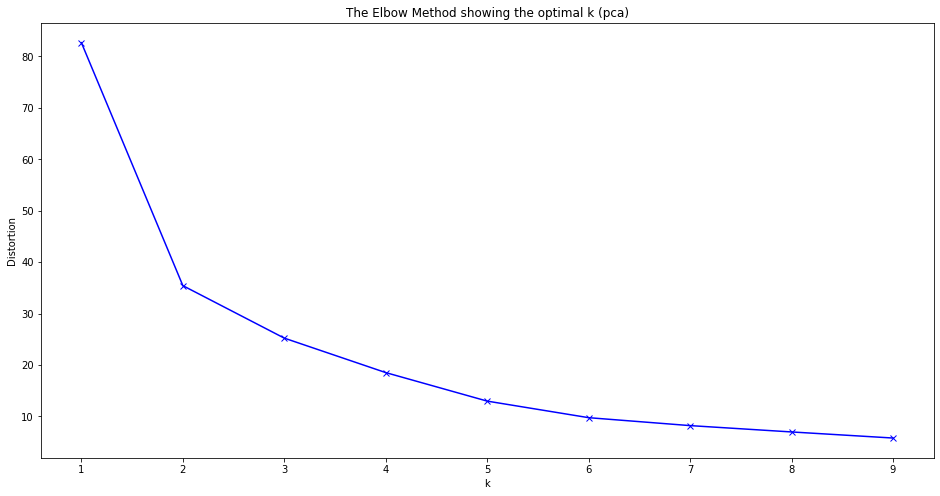

In [ ]:
# KMeans Model Cluster 
distortions = []
K = range(1,10)
for k in K:
    kmeanModel = KMeans(n_clusters=k, random_state = 42)
    kmeanModel.fit(df_pca[["PC1", "PC2"]])
    distortions.append(kmeanModel.inertia_)
    
#Plotting the distortions of K-Means
plt.figure(figsize=(16,8))
plt.plot(K, distortions, 'bx-')
plt.xlabel('k')
plt.ylabel('Distortion')
plt.title('The Elbow Method showing the optimal k (pca)')
plt.show()

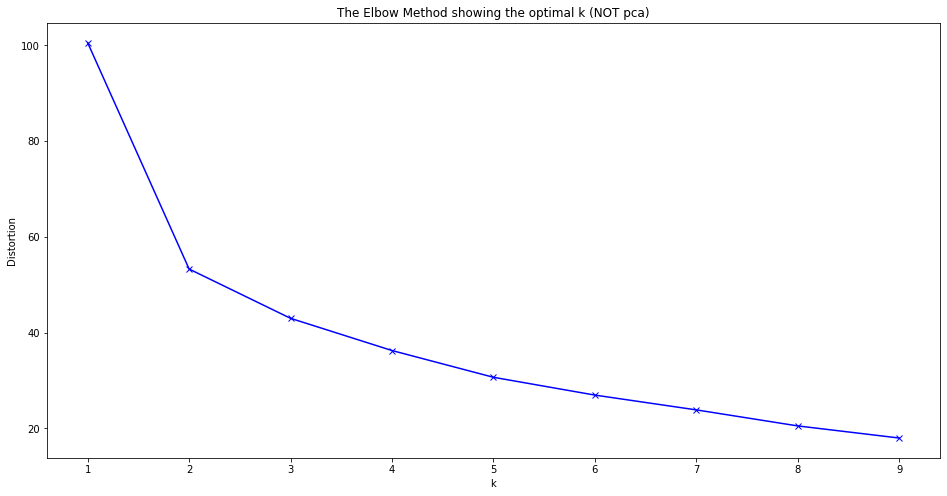

In [ ]:
# KMeans Model Cluster 
distortions = []
K = range(1,10)
for k in K:
    kmeanModel = KMeans(n_clusters=k, random_state = 42)
    kmeanModel.fit(df_num_norm)
    distortions.append(kmeanModel.inertia_)
    
#Plotting the distortions of K-Means
plt.figure(figsize=(16,8))
plt.plot(K, distortions, 'bx-')
plt.xlabel('k')
plt.ylabel('Distortion')
plt.title('The Elbow Method showing the optimal k (NOT pca)')
plt.show()

### Cluster = 2

In [ ]:
model1 = KMeans(n_clusters=2, random_state = 42)
model1.fit(df_pca[["PC1", "PC2"]])

#See the predictions
model1.labels_
model1.cluster_centers_

df_pca["KMeans"] = model1.labels_
df_num["KMeans"] = model1.labels_

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [ ]:
model2 = KMeans(n_clusters=2, random_state = 42)
model2.fit(df_num_norm)

#See the predictions
model2.labels_
model2.cluster_centers_

df_pca["KMeans_noPCA"] = model2.labels_
df_num["KMeans_noPCA"] = model2.labels_

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



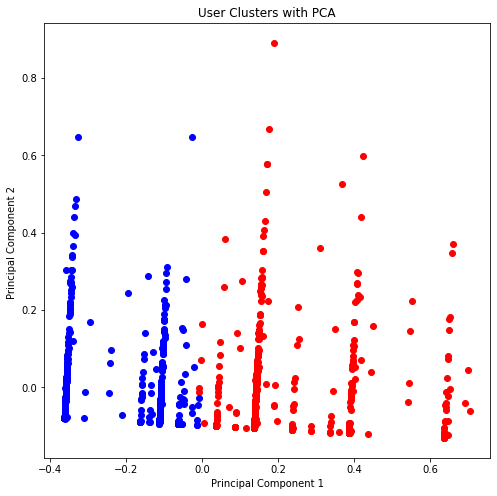

In [ ]:
plt.figure(figsize=(8, 8))
#Plotting the results
plt.scatter(df_pca[df_pca["KMeans"] == 0]["PC1"], df_pca[df_pca["KMeans"] == 0]["PC2"] ,color = 'red')
plt.scatter(df_pca[df_pca["KMeans"] == 1]["PC1"], df_pca[df_pca["KMeans"] == 1]["PC2"] , color = 'blue')
#plt.scatter(s[s.ses_cluster == 3]["sessions"], s[s.ses_cluster == 3]["trx_is_voucher"] , color = 'green')
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2 ")
plt.title("User Clusters with PCA")
plt.show()

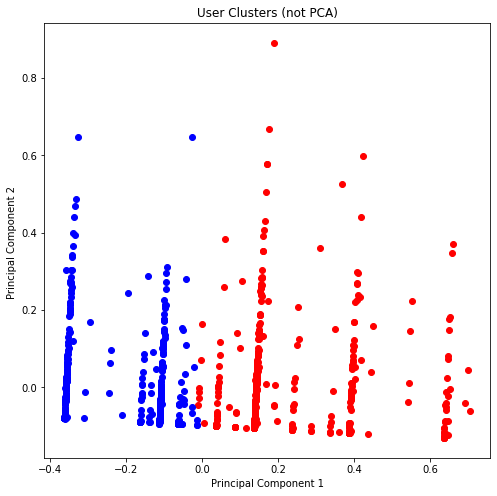

In [ ]:
plt.figure(figsize=(8, 8))
#Plotting the results
plt.scatter(df_pca[df_pca["KMeans_noPCA"] == 0]["PC1"], df_pca[df_pca["KMeans_noPCA"] == 0]["PC2"] ,color = 'red')
plt.scatter(df_pca[df_pca["KMeans_noPCA"] == 1]["PC1"], df_pca[df_pca["KMeans_noPCA"] == 1]["PC2"] , color = 'blue')
#plt.scatter(s[s.ses_cluster == 3]["sessions"], s[s.ses_cluster == 3]["trx_is_voucher"] , color = 'green')
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2 ")
plt.title("User Clusters (not PCA)")
plt.show()

### Cluster = 3

In [ ]:
model1 = KMeans(n_clusters=3, random_state = 42)
model1.fit(df_pca[["PC1", "PC2"]])

#See the predictions
model1.labels_
model1.cluster_centers_

df_pca["KMeans"] = model1.labels_
df_num["KMeans"] = model1.labels_

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [ ]:
model2 = KMeans(n_clusters=3, random_state = 42)
model2.fit(df_num_norm)

#See the predictions
model2.labels_
model2.cluster_centers_

df_pca["KMeans_noPCA"] = model2.labels_
df_num["KMeans_noPCA"] = model2.labels_

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



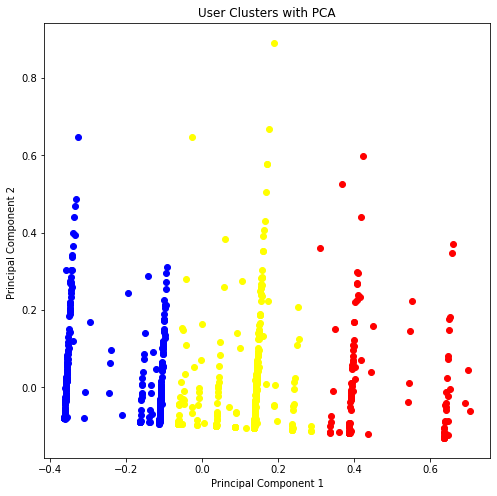

In [ ]:
plt.figure(figsize=(8, 8))
#Plotting the results
plt.scatter(df_pca[df_pca["KMeans"] == 0]["PC1"], df_pca[df_pca["KMeans"] == 0]["PC2"] ,color = 'red')
plt.scatter(df_pca[df_pca["KMeans"] == 1]["PC1"], df_pca[df_pca["KMeans"] == 1]["PC2"] , color = 'blue')
plt.scatter(df_pca[df_pca["KMeans"] == 2]["PC1"], df_pca[df_pca["KMeans"] == 2]["PC2"] ,color = 'yellow')
#plt.scatter(s[s.ses_cluster == 3]["sessions"], s[s.ses_cluster == 3]["trx_is_voucher"] , color = 'green')
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2 ")
plt.title("User Clusters with PCA")
plt.show()

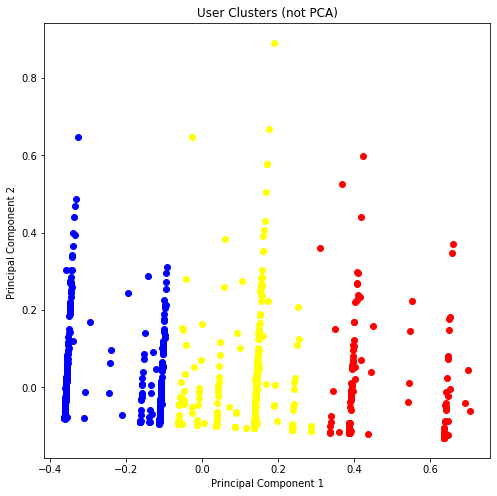

In [ ]:
plt.figure(figsize=(8, 8))
#Plotting the results
plt.scatter(df_pca[df_pca["KMeans_noPCA"] == 0]["PC1"], df_pca[df_pca["KMeans_noPCA"] == 0]["PC2"] ,color = 'red')
plt.scatter(df_pca[df_pca["KMeans_noPCA"] == 1]["PC1"], df_pca[df_pca["KMeans_noPCA"] == 1]["PC2"] , color = 'blue')
plt.scatter(df_pca[df_pca["KMeans_noPCA"] == 2]["PC1"], df_pca[df_pca["KMeans_noPCA"] == 2]["PC2"] ,color = 'yellow')
#plt.scatter(s[s.ses_cluster == 3]["sessions"], s[s.ses_cluster == 3]["trx_is_voucher"] , color = 'green')
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2 ")
plt.title("User Clusters (not PCA)")
plt.show()

### Cluster = 4

In [ ]:
model1 = KMeans(n_clusters=4, random_state = 42)
model1.fit(df_pca[["PC1", "PC2"]])

#See the predictions
model1.labels_
model1.cluster_centers_

df_pca["KMeans"] = model1.labels_
df_num["KMeans"] = model1.labels_

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [ ]:
model2 = KMeans(n_clusters=4, random_state = 42)
model2.fit(df_num_norm)

#See the predictions
model2.labels_
model2.cluster_centers_

df_pca["KMeans_noPCA"] = model2.labels_
df_num["KMeans_noPCA"] = model2.labels_

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



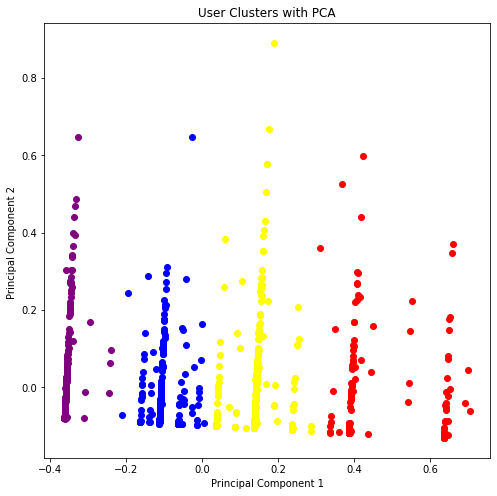

In [ ]:
plt.figure(figsize=(8, 8))
#Plotting the results
plt.scatter(df_pca[df_pca["KMeans"] == 0]["PC1"], df_pca[df_pca["KMeans"] == 0]["PC2"] ,color = 'red')
plt.scatter(df_pca[df_pca["KMeans"] == 1]["PC1"], df_pca[df_pca["KMeans"] == 1]["PC2"] , color = 'blue')
plt.scatter(df_pca[df_pca["KMeans"] == 2]["PC1"], df_pca[df_pca["KMeans"] == 2]["PC2"] ,color = 'yellow')
plt.scatter(df_pca[df_pca["KMeans"] == 3]["PC1"], df_pca[df_pca["KMeans"] == 3]["PC2"] , color = 'purple')

plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2 ")
plt.title("User Clusters with PCA")
plt.show()

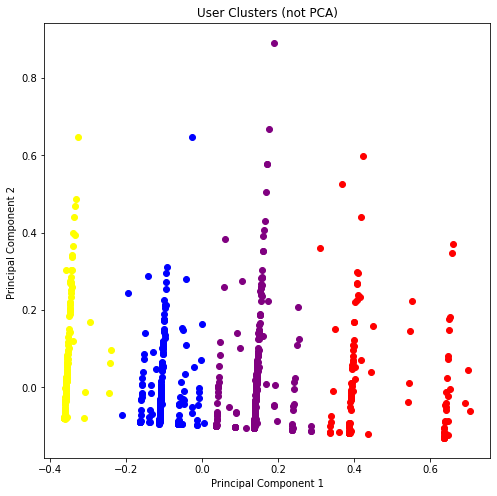

In [ ]:
plt.figure(figsize=(8, 8))
#Plotting the results
plt.scatter(df_pca[df_pca["KMeans_noPCA"] == 0]["PC1"], df_pca[df_pca["KMeans_noPCA"] == 0]["PC2"] ,color = 'red')
plt.scatter(df_pca[df_pca["KMeans_noPCA"] == 1]["PC1"], df_pca[df_pca["KMeans_noPCA"] == 1]["PC2"] , color = 'blue')
plt.scatter(df_pca[df_pca["KMeans_noPCA"] == 2]["PC1"], df_pca[df_pca["KMeans_noPCA"] == 2]["PC2"] ,color = 'yellow')
plt.scatter(df_pca[df_pca["KMeans_noPCA"] == 3]["PC1"], df_pca[df_pca["KMeans_noPCA"] == 3]["PC2"] , color = 'purple')
#plt.scatter(s[s.ses_cluster == 3]["sessions"], s[s.ses_cluster == 3]["trx_is_voucher"] , color = 'green')
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2 ")
plt.title("User Clusters (not PCA)")
plt.show()

### Cluster = 5

In [ ]:
model1 = KMeans(n_clusters=5, random_state = 42)
model1.fit(df_pca[["PC1", "PC2"]])

#See the predictions
model1.labels_
model1.cluster_centers_

df_pca["KMeans"] = model1.labels_
df_num["KMeans"] = model1.labels_

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [ ]:
model2 = KMeans(n_clusters=5, random_state = 42)
model2.fit(df_num_norm)

#See the predictions
model2.labels_
model2.cluster_centers_

df_pca["KMeans_noPCA"] = model2.labels_
df_num["KMeans_noPCA"] = model2.labels_

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



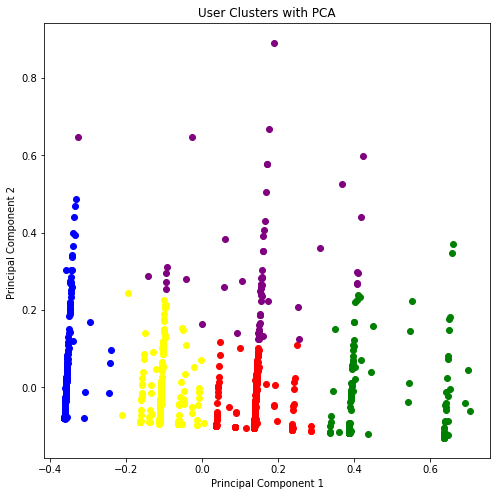

In [ ]:
plt.figure(figsize=(8, 8))
#Plotting the results
plt.scatter(df_pca[df_pca["KMeans"] == 0]["PC1"], df_pca[df_pca["KMeans"] == 0]["PC2"] ,color = 'red')
plt.scatter(df_pca[df_pca["KMeans"] == 1]["PC1"], df_pca[df_pca["KMeans"] == 1]["PC2"] , color = 'blue')
plt.scatter(df_pca[df_pca["KMeans"] == 2]["PC1"], df_pca[df_pca["KMeans"] == 2]["PC2"] ,color = 'yellow')
plt.scatter(df_pca[df_pca["KMeans"] == 3]["PC1"], df_pca[df_pca["KMeans"] == 3]["PC2"] , color = 'purple')
plt.scatter(df_pca[df_pca["KMeans"] == 4]["PC1"], df_pca[df_pca["KMeans"] == 4]["PC2"] , color = 'green')

plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2 ")
plt.title("User Clusters with PCA")
plt.show()

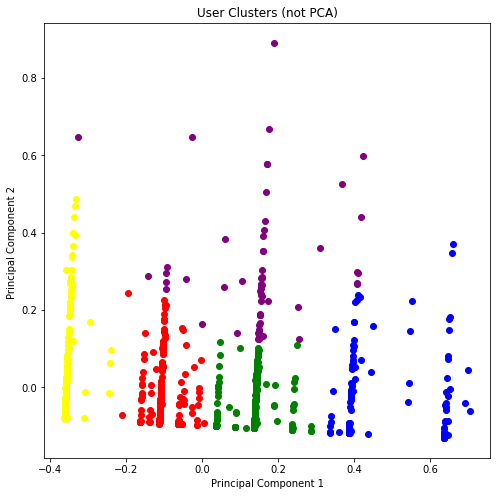

In [ ]:
plt.figure(figsize=(8, 8))
#Plotting the results
plt.scatter(df_pca[df_pca["KMeans_noPCA"] == 0]["PC1"], df_pca[df_pca["KMeans_noPCA"] == 0]["PC2"] ,color = 'red')
plt.scatter(df_pca[df_pca["KMeans_noPCA"] == 1]["PC1"], df_pca[df_pca["KMeans_noPCA"] == 1]["PC2"] , color = 'blue')
plt.scatter(df_pca[df_pca["KMeans_noPCA"] == 2]["PC1"], df_pca[df_pca["KMeans_noPCA"] == 2]["PC2"] ,color = 'yellow')
plt.scatter(df_pca[df_pca["KMeans_noPCA"] == 3]["PC1"], df_pca[df_pca["KMeans_noPCA"] == 3]["PC2"] , color = 'purple')
plt.scatter(df_pca[df_pca["KMeans_noPCA"] == 4]["PC1"], df_pca[df_pca["KMeans_noPCA"] == 4]["PC2"] , color = 'green')

plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2 ")
plt.title("User Clusters (not PCA)")
plt.show()

## Spectral

### Cluster = 2

In [ ]:
clustering = SpectralClustering(n_clusters=2, assign_labels='discretize', random_state=42).fit(df_pca[["PC1","PC2"]])

df_pca["Spectral"] = clustering.labels_
df_num["Spectral"] = clustering.labels_

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [ ]:
clustering = SpectralClustering(n_clusters=2, assign_labels='discretize', random_state=42).fit(df_num_norm)

df_pca["Spectral_noPCA"] = clustering.labels_
df_num["Spectral_noPCA"] = clustering.labels_

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



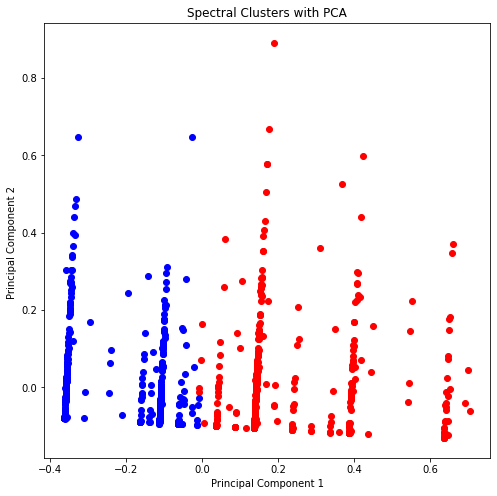

In [ ]:
plt.figure(figsize=(8, 8))
#Plotting the results
plt.scatter(df_pca[df_pca["Spectral"] == 0]["PC1"], df_pca[df_pca["Spectral"] == 0]["PC2"] ,color = 'red')
plt.scatter(df_pca[df_pca["Spectral"] == 1]["PC1"], df_pca[df_pca["Spectral"] == 1]["PC2"] , color = 'blue')
plt.scatter(df_pca[df_pca["Spectral"] == 2]["PC1"], df_pca[df_pca["Spectral"] == 2]["PC2"] , color = 'yellow')
plt.scatter(df_pca[df_pca["Spectral"] == 3]["PC1"], df_pca[df_pca["Spectral"] == 3]["PC2"] , color = 'purple')
plt.scatter(df_pca[df_pca["Spectral"] == 4]["PC1"], df_pca[df_pca["Spectral"] == 4]["PC2"] , color = 'green')
#plt.scatter(s[s.ses_cluster == 3]["sessions"], s[s.ses_cluster == 3]["trx_is_voucher"] , color = 'green')
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2 ")
plt.title("Spectral Clusters with PCA")
plt.show()

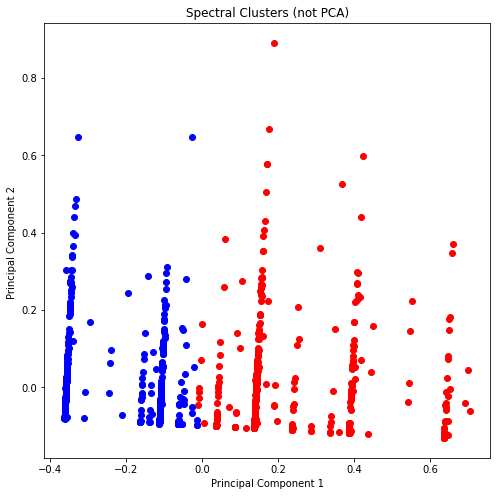

In [ ]:
plt.figure(figsize=(8, 8))
#Plotting the results
plt.scatter(df_pca[df_pca["Spectral_noPCA"] == 0]["PC1"], df_pca[df_pca["Spectral_noPCA"] == 0]["PC2"] ,color = 'red')
plt.scatter(df_pca[df_pca["Spectral_noPCA"] == 1]["PC1"], df_pca[df_pca["Spectral_noPCA"] == 1]["PC2"] , color = 'blue')
plt.scatter(df_pca[df_pca["Spectral_noPCA"] == 2]["PC1"], df_pca[df_pca["Spectral_noPCA"] == 2]["PC2"] , color = 'yellow')
plt.scatter(df_pca[df_pca["Spectral_noPCA"] == 3]["PC1"], df_pca[df_pca["Spectral_noPCA"] == 3]["PC2"] , color = 'purple')
plt.scatter(df_pca[df_pca["Spectral_noPCA"] == 4]["PC1"], df_pca[df_pca["Spectral_noPCA"] == 4]["PC2"] , color = 'green')
#plt.scatter(s[s.ses_cluster == 3]["sessions"], s[s.ses_cluster == 3]["trx_is_voucher"] , color = 'green')
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2 ")
plt.title("Spectral Clusters (not PCA)")
plt.show()

### Cluster = 3

In [ ]:
clustering = SpectralClustering(n_clusters=3, assign_labels='discretize', random_state=42).fit(df_pca[["PC1","PC2"]])

df_pca["Spectral"] = clustering.labels_
df_num["Spectral"] = clustering.labels_

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [ ]:
clustering = SpectralClustering(n_clusters=3, assign_labels='discretize', random_state=42).fit(df_num_norm)

df_pca["Spectral_noPCA"] = clustering.labels_
df_num["Spectral_noPCA"] = clustering.labels_

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



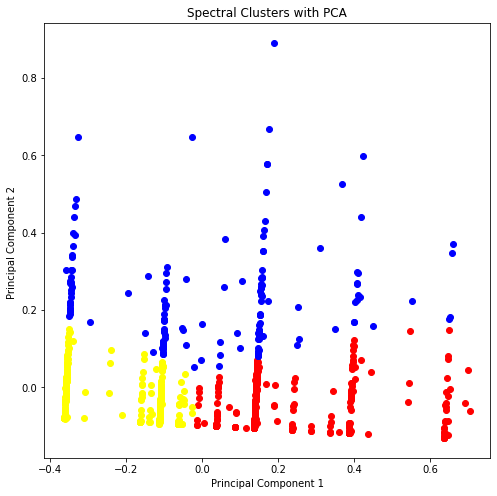

In [ ]:
plt.figure(figsize=(8, 8))
#Plotting the results
plt.scatter(df_pca[df_pca["Spectral"] == 0]["PC1"], df_pca[df_pca["Spectral"] == 0]["PC2"] ,color = 'red')
plt.scatter(df_pca[df_pca["Spectral"] == 1]["PC1"], df_pca[df_pca["Spectral"] == 1]["PC2"] , color = 'blue')
plt.scatter(df_pca[df_pca["Spectral"] == 2]["PC1"], df_pca[df_pca["Spectral"] == 2]["PC2"] , color = 'yellow')
plt.scatter(df_pca[df_pca["Spectral"] == 3]["PC1"], df_pca[df_pca["Spectral"] == 3]["PC2"] , color = 'purple')
plt.scatter(df_pca[df_pca["Spectral"] == 4]["PC1"], df_pca[df_pca["Spectral"] == 4]["PC2"] , color = 'green')
#plt.scatter(s[s.ses_cluster == 3]["sessions"], s[s.ses_cluster == 3]["trx_is_voucher"] , color = 'green')
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2 ")
plt.title("Spectral Clusters with PCA")
plt.show()

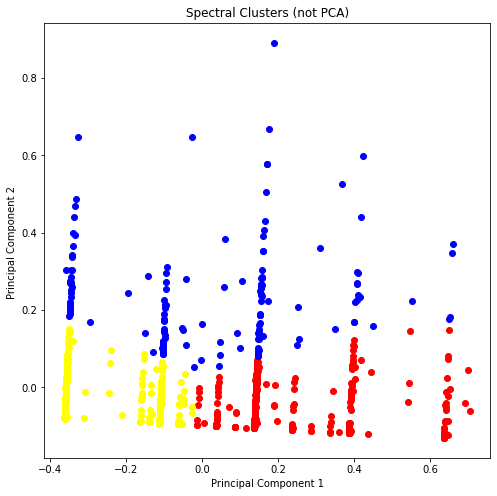

In [ ]:
plt.figure(figsize=(8, 8))
#Plotting the results
plt.scatter(df_pca[df_pca["Spectral_noPCA"] == 0]["PC1"], df_pca[df_pca["Spectral_noPCA"] == 0]["PC2"] ,color = 'red')
plt.scatter(df_pca[df_pca["Spectral_noPCA"] == 1]["PC1"], df_pca[df_pca["Spectral_noPCA"] == 1]["PC2"] , color = 'blue')
plt.scatter(df_pca[df_pca["Spectral_noPCA"] == 2]["PC1"], df_pca[df_pca["Spectral_noPCA"] == 2]["PC2"] , color = 'yellow')
plt.scatter(df_pca[df_pca["Spectral_noPCA"] == 3]["PC1"], df_pca[df_pca["Spectral_noPCA"] == 3]["PC2"] , color = 'purple')
plt.scatter(df_pca[df_pca["Spectral_noPCA"] == 4]["PC1"], df_pca[df_pca["Spectral_noPCA"] == 4]["PC2"] , color = 'green')
#plt.scatter(s[s.ses_cluster == 3]["sessions"], s[s.ses_cluster == 3]["trx_is_voucher"] , color = 'green')
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2 ")
plt.title("Spectral Clusters (not PCA)")
plt.show()

### Cluster = 4

In [ ]:
clustering = SpectralClustering(n_clusters=4, assign_labels='discretize', random_state=42).fit(df_pca[["PC1","PC2"]])

df_pca["Spectral"] = clustering.labels_
df_num["Spectral"] = clustering.labels_

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [ ]:
clustering = SpectralClustering(n_clusters=4, assign_labels='discretize', random_state=42).fit(df_num_norm)

df_pca["Spectral_noPCA"] = clustering.labels_
df_num["Spectral_noPCA"] = clustering.labels_

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



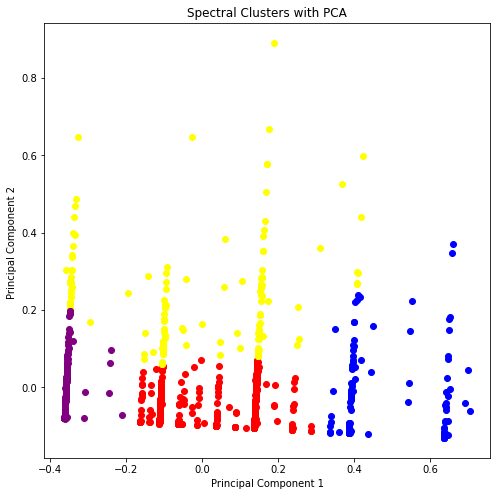

In [ ]:
plt.figure(figsize=(8, 8))
#Plotting the results
plt.scatter(df_pca[df_pca["Spectral"] == 0]["PC1"], df_pca[df_pca["Spectral"] == 0]["PC2"] ,color = 'red')
plt.scatter(df_pca[df_pca["Spectral"] == 1]["PC1"], df_pca[df_pca["Spectral"] == 1]["PC2"] , color = 'blue')
plt.scatter(df_pca[df_pca["Spectral"] == 2]["PC1"], df_pca[df_pca["Spectral"] == 2]["PC2"] , color = 'yellow')
plt.scatter(df_pca[df_pca["Spectral"] == 3]["PC1"], df_pca[df_pca["Spectral"] == 3]["PC2"] , color = 'purple')
plt.scatter(df_pca[df_pca["Spectral"] == 4]["PC1"], df_pca[df_pca["Spectral"] == 4]["PC2"] , color = 'green')
#plt.scatter(s[s.ses_cluster == 3]["sessions"], s[s.ses_cluster == 3]["trx_is_voucher"] , color = 'green')
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2 ")
plt.title("Spectral Clusters with PCA")
plt.show()

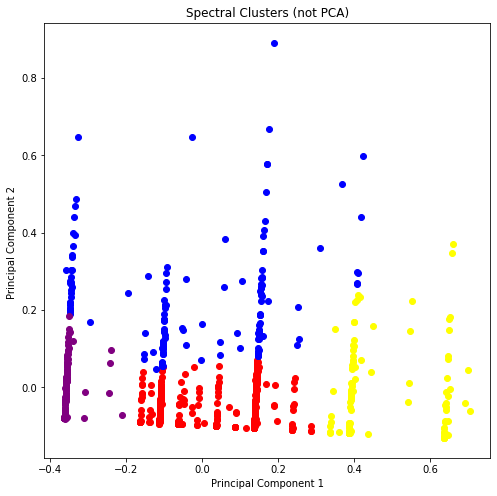

In [ ]:
plt.figure(figsize=(8, 8))
#Plotting the results
plt.scatter(df_pca[df_pca["Spectral_noPCA"] == 0]["PC1"], df_pca[df_pca["Spectral_noPCA"] == 0]["PC2"] ,color = 'red')
plt.scatter(df_pca[df_pca["Spectral_noPCA"] == 1]["PC1"], df_pca[df_pca["Spectral_noPCA"] == 1]["PC2"] , color = 'blue')
plt.scatter(df_pca[df_pca["Spectral_noPCA"] == 2]["PC1"], df_pca[df_pca["Spectral_noPCA"] == 2]["PC2"] , color = 'yellow')
plt.scatter(df_pca[df_pca["Spectral_noPCA"] == 3]["PC1"], df_pca[df_pca["Spectral_noPCA"] == 3]["PC2"] , color = 'purple')
plt.scatter(df_pca[df_pca["Spectral_noPCA"] == 4]["PC1"], df_pca[df_pca["Spectral_noPCA"] == 4]["PC2"] , color = 'green')
#plt.scatter(s[s.ses_cluster == 3]["sessions"], s[s.ses_cluster == 3]["trx_is_voucher"] , color = 'green')
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2 ")
plt.title("Spectral Clusters (not PCA)")
plt.show()

### Cluster = 5

In [ ]:
clustering = SpectralClustering(n_clusters=5, assign_labels='discretize', random_state=42).fit(df_pca[["PC1","PC2"]])

df_pca["Spectral"] = clustering.labels_
df_num["Spectral"] = clustering.labels_

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [ ]:
clustering = SpectralClustering(n_clusters=5, assign_labels='discretize', random_state=42).fit(df_num_norm)

df_pca["Spectral_noPCA"] = clustering.labels_
df_num["Spectral_noPCA"] = clustering.labels_

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



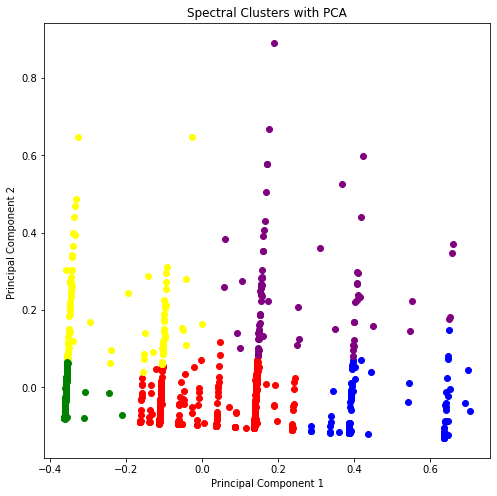

In [ ]:
plt.figure(figsize=(8, 8))
#Plotting the results
plt.scatter(df_pca[df_pca["Spectral"] == 0]["PC1"], df_pca[df_pca["Spectral"] == 0]["PC2"] ,color = 'red')
plt.scatter(df_pca[df_pca["Spectral"] == 1]["PC1"], df_pca[df_pca["Spectral"] == 1]["PC2"] , color = 'blue')
plt.scatter(df_pca[df_pca["Spectral"] == 2]["PC1"], df_pca[df_pca["Spectral"] == 2]["PC2"] , color = 'yellow')
plt.scatter(df_pca[df_pca["Spectral"] == 3]["PC1"], df_pca[df_pca["Spectral"] == 3]["PC2"] , color = 'purple')
plt.scatter(df_pca[df_pca["Spectral"] == 4]["PC1"], df_pca[df_pca["Spectral"] == 4]["PC2"] , color = 'green')
#plt.scatter(s[s.ses_cluster == 3]["sessions"], s[s.ses_cluster == 3]["trx_is_voucher"] , color = 'green')
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2 ")
plt.title("Spectral Clusters with PCA")
plt.show()

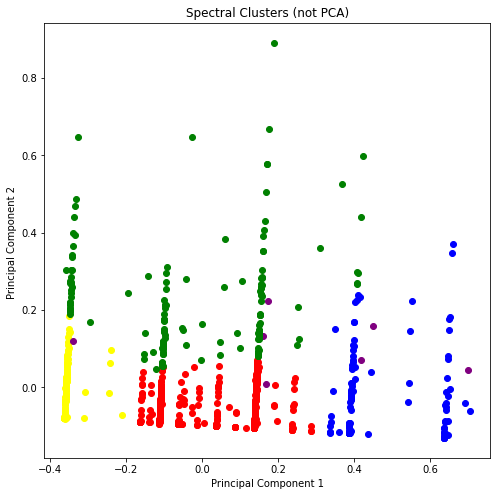

In [ ]:
plt.figure(figsize=(8, 8))
#Plotting the results
plt.scatter(df_pca[df_pca["Spectral_noPCA"] == 0]["PC1"], df_pca[df_pca["Spectral_noPCA"] == 0]["PC2"] ,color = 'red')
plt.scatter(df_pca[df_pca["Spectral_noPCA"] == 1]["PC1"], df_pca[df_pca["Spectral_noPCA"] == 1]["PC2"] , color = 'blue')
plt.scatter(df_pca[df_pca["Spectral_noPCA"] == 2]["PC1"], df_pca[df_pca["Spectral_noPCA"] == 2]["PC2"] , color = 'yellow')
plt.scatter(df_pca[df_pca["Spectral_noPCA"] == 3]["PC1"], df_pca[df_pca["Spectral_noPCA"] == 3]["PC2"] , color = 'purple')
plt.scatter(df_pca[df_pca["Spectral_noPCA"] == 4]["PC1"], df_pca[df_pca["Spectral_noPCA"] == 4]["PC2"] , color = 'green')
#plt.scatter(s[s.ses_cluster == 3]["sessions"], s[s.ses_cluster == 3]["trx_is_voucher"] , color = 'green')
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2 ")
plt.title("Spectral Clusters (not PCA)")
plt.show()

## Gaussian Mixture

### Clusters = 2

In [ ]:
gm1 = GaussianMixture(n_components=2, random_state=42).fit(df_pca[["PC1","PC2"]])

df_pca["Gaussian"] = gm1.predict(df_pca[["PC1","PC2"]])
df_num["Gaussian"] = gm1.predict(df_pca[["PC1","PC2"]])

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [ ]:
gm2 = GaussianMixture(n_components=2, random_state=42).fit(df_num_norm)

df_pca["Gaussian_noPCA"] = gm2.predict(df_num_norm)
df_num["Gaussian_noPCA"] = gm2.predict(df_num_norm)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



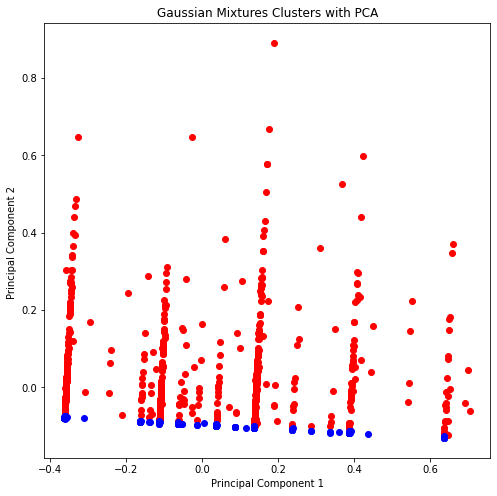

In [ ]:
plt.figure(figsize=(8, 8))
#Plotting the results
plt.scatter(df_pca[df_pca["Gaussian"] == 0]["PC1"], df_pca[df_pca["Gaussian"] == 0]["PC2"] ,color = 'red')
plt.scatter(df_pca[df_pca["Gaussian"] == 1]["PC1"], df_pca[df_pca["Gaussian"] == 1]["PC2"] , color = 'blue')
plt.scatter(df_pca[df_pca["Gaussian"] == 2]["PC1"], df_pca[df_pca["Gaussian"] == 2]["PC2"] , color = 'yellow')
plt.scatter(df_pca[df_pca["Gaussian"] == 3]["PC1"], df_pca[df_pca["Gaussian"] == 3]["PC2"] , color = 'purple')
plt.scatter(df_pca[df_pca["Gaussian"] == 4]["PC1"], df_pca[df_pca["Gaussian"] == 4]["PC2"] , color = 'green')
#plt.scatter(s[s.ses_cluster == 3]["sessions"], s[s.ses_cluster == 3]["trx_is_voucher"] , color = 'green')
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2 ")
plt.title("Gaussian Mixtures Clusters with PCA")
plt.show()

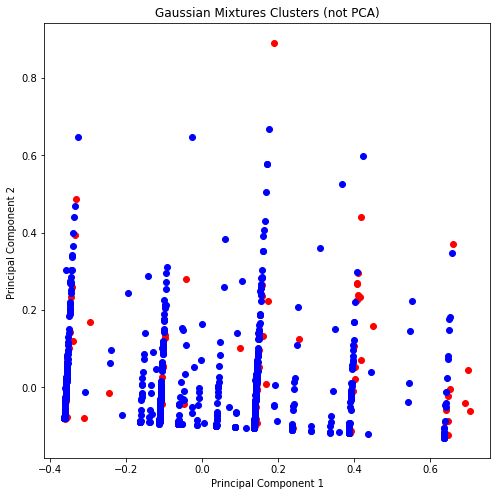

In [ ]:
plt.figure(figsize=(8, 8))
#Plotting the results
plt.scatter(df_pca[df_pca["Gaussian_noPCA"] == 0]["PC1"], df_pca[df_pca["Gaussian_noPCA"] == 0]["PC2"] ,color = 'red')
plt.scatter(df_pca[df_pca["Gaussian_noPCA"] == 1]["PC1"], df_pca[df_pca["Gaussian_noPCA"] == 1]["PC2"] , color = 'blue')
plt.scatter(df_pca[df_pca["Gaussian_noPCA"] == 2]["PC1"], df_pca[df_pca["Gaussian_noPCA"] == 2]["PC2"] , color = 'yellow')
plt.scatter(df_pca[df_pca["Gaussian_noPCA"] == 3]["PC1"], df_pca[df_pca["Gaussian_noPCA"] == 3]["PC2"] , color = 'purple')
plt.scatter(df_pca[df_pca["Gaussian_noPCA"] == 4]["PC1"], df_pca[df_pca["Gaussian_noPCA"] == 4]["PC2"] , color = 'green')
#plt.scatter(s[s.ses_cluster == 3]["sessions"], s[s.ses_cluster == 3]["trx_is_voucher"] , color = 'green')
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2 ")
plt.title("Gaussian Mixtures Clusters (not PCA)")
plt.show()

### Clusters = 3

In [ ]:
gm1 = GaussianMixture(n_components=3, random_state=42).fit(df_pca[["PC1","PC2"]])

df_pca["Gaussian"] = gm1.predict(df_pca[["PC1","PC2"]])
df_num["Gaussian"] = gm1.predict(df_pca[["PC1","PC2"]])

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [ ]:
gm2 = GaussianMixture(n_components=3, random_state=42).fit(df_num_norm)

df_pca["Gaussian_noPCA"] = gm2.predict(df_num_norm)
df_num["Gaussian_noPCA"] = gm2.predict(df_num_norm)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



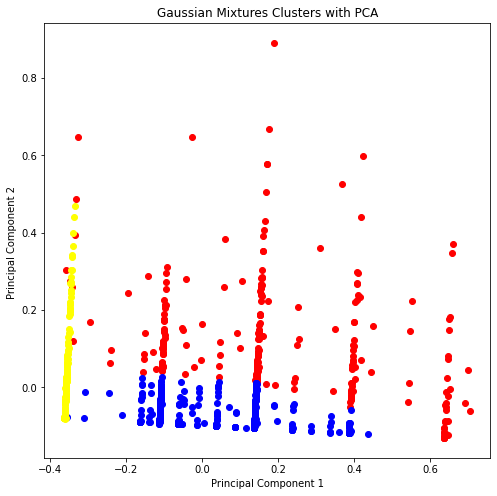

In [ ]:
plt.figure(figsize=(8, 8))
#Plotting the results
plt.scatter(df_pca[df_pca["Gaussian"] == 0]["PC1"], df_pca[df_pca["Gaussian"] == 0]["PC2"] ,color = 'red')
plt.scatter(df_pca[df_pca["Gaussian"] == 1]["PC1"], df_pca[df_pca["Gaussian"] == 1]["PC2"] , color = 'blue')
plt.scatter(df_pca[df_pca["Gaussian"] == 2]["PC1"], df_pca[df_pca["Gaussian"] == 2]["PC2"] , color = 'yellow')
plt.scatter(df_pca[df_pca["Gaussian"] == 3]["PC1"], df_pca[df_pca["Gaussian"] == 3]["PC2"] , color = 'purple')
plt.scatter(df_pca[df_pca["Gaussian"] == 4]["PC1"], df_pca[df_pca["Gaussian"] == 4]["PC2"] , color = 'green')
#plt.scatter(s[s.ses_cluster == 3]["sessions"], s[s.ses_cluster == 3]["trx_is_voucher"] , color = 'green')
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2 ")
plt.title("Gaussian Mixtures Clusters with PCA")
plt.show()

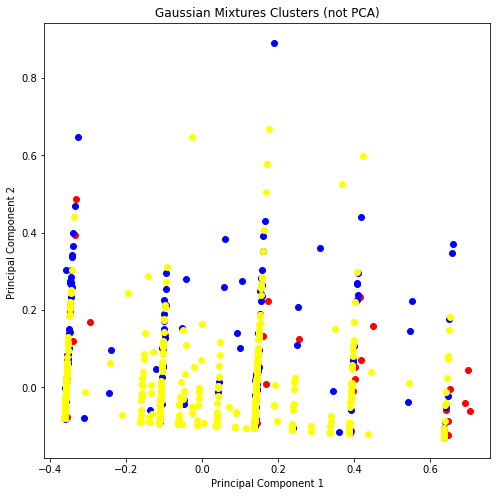

In [ ]:
plt.figure(figsize=(8, 8))
#Plotting the results
plt.scatter(df_pca[df_pca["Gaussian_noPCA"] == 0]["PC1"], df_pca[df_pca["Gaussian_noPCA"] == 0]["PC2"] ,color = 'red')
plt.scatter(df_pca[df_pca["Gaussian_noPCA"] == 1]["PC1"], df_pca[df_pca["Gaussian_noPCA"] == 1]["PC2"] , color = 'blue')
plt.scatter(df_pca[df_pca["Gaussian_noPCA"] == 2]["PC1"], df_pca[df_pca["Gaussian_noPCA"] == 2]["PC2"] , color = 'yellow')
plt.scatter(df_pca[df_pca["Gaussian_noPCA"] == 3]["PC1"], df_pca[df_pca["Gaussian_noPCA"] == 3]["PC2"] , color = 'purple')
plt.scatter(df_pca[df_pca["Gaussian_noPCA"] == 4]["PC1"], df_pca[df_pca["Gaussian_noPCA"] == 4]["PC2"] , color = 'green')
#plt.scatter(s[s.ses_cluster == 3]["sessions"], s[s.ses_cluster == 3]["trx_is_voucher"] , color = 'green')
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2 ")
plt.title("Gaussian Mixtures Clusters (not PCA)")
plt.show()

### Clusters = 4

In [ ]:
gm1 = GaussianMixture(n_components=4, random_state=42).fit(df_pca[["PC1","PC2"]])

df_pca["Gaussian"] = gm1.predict(df_pca[["PC1","PC2"]])
df_num["Gaussian"] = gm1.predict(df_pca[["PC1","PC2"]])

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [ ]:
gm2 = GaussianMixture(n_components=4, random_state=42).fit(df_num_norm)

df_pca["Gaussian_noPCA"] = gm2.predict(df_num_norm)
df_num["Gaussian_noPCA"] = gm2.predict(df_num_norm)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



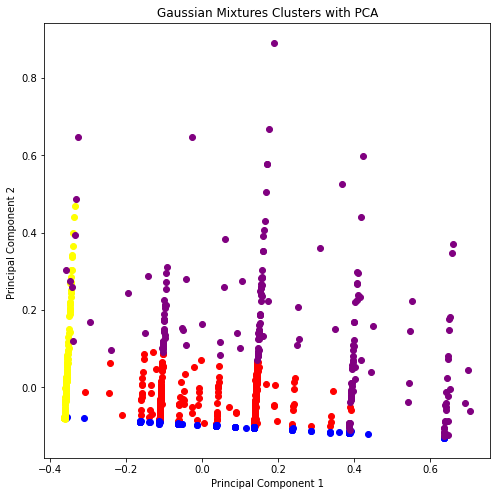

In [ ]:
plt.figure(figsize=(8, 8))
#Plotting the results
plt.scatter(df_pca[df_pca["Gaussian"] == 0]["PC1"], df_pca[df_pca["Gaussian"] == 0]["PC2"] ,color = 'red')
plt.scatter(df_pca[df_pca["Gaussian"] == 1]["PC1"], df_pca[df_pca["Gaussian"] == 1]["PC2"] , color = 'blue')
plt.scatter(df_pca[df_pca["Gaussian"] == 2]["PC1"], df_pca[df_pca["Gaussian"] == 2]["PC2"] , color = 'yellow')
plt.scatter(df_pca[df_pca["Gaussian"] == 3]["PC1"], df_pca[df_pca["Gaussian"] == 3]["PC2"] , color = 'purple')
plt.scatter(df_pca[df_pca["Gaussian"] == 4]["PC1"], df_pca[df_pca["Gaussian"] == 4]["PC2"] , color = 'green')
#plt.scatter(s[s.ses_cluster == 3]["sessions"], s[s.ses_cluster == 3]["trx_is_voucher"] , color = 'green')
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2 ")
plt.title("Gaussian Mixtures Clusters with PCA")
plt.show()

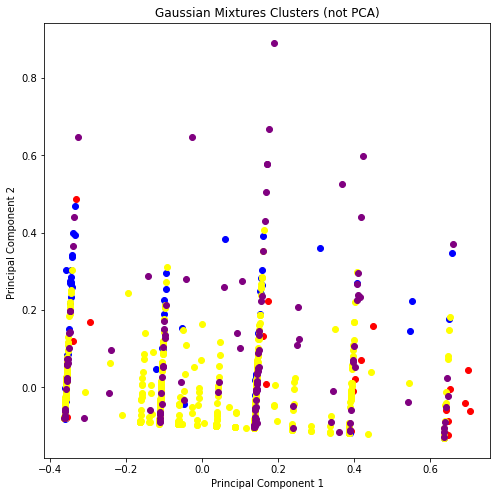

In [ ]:
plt.figure(figsize=(8, 8))
#Plotting the results
plt.scatter(df_pca[df_pca["Gaussian_noPCA"] == 0]["PC1"], df_pca[df_pca["Gaussian_noPCA"] == 0]["PC2"] ,color = 'red')
plt.scatter(df_pca[df_pca["Gaussian_noPCA"] == 1]["PC1"], df_pca[df_pca["Gaussian_noPCA"] == 1]["PC2"] , color = 'blue')
plt.scatter(df_pca[df_pca["Gaussian_noPCA"] == 2]["PC1"], df_pca[df_pca["Gaussian_noPCA"] == 2]["PC2"] , color = 'yellow')
plt.scatter(df_pca[df_pca["Gaussian_noPCA"] == 3]["PC1"], df_pca[df_pca["Gaussian_noPCA"] == 3]["PC2"] , color = 'purple')
plt.scatter(df_pca[df_pca["Gaussian_noPCA"] == 4]["PC1"], df_pca[df_pca["Gaussian_noPCA"] == 4]["PC2"] , color = 'green')
#plt.scatter(s[s.ses_cluster == 3]["sessions"], s[s.ses_cluster == 3]["trx_is_voucher"] , color = 'green')
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2 ")
plt.title("Gaussian Mixtures Clusters (not PCA)")
plt.show()

### Clusters = 5

In [ ]:
gm1 = GaussianMixture(n_components=5, random_state=42).fit(df_pca[["PC1","PC2"]])

df_pca["Gaussian"] = gm1.predict(df_pca[["PC1","PC2"]])
df_num["Gaussian"] = gm1.predict(df_pca[["PC1","PC2"]])

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [ ]:
gm2 = GaussianMixture(n_components=5, random_state=42).fit(df_num_norm)

df_pca["Gaussian_noPCA"] = gm2.predict(df_num_norm)
df_num["Gaussian_noPCA"] = gm2.predict(df_num_norm)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



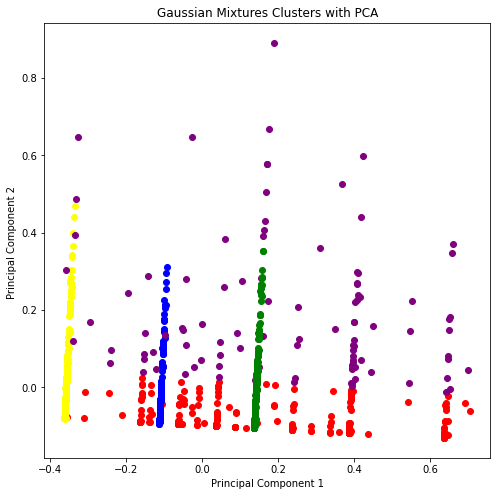

In [ ]:
plt.figure(figsize=(8, 8))
#Plotting the results
plt.scatter(df_pca[df_pca["Gaussian"] == 0]["PC1"], df_pca[df_pca["Gaussian"] == 0]["PC2"] ,color = 'red')
plt.scatter(df_pca[df_pca["Gaussian"] == 1]["PC1"], df_pca[df_pca["Gaussian"] == 1]["PC2"] , color = 'blue')
plt.scatter(df_pca[df_pca["Gaussian"] == 2]["PC1"], df_pca[df_pca["Gaussian"] == 2]["PC2"] , color = 'yellow')
plt.scatter(df_pca[df_pca["Gaussian"] == 3]["PC1"], df_pca[df_pca["Gaussian"] == 3]["PC2"] , color = 'purple')
plt.scatter(df_pca[df_pca["Gaussian"] == 4]["PC1"], df_pca[df_pca["Gaussian"] == 4]["PC2"] , color = 'green')
#plt.scatter(s[s.ses_cluster == 3]["sessions"], s[s.ses_cluster == 3]["trx_is_voucher"] , color = 'green')
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2 ")
plt.title("Gaussian Mixtures Clusters with PCA")
plt.show()

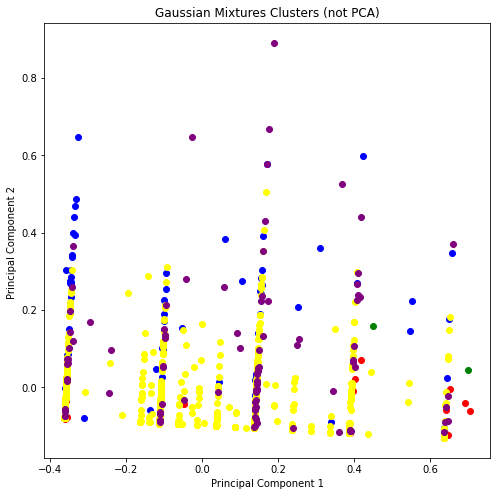

In [ ]:
plt.figure(figsize=(8, 8))
#Plotting the results
plt.scatter(df_pca[df_pca["Gaussian_noPCA"] == 0]["PC1"], df_pca[df_pca["Gaussian_noPCA"] == 0]["PC2"] ,color = 'red')
plt.scatter(df_pca[df_pca["Gaussian_noPCA"] == 1]["PC1"], df_pca[df_pca["Gaussian_noPCA"] == 1]["PC2"] , color = 'blue')
plt.scatter(df_pca[df_pca["Gaussian_noPCA"] == 2]["PC1"], df_pca[df_pca["Gaussian_noPCA"] == 2]["PC2"] , color = 'yellow')
plt.scatter(df_pca[df_pca["Gaussian_noPCA"] == 3]["PC1"], df_pca[df_pca["Gaussian_noPCA"] == 3]["PC2"] , color = 'purple')
plt.scatter(df_pca[df_pca["Gaussian_noPCA"] == 4]["PC1"], df_pca[df_pca["Gaussian_noPCA"] == 4]["PC2"] , color = 'green')
#plt.scatter(s[s.ses_cluster == 3]["sessions"], s[s.ses_cluster == 3]["trx_is_voucher"] , color = 'green')
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2 ")
plt.title("Gaussian Mixtures Clusters (not PCA)")
plt.show()

## Agglomerative Clustering

### Clusters = 2

In [ ]:
# Agglomerative Clustering Model

agglo1 = AgglomerativeClustering(n_clusters=2).fit(df_pca[["PC1","PC2"]])
agglo1.labels_

df_pca["Agglo"] = agglo1.labels_
df_num["Agglo"] = agglo1.labels_

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [ ]:
agglo2 = AgglomerativeClustering(n_clusters=2).fit(df_num_norm)
agglo2.labels_

df_pca["Agglo_noPCA"] = agglo2.labels_
df_num["Agglo_noPCA"] = agglo2.labels_

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



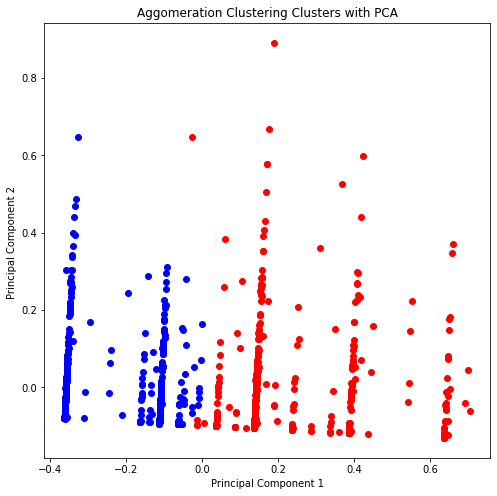

In [ ]:
plt.figure(figsize=(8, 8))
#Plotting the results
plt.scatter(df_pca[df_pca["Agglo"] == 0]["PC1"], df_pca[df_pca["Agglo"] == 0]["PC2"] ,color = 'red')
plt.scatter(df_pca[df_pca["Agglo"] == 1]["PC1"], df_pca[df_pca["Agglo"] == 1]["PC2"] , color = 'blue')
plt.scatter(df_pca[df_pca["Agglo"] == 2]["PC1"], df_pca[df_pca["Agglo"] == 2]["PC2"] , color = 'yellow')
plt.scatter(df_pca[df_pca["Agglo"] == 3]["PC1"], df_pca[df_pca["Agglo"] == 3]["PC2"] , color = 'purple')
plt.scatter(df_pca[df_pca["Agglo"] == 4]["PC1"], df_pca[df_pca["Agglo"] == 4]["PC2"] , color = 'green')
#plt.scatter(s[s.ses_cluster == 3]["sessions"], s[s.ses_cluster == 3]["trx_is_voucher"] , color = 'green')
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2 ")
plt.title("Aggomeration Clustering Clusters with PCA")
plt.show()

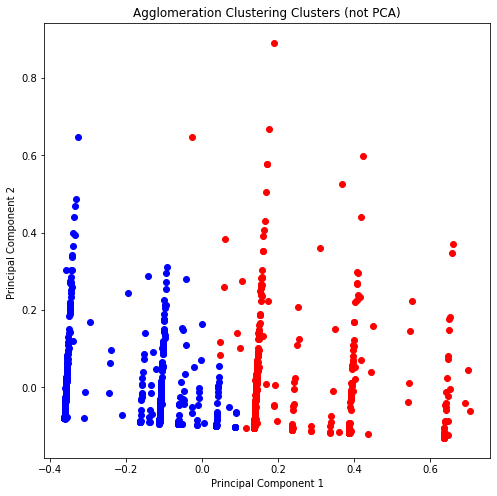

In [ ]:
plt.figure(figsize=(8, 8))
#Plotting the results
plt.scatter(df_pca[df_pca["Agglo_noPCA"] == 0]["PC1"], df_pca[df_pca["Agglo_noPCA"] == 0]["PC2"] ,color = 'red')
plt.scatter(df_pca[df_pca["Agglo_noPCA"] == 1]["PC1"], df_pca[df_pca["Agglo_noPCA"] == 1]["PC2"] , color = 'blue')
plt.scatter(df_pca[df_pca["Agglo_noPCA"] == 2]["PC1"], df_pca[df_pca["Agglo_noPCA"] == 2]["PC2"] , color = 'yellow')
plt.scatter(df_pca[df_pca["Agglo_noPCA"] == 3]["PC1"], df_pca[df_pca["Agglo_noPCA"] == 3]["PC2"] , color = 'purple')
plt.scatter(df_pca[df_pca["Agglo_noPCA"] == 4]["PC1"], df_pca[df_pca["Agglo_noPCA"] == 4]["PC2"] , color = 'green')
#plt.scatter(s[s.ses_cluster == 3]["sessions"], s[s.ses_cluster == 3]["trx_is_voucher"] , color = 'green')
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2 ")
plt.title("Agglomeration Clustering Clusters (not PCA)")
plt.show()

### Clusters = 3

In [ ]:
# Agglomerative Clustering Model

agglo1 = AgglomerativeClustering(n_clusters=3).fit(df_pca[["PC1","PC2"]])
agglo1.labels_

df_pca["Agglo"] = agglo1.labels_
df_num["Agglo"] = agglo1.labels_

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [ ]:
agglo2 = AgglomerativeClustering(n_clusters=3).fit(df_num_norm)
agglo2.labels_

df_pca["Agglo_noPCA"] = agglo2.labels_
df_num["Agglo_noPCA"] = agglo2.labels_

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



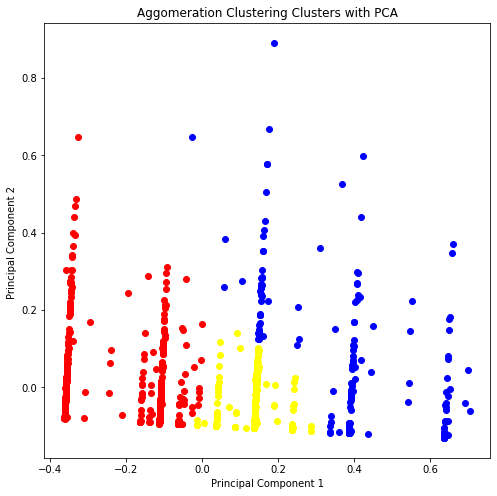

In [ ]:
plt.figure(figsize=(8, 8))
#Plotting the results
plt.scatter(df_pca[df_pca["Agglo"] == 0]["PC1"], df_pca[df_pca["Agglo"] == 0]["PC2"] ,color = 'red')
plt.scatter(df_pca[df_pca["Agglo"] == 1]["PC1"], df_pca[df_pca["Agglo"] == 1]["PC2"] , color = 'blue')
plt.scatter(df_pca[df_pca["Agglo"] == 2]["PC1"], df_pca[df_pca["Agglo"] == 2]["PC2"] , color = 'yellow')
plt.scatter(df_pca[df_pca["Agglo"] == 3]["PC1"], df_pca[df_pca["Agglo"] == 3]["PC2"] , color = 'purple')
plt.scatter(df_pca[df_pca["Agglo"] == 4]["PC1"], df_pca[df_pca["Agglo"] == 4]["PC2"] , color = 'green')
#plt.scatter(s[s.ses_cluster == 3]["sessions"], s[s.ses_cluster == 3]["trx_is_voucher"] , color = 'green')
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2 ")
plt.title("Aggomeration Clustering Clusters with PCA")
plt.show()

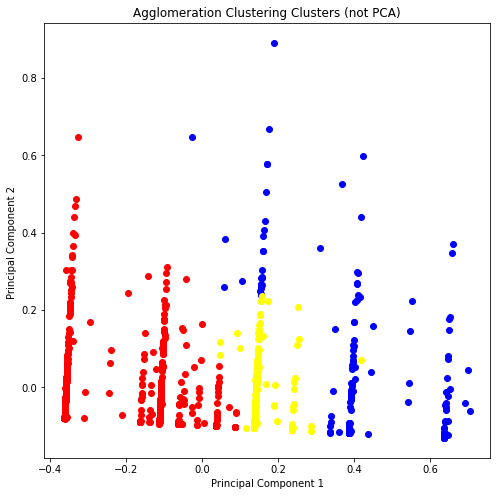

In [ ]:
plt.figure(figsize=(8, 8))
#Plotting the results
plt.scatter(df_pca[df_pca["Agglo_noPCA"] == 0]["PC1"], df_pca[df_pca["Agglo_noPCA"] == 0]["PC2"] ,color = 'red')
plt.scatter(df_pca[df_pca["Agglo_noPCA"] == 1]["PC1"], df_pca[df_pca["Agglo_noPCA"] == 1]["PC2"] , color = 'blue')
plt.scatter(df_pca[df_pca["Agglo_noPCA"] == 2]["PC1"], df_pca[df_pca["Agglo_noPCA"] == 2]["PC2"] , color = 'yellow')
plt.scatter(df_pca[df_pca["Agglo_noPCA"] == 3]["PC1"], df_pca[df_pca["Agglo_noPCA"] == 3]["PC2"] , color = 'purple')
plt.scatter(df_pca[df_pca["Agglo_noPCA"] == 4]["PC1"], df_pca[df_pca["Agglo_noPCA"] == 4]["PC2"] , color = 'green')
#plt.scatter(s[s.ses_cluster == 3]["sessions"], s[s.ses_cluster == 3]["trx_is_voucher"] , color = 'green')
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2 ")
plt.title("Agglomeration Clustering Clusters (not PCA)")
plt.show()

### Clusters = 4

In [ ]:
# Agglomerative Clustering Model

agglo1 = AgglomerativeClustering(n_clusters=4).fit(df_pca[["PC1","PC2"]])
agglo1.labels_

df_pca["Agglo"] = agglo1.labels_
df_num["Agglo"] = agglo1.labels_

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [ ]:
agglo2 = AgglomerativeClustering(n_clusters=4).fit(df_num_norm)
agglo2.labels_

df_pca["Agglo_noPCA"] = agglo2.labels_
df_num["Agglo_noPCA"] = agglo2.labels_

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



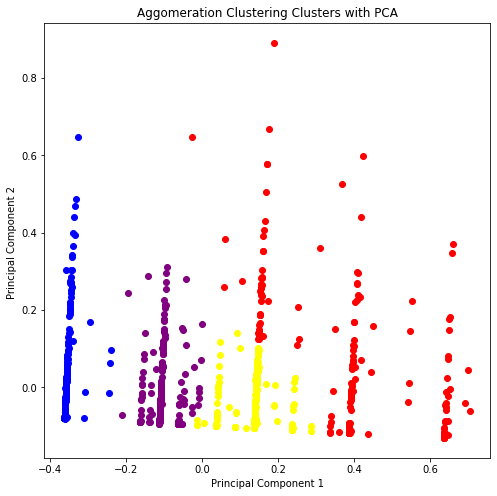

In [ ]:
plt.figure(figsize=(8, 8))
#Plotting the results
plt.scatter(df_pca[df_pca["Agglo"] == 0]["PC1"], df_pca[df_pca["Agglo"] == 0]["PC2"] ,color = 'red')
plt.scatter(df_pca[df_pca["Agglo"] == 1]["PC1"], df_pca[df_pca["Agglo"] == 1]["PC2"] , color = 'blue')
plt.scatter(df_pca[df_pca["Agglo"] == 2]["PC1"], df_pca[df_pca["Agglo"] == 2]["PC2"] , color = 'yellow')
plt.scatter(df_pca[df_pca["Agglo"] == 3]["PC1"], df_pca[df_pca["Agglo"] == 3]["PC2"] , color = 'purple')
plt.scatter(df_pca[df_pca["Agglo"] == 4]["PC1"], df_pca[df_pca["Agglo"] == 4]["PC2"] , color = 'green')
#plt.scatter(s[s.ses_cluster == 3]["sessions"], s[s.ses_cluster == 3]["trx_is_voucher"] , color = 'green')
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2 ")
plt.title("Aggomeration Clustering Clusters with PCA")
plt.show()

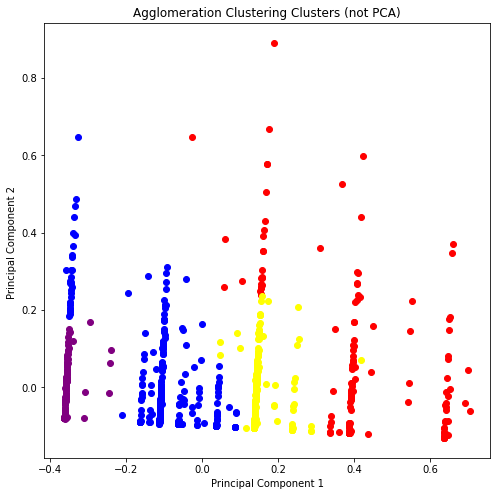

In [ ]:
plt.figure(figsize=(8, 8))
#Plotting the results
plt.scatter(df_pca[df_pca["Agglo_noPCA"] == 0]["PC1"], df_pca[df_pca["Agglo_noPCA"] == 0]["PC2"] ,color = 'red')
plt.scatter(df_pca[df_pca["Agglo_noPCA"] == 1]["PC1"], df_pca[df_pca["Agglo_noPCA"] == 1]["PC2"] , color = 'blue')
plt.scatter(df_pca[df_pca["Agglo_noPCA"] == 2]["PC1"], df_pca[df_pca["Agglo_noPCA"] == 2]["PC2"] , color = 'yellow')
plt.scatter(df_pca[df_pca["Agglo_noPCA"] == 3]["PC1"], df_pca[df_pca["Agglo_noPCA"] == 3]["PC2"] , color = 'purple')
plt.scatter(df_pca[df_pca["Agglo_noPCA"] == 4]["PC1"], df_pca[df_pca["Agglo_noPCA"] == 4]["PC2"] , color = 'green')
#plt.scatter(s[s.ses_cluster == 3]["sessions"], s[s.ses_cluster == 3]["trx_is_voucher"] , color = 'green')
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2 ")
plt.title("Agglomeration Clustering Clusters (not PCA)")
plt.show()

### Clusters = 5

In [ ]:
# Agglomerative Clustering Model

agglo1 = AgglomerativeClustering(n_clusters=5).fit(df_pca[["PC1","PC2"]])
agglo1.labels_

df_pca["Agglo"] = agglo1.labels_
df_num["Agglo"] = agglo1.labels_

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [ ]:
agglo2 = AgglomerativeClustering(n_clusters=5).fit(df_num_norm)
agglo2.labels_

df_pca["Agglo_noPCA"] = agglo2.labels_
df_num["Agglo_noPCA"] = agglo2.labels_

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



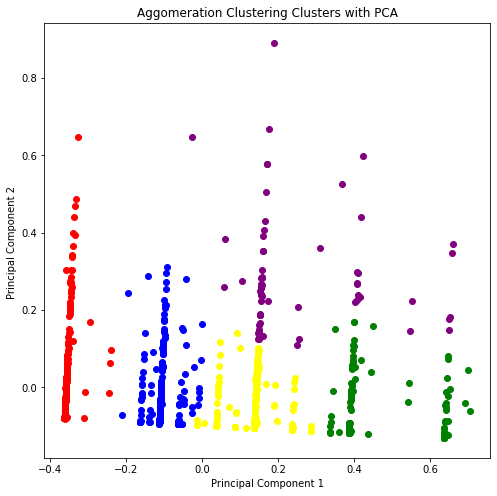

In [ ]:
plt.figure(figsize=(8, 8))
#Plotting the results
plt.scatter(df_pca[df_pca["Agglo"] == 0]["PC1"], df_pca[df_pca["Agglo"] == 0]["PC2"] ,color = 'red')
plt.scatter(df_pca[df_pca["Agglo"] == 1]["PC1"], df_pca[df_pca["Agglo"] == 1]["PC2"] , color = 'blue')
plt.scatter(df_pca[df_pca["Agglo"] == 2]["PC1"], df_pca[df_pca["Agglo"] == 2]["PC2"] , color = 'yellow')
plt.scatter(df_pca[df_pca["Agglo"] == 3]["PC1"], df_pca[df_pca["Agglo"] == 3]["PC2"] , color = 'purple')
plt.scatter(df_pca[df_pca["Agglo"] == 4]["PC1"], df_pca[df_pca["Agglo"] == 4]["PC2"] , color = 'green')
#plt.scatter(s[s.ses_cluster == 3]["sessions"], s[s.ses_cluster == 3]["trx_is_voucher"] , color = 'green')
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2 ")
plt.title("Aggomeration Clustering Clusters with PCA")
plt.show()

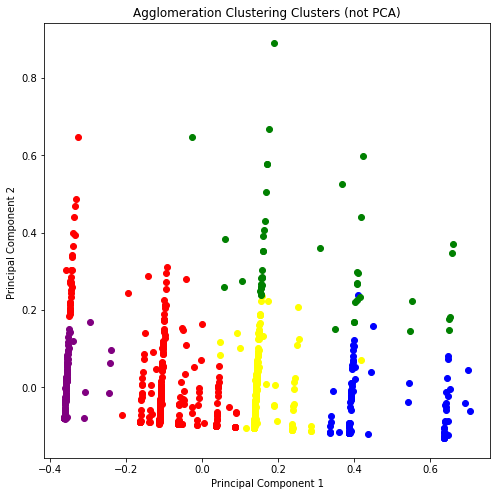

In [ ]:
plt.figure(figsize=(8, 8))
#Plotting the results
plt.scatter(df_pca[df_pca["Agglo_noPCA"] == 0]["PC1"], df_pca[df_pca["Agglo_noPCA"] == 0]["PC2"] ,color = 'red')
plt.scatter(df_pca[df_pca["Agglo_noPCA"] == 1]["PC1"], df_pca[df_pca["Agglo_noPCA"] == 1]["PC2"] , color = 'blue')
plt.scatter(df_pca[df_pca["Agglo_noPCA"] == 2]["PC1"], df_pca[df_pca["Agglo_noPCA"] == 2]["PC2"] , color = 'yellow')
plt.scatter(df_pca[df_pca["Agglo_noPCA"] == 3]["PC1"], df_pca[df_pca["Agglo_noPCA"] == 3]["PC2"] , color = 'purple')
plt.scatter(df_pca[df_pca["Agglo_noPCA"] == 4]["PC1"], df_pca[df_pca["Agglo_noPCA"] == 4]["PC2"] , color = 'green')
#plt.scatter(s[s.ses_cluster == 3]["sessions"], s[s.ses_cluster == 3]["trx_is_voucher"] , color = 'green')
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2 ")
plt.title("Agglomeration Clustering Clusters (not PCA)")
plt.show()

# Cluster Analysis 

We choose KMeans as the best model for clustering. Now , we want to choose the best cluster between 3 and 4 clusters. 

## Kmeans 

### 3 Clusters

#### Model 

In [ ]:
model1 = KMeans(n_clusters=3, random_state = 42)
model1.fit(df_pca[["PC1", "PC2"]])

#See the predictions
model1.labels_
model1.cluster_centers_

df_pca["KMeans"] = model1.labels_
df_num["KMeans"] = model1.labels_

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [ ]:
model2 = KMeans(n_clusters=3, random_state = 42)
model2.fit(df_num_norm)

#See the predictions
model2.labels_
model2.cluster_centers_

df_pca["KMeans_noPCA"] = model2.labels_
df_num["KMeans_noPCA"] = model2.labels_

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



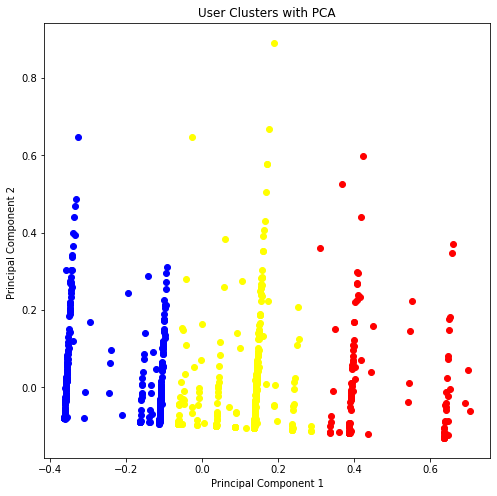

In [ ]:
plt.figure(figsize=(8, 8))
#Plotting the results
plt.scatter(df_pca[df_pca["KMeans"] == 0]["PC1"], df_pca[df_pca["KMeans"] == 0]["PC2"] ,color = 'red')
plt.scatter(df_pca[df_pca["KMeans"] == 1]["PC1"], df_pca[df_pca["KMeans"] == 1]["PC2"] , color = 'blue')
plt.scatter(df_pca[df_pca["KMeans"] == 2]["PC1"], df_pca[df_pca["KMeans"] == 2]["PC2"] ,color = 'yellow')
#plt.scatter(s[s.ses_cluster == 3]["sessions"], s[s.ses_cluster == 3]["trx_is_voucher"] , color = 'green')
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2 ")
plt.title("User Clusters with PCA")
plt.show()

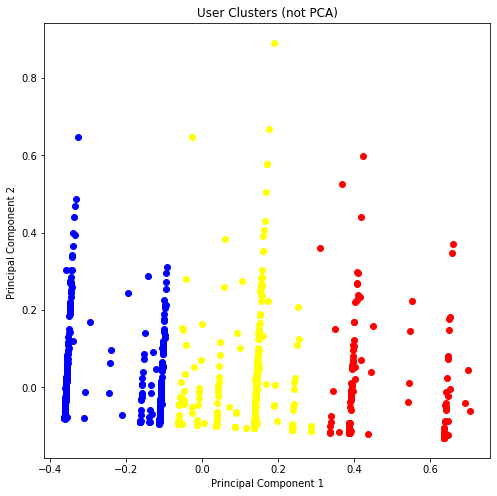

In [ ]:
plt.figure(figsize=(8, 8))
#Plotting the results
plt.scatter(df_pca[df_pca["KMeans_noPCA"] == 0]["PC1"], df_pca[df_pca["KMeans_noPCA"] == 0]["PC2"] ,color = 'red')
plt.scatter(df_pca[df_pca["KMeans_noPCA"] == 1]["PC1"], df_pca[df_pca["KMeans_noPCA"] == 1]["PC2"] , color = 'blue')
plt.scatter(df_pca[df_pca["KMeans_noPCA"] == 2]["PC1"], df_pca[df_pca["KMeans_noPCA"] == 2]["PC2"] ,color = 'yellow')
#plt.scatter(s[s.ses_cluster == 3]["sessions"], s[s.ses_cluster == 3]["trx_is_voucher"] , color = 'green')
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2 ")
plt.title("User Clusters (not PCA)")
plt.show()

#### Numerical Columns

In [ ]:
df_num.columns[:-6]

Index(['duration', 'ending_price', 'starting_price', 'market_time',
       'total_price', 'num_sales', 'asset_favorites', 'stats_total_volume',
       'primary_asset_contracts_dev_seller_fee_basis_points',
       'stats_total_supply', 'stats_count', 'stats_average_price',
       'stats_market_cap', 'stats_floor_price', 'stats_num_owners', 'KMeans',
       'KMeans_noPCA'],
      dtype='object')

In [ ]:
km_3 = df_num[df_num.columns[:-6]]
km_3_1 = km_3[km_3.KMeans_noPCA == 0]
km_3_2 = km_3[km_3.KMeans_noPCA == 1]
km_3_3 = km_3[km_3.KMeans_noPCA == 2]

In [ ]:
[b[i] for i in km_3.KMeans_noPCA.value_counts().index]

['silver', 'bronze', 'gold']

In [ ]:
b = ["gold", "silver", "bronze"]
# Cryptocurrency for NFT Payment
fig = px.pie(values=km_3.KMeans_noPCA.value_counts().values, 
             names=[b[i] for i in km_3.KMeans_noPCA.value_counts().index], 
             title='Cryptocurrency for NFT Payment',
             color_discrete_map={'silver':'silver',
                                 'bronze':'bronze', 
                                 'gold':'gold'})
fig.show()

In [ ]:
km_3.columns

Index(['duration', 'ending_price', 'starting_price', 'market_time',
       'total_price', 'num_sales', 'asset_favorites', 'stats_total_volume',
       'primary_asset_contracts_dev_seller_fee_basis_points',
       'stats_total_supply', 'stats_count', 'stats_average_price',
       'stats_market_cap', 'stats_floor_price', 'stats_num_owners', 'KMeans',
       'KMeans_noPCA'],
      dtype='object')

In [ ]:
km_3_ = [km_3_1, km_3_2, km_3_3]
col_name = ["cluster_1", "cluster_2", "cluster_3"]
plt.figure()
for col in km_3.columns[:-2] :
  print("Column =", col)
  print(pd.concat([pd.DataFrame(km_3_1[col].describe()), pd.DataFrame(km_3_2[col].describe()), pd.DataFrame(km_3_3[col].describe())], axis = 1).rename(columns = dict(zip([col for i in km_3_], col_name))))
  print()
  for cluster in km_3_ : 
    print(len(cluster[(cluster[col] >= cluster[col].min()) &(cluster[col] <= cluster[col].quantile(0.75))][[col]]) / len(cluster))
    fig = px.histogram(cluster[(cluster[col] >= cluster[col].min()) &(cluster[col] <= cluster[col].quantile(0.75))][[col]], col, nbins = 50)
    fig.show()
  print()
  print()

Column = duration
          cluster_3     cluster_3     cluster_3
count  1.010000e+02  3.750000e+02  3.510000e+02
mean   1.069787e+08  1.188266e+06  1.246523e+06
std    1.046999e+09  2.370148e+06  2.202312e+06
min    1.267800e+04  2.797750e+03  4.760600e+04
25%    6.048040e+05  3.456632e+05  3.755064e+05
50%    1.267284e+06  5.949340e+05  6.048227e+05
75%    2.813268e+06  8.701150e+05  8.876197e+05
max    1.052495e+10  2.368428e+07  1.589408e+07

0.6495726495726496


0.687041564792176


0.652605459057072




Column = ending_price
          cluster_3    cluster_3     cluster_3
count  1.020000e+02   375.000000  3.520000e+02
mean   6.135133e+08    35.542241  3.157774e+03
std    6.196167e+09   507.611199  5.922236e+04
min    1.000000e-03     0.000000  2.800000e-03
25%    1.226250e-01     0.086347  7.855357e-02
50%    2.888889e-01     0.238933  1.963417e-01
75%    1.059196e+00     0.695000  4.924977e-01
max    6.257822e+10  9298.016811  1.111111e+06

0.6495726495726496


0.6894865525672371


0.6550868486352357




Column = starting_price
          cluster_3    cluster_3     cluster_3
count  1.020000e+02   375.000000  3.520000e+02
mean   6.135133e+08    35.547714  3.157774e+03
std    6.196167e+09   507.610849  5.922236e+04
min    1.000000e-03     0.000000  2.800000e-03
25%    1.226250e-01     0.086347  7.855357e-02
50%    2.888889e-01     0.238933  1.963417e-01
75%    1.059196e+00     0.695000  4.924977e-01
max    6.257822e+10  9298.016811  1.111111e+06

0.6495726495726496


0.6894865525672371


0.6550868486352357




Column = market_time
        cluster_3   cluster_3    cluster_3
count  113.000000  396.000000   393.000000
mean   172.046445  115.552141   123.874117
std    197.345510  152.695029   176.170208
min      0.095833    0.066667     0.975000
25%      8.498000    2.664271     3.026667
50%    115.155556   52.237500    58.337500
75%    257.631373  180.867361   165.187500
max    923.350000  935.216667  1276.775000

0.7264957264957265


0.726161369193154


0.7320099255583127




Column = total_price
         cluster_3   cluster_3   cluster_3
count    96.000000  303.000000  309.000000
mean     19.748795    0.867641    0.725618
std     170.118411    3.495117    4.380932
min       0.001200    0.000000    0.000000
25%       0.083306    0.096443    0.088086
50%       0.203031    0.189125    0.167450
75%       0.662558    0.438150    0.402363
max    1666.993333   43.437690   75.000000

0.6153846153846154


0.5550122249388753


0.575682382133995




Column = num_sales
         cluster_3     cluster_3    cluster_3
count   117.000000    409.000000   403.000000
mean     26.712563     91.414397    27.303877
std     167.990684    895.090829   207.772683
min       0.000000      0.000000     0.000000
25%       1.000000      1.000000     1.000000
50%       1.500000      1.166667     1.285714
75%       2.166667      2.000000     2.166667
max    1641.000000  16098.000000  3300.000000

0.7521367521367521


0.7946210268948656


0.7518610421836228




Column = asset_favorites
        cluster_3    cluster_3    cluster_3
count  117.000000   409.000000   403.000000
mean    21.879437    56.484243    23.043045
std     99.238951   385.758862   129.021547
min      0.000000     0.000000     0.000000
25%      1.363636     1.000000     1.000000
50%      2.733333     2.428571     2.457143
75%      6.000000     5.666667     4.500000
max    949.333333  5700.000000  1600.000000

0.7777777777777778


0.7506112469437652


0.7518610421836228




Column = stats_total_volume
           cluster_3     cluster_3      cluster_3
count     117.000000    409.000000     403.000000
mean    21724.148198   2190.395847    3893.943424
std     90936.844097   6422.068474   13400.276539
min         0.250000      0.020000       0.021200
25%       197.478058     32.024999     183.161425
50%      1046.383667    329.709112     776.242396
75%      6455.952177   1404.266273    2608.170948
max    853319.102800  63536.287820  155634.128300

0.7521367521367521


0.7506112469437652


0.749379652605459




Column = primary_asset_contracts_dev_seller_fee_basis_points
        cluster_3    cluster_3   cluster_3
count  117.000000   409.000000  403.000000
mean   176.290598   893.938875  522.310174
std    118.097714   119.754707   66.795266
min      0.000000   750.000000  350.000000
25%      0.000000   750.000000  500.000000
50%    250.000000  1000.000000  500.000000
75%    250.000000  1000.000000  500.000000
max    350.000000  1000.000000  700.000000

0.905982905982906


1.0


0.7866004962779156




Column = stats_total_supply
          cluster_3      cluster_3      cluster_3
count  1.170000e+02     409.000000     403.000000
mean   3.908577e+04    5341.970660    7198.215881
std    1.980787e+05    8574.800318    9264.410134
min    3.000000e+00       1.000000       1.000000
25%    2.592000e+03     968.000000    3335.000000
50%    7.173000e+03    3467.000000    6969.000000
75%    1.002000e+04    7888.000000    9999.000000
max    2.011039e+06  118018.000000  165006.000000

0.7521367521367521


0.7506112469437652


0.7642679900744417




Column = stats_count
          cluster_3      cluster_3      cluster_3
count  1.170000e+02     409.000000     403.000000
mean   3.908577e+04    5341.970660    7198.215881
std    1.980787e+05    8574.800318    9264.410134
min    3.000000e+00       1.000000       1.000000
25%    2.592000e+03     968.000000    3335.000000
50%    7.173000e+03    3467.000000    6969.000000
75%    1.002000e+04    7888.000000    9999.000000
max    2.011039e+06  118018.000000  165006.000000

0.7521367521367521


0.7506112469437652


0.7642679900744417




Column = stats_average_price
        cluster_3   cluster_3   cluster_3
count  117.000000  409.000000  403.000000
mean     1.313196    0.465804    0.451818
std      4.522981    0.943682    1.134353
min      0.001019    0.000803    0.003029
25%      0.118734    0.098345    0.089537
50%      0.241671    0.190147    0.168863
75%      0.807024    0.424276    0.376343
max     44.115137   11.379113   15.102540

0.7521367521367521


0.7506112469437652


0.749379652605459




Column = stats_market_cap
           cluster_3      cluster_3      cluster_3
count     117.000000     409.000000     403.000000
mean    26721.994242    2584.700060    5087.565608
std    112131.851297   12668.208091   35329.562483
min         0.000000       0.000000       0.000000
25%       138.734951      59.070784     169.234711
50%       768.964521     319.224706     625.531371
75%      6430.305426    1206.373723    1878.214785
max    944892.531900  196605.923300  571438.335200

0.7521367521367521


0.7506112469437652


0.749379652605459




Column = stats_floor_price
        cluster_3   cluster_3   cluster_3
count  116.000000  407.000000  403.000000
mean     1.322788    0.485310    0.332868
std      7.507517    2.160331    0.969855
min      0.000900    0.000500    0.000600
25%      0.026750    0.035000    0.030000
50%      0.072995    0.090000    0.070000
75%      0.250000    0.289500    0.222500
max     77.000000   29.760000   11.700000

0.7692307692307693


0.7457212713936431


0.749379652605459




Column = stats_num_owners
           cluster_3    cluster_3     cluster_3
count     117.000000    409.00000    403.000000
mean     7649.153846   2638.00489   2747.947891
std     28937.982937   5563.67368   2348.490852
min         2.000000      2.00000     33.000000
25%      1176.000000    584.00000   1214.500000
50%      2409.000000   1586.00000   2447.000000
75%      4942.000000   3515.00000   3804.000000
max    285059.000000  79117.00000  28239.000000

0.7521367521367521


0.7506112469437652


0.749379652605459


<Figure size 432x288 with 0 Axes>

In [ ]:
km_3_1["unique_wallet"] = km_3_1["stats_num_owners"] / km_3_1["stats_count"] * 100 
km_3_2["unique_wallet"] = km_3_2["stats_num_owners"] / km_3_2["stats_count"] * 100 
km_3_3["unique_wallet"] = km_3_3["stats_num_owners"] / km_3_3["stats_count"] * 100 

col = "unique_wallet"
pd.concat([pd.DataFrame(km_3_1[col].describe()), pd.DataFrame(km_3_2[col].describe()), pd.DataFrame(km_3_3[col].describe())], axis = 1)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/st

unique_wallet  unique_wallet  unique_wallet
count     117.000000   4.090000e+02     403.000000
mean     1350.396188   1.154989e+04    3950.770291
std      8109.380534   1.174571e+05   30257.376207
min         1.042909   1.420142e+00       1.530000
25%        27.260274   3.416779e+01      30.497933
50%        37.200000   4.793748e+01      39.400000
75%        50.000000   6.225248e+01      50.933843
max     76950.000000   2.047100e+06  489900.000000

#### Categorical Columns

In [ ]:
km_3cat = pd.merge(df_cat, km_3[["KMeans", "KMeans_noPCA"]], how = "left", left_on  ="asset_contract_address", right_on = "asset_contract_address")
km_3cat1 = km_3cat[km_3cat.KMeans_noPCA == 0]
km_3cat2 = km_3cat[km_3cat.KMeans_noPCA == 1]
km_3cat3 = km_3cat[km_3cat.KMeans_noPCA == 2]

In [ ]:
km3cat = [km_3cat1, km_3cat2, km_3cat3]

In [ ]:
km_3cat.head()

collection_slug  \
asset_contract_address                                                                          
0x000000059619cdddc056910672abc90887136a95  [official-sekira, official-sekira, official-se...   
0x000a682feeeffc5e56a58a3b015fb07665d8a979  [baliverse-nft, baliverse-nft, baliverse-nft, ...   
0x000e49c87d2874431567d38ff9548890ab39baac  [thegoobers, thegoobers, thegoobers, thegoober...   
0x0048309a970094a68ef7eb56a561302c08c91898  [crypto-lords-nft, crypto-lords-nft, crypto-lo...   
0x006936f22c894f8196ffb3ee847349cd35219f55  [immortals-futbol-club, immortals-futbol-club,...   

                                                                                   event_type  \
asset_contract_address                                                                          
0x000000059619cdddc056910672abc90887136a95  [3, 3, 0, 3, 3, 3, 0, 0, 3, 0, 3, 3, 3, 3, 3, ...   
0x000a682feeeffc5e56a58a3b015fb07665d8a979                                    [2, 0, 1, 0, 0]   
0x000e49c87d2874431567d38ff9548890ab39baac            [0, 3, 0, 3, 3, 3, 3, 3, 3, 3, 2, 2, 2]   
0x0048309a970094a68ef7eb56a561302c08c91898  [0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, ...   
0x006936f22c894f8196ffb3ee847349cd35219f55               [2, 1, 0, 0, 2, 1, 0, 1, 2, 1, 0, 1]   

                                                                                 auction_type  \
asset_contract_address                                                                          
0x000000059619cdddc056910672abc90887136a95  [nan, nan, 0.0, nan, nan, nan, 0.0, 0.0, nan, ...   
0x000a682feeeffc5e56a58a3b015fb07665d8a979                          [nan, 0.0, nan, 0.0, 0.0]   
0x000e49c87d2874431567d38ff9548890ab39baac  [0.0, nan, 0.0, nan, nan, nan, nan, nan, nan, ...   
0x0048309a970094a68ef7eb56a561302c08c91898  [0.0, nan, 0.0, 0.0, nan, 0.0, 0.0, 0.0, nan, ...   
0x006936f22c894f8196ffb3ee847349cd35219f55  [nan, nan, 0.0, 0.0, nan, nan, 0.0, nan, nan, ...   

                                                                                   is_private  \
asset_contract_address                                                                          
0x000000059619cdddc056910672abc90887136a95  [nan, nan, 0.0, nan, nan, nan, 0.0, 0.0, nan, ...   
0x000a682feeeffc5e56a58a3b015fb07665d8a979                          [0.0, 0.0, nan, 0.0, 0.0]   
0x000e49c87d2874431567d38ff9548890ab39baac  [0.0, nan, 0.0, nan, nan, nan, nan, nan, nan, ...   
0x0048309a970094a68ef7eb56a561302c08c91898  [0.0, nan, 0.0, 0.0, nan, 0.0, 0.0, 0.0, nan, ...   
0x006936f22c894f8196ffb3ee847349cd35219f55  [0.0, nan, 0.0, 1.0, 1.0, nan, 1.0, nan, 1.0, ...   

                                                                                 created_date  \
asset_contract_address                                                                          
0x000000059619cdddc056910672abc90887136a95  [2022-03-05, 2022-03-04, 2022-03-04, 2022-03-0...   
0x000a682feeeffc5e56a58a3b015fb07665d8a979  [2022-02-07, 2022-03-05, 2022-02-07, 2022-02-0...   
0x000e49c87d2874431567d38ff9548890ab39baac  [2022-03-06, 2022-03-05, 2022-03-05, 2022-03-0...   
0x0048309a970094a68ef7eb56a561302c08c91898  [2022-03-05, 2022-03-05, 2022-03-05, 2022-03-0...   
0x006936f22c894f8196ffb3ee847349cd35219f55  [2022-03-03, 2022-03-03, 2022-03-02, 2022-03-0...   

                                                                                       name_x  \
asset_contract_address                                                                          
0x000000059619cdddc056910672abc90887136a95  [SのKIRA #3091, SのKIRA #1247, SのKIRA #1016, SのK...   
0x000a682feeeffc5e56a58a3b015fb07665d8a979                                  [Baliverse #6900]   
0x000e49c87d2874431567d38ff9548890ab39baac                       [Goober #3150, Goober #4900]   
0x0048309a970094a68ef7eb56a561302c08c91898  [Crypto Lord#339, Crypto Lord#3963, Crypto Lor...   
0x006936f22c894f8196ffb3ee847349cd35219f55   [IMMORTAL 00032, IMMORTAL 00044, IMMORTAL 00040]   

##### Trait Type

In [ ]:
def get_trait_type(row): 
  t = []
  for l in row : 
    for ele in l : 
      t.append(ele)

  return t

In [ ]:
for i, df in enumerate(km3cat) : 
  total =[]
  plt.figure()
  col = "trait_type"
  for i in range(len(df[col].apply(lambda row : get_trait_type(row)))): 
    for ele in df[col].apply(lambda row : get_trait_type(row)).iloc[i] : 
      total.append(ele)
  print(pd.Series(total).str.lower().value_counts().head(10))


length               1146
expiration date       974
registration date     974
background            280
eyes                  228
mouth                 221
clothes               137
category              126
tokenrun              120
game                  119
dtype: int64
background          1843
eyes                1656
mouth               1406
property             945
clothes              675
earrings             569
hair                 566
backgrounds          487
neck accessories     427
body                 427
dtype: int64
background    1791
mouth         1366
eyes          1228
type           984
clothes        929
skin           762
hair           744
body           732
head           562
earrings       461
dtype: int64


<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

##### Trait Type

In [ ]:
def get_trait_type(row): 
  t = []
  for l in row : 
    for ele in l : 
      t.append(ele)

  return t

In [ ]:
for i, df in enumerate(km3cat) : 
  total =[]
  plt.figure()
  col = "trait_value"
  for i in range(len(df[col].apply(lambda row : get_trait_type(row)))): 
    for ele in df[col].apply(lambda row : get_trait_type(row)).iloc[i] : 
      total.append(ele)
  print(pd.Series(total).str.lower().value_counts().head(10))
  print()

town star     80
skins         54
none          52
black         40
short name    33
storage       28
brown         23
no            23
blue          21
grey          19
dtype: int64

hidden      4238
none        1387
white        370
fcf logo     252
blue         248
black        245
common       205
green        175
brown        165
nil          154
dtype: int64

none          852
dippie        383
hq level 1    274
tropical      274
pink          273
common        262
blue          222
no            171
yellow        157
orange        149
dtype: int64



<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

##### Asset Category

In [ ]:
for i, df in enumerate(km3cat) : 
  total =[]
  plt.figure()
  col = "asset_category"
  for row in df[col]: 
    total.extend(row)
  ser = pd.Series(total)
  fig = px.pie(values= ser.map(dict(zip([i for i in range(len(df_assets2[col].dropna().unique()))], df_assets2[col].dropna().unique() ))).value_counts().sort_index().values, 
              names = ser.map(dict(zip([i for i in range(len(df_assets2[col].dropna().unique()))], df_assets2[col].dropna().unique() ))).value_counts().sort_index().index, 
              title="Cluster "+str(i)+" Asset Category")
  fig.show()

##### Auction Type

In [ ]:
for i, df in enumerate(km3cat) : 
  total =[]
  plt.figure()
  col = "auction_type"
  for row in df[col]: 
    total.extend(row)
  ser = pd.Series(total)
  fig = px.pie(values= ser.map(dict(zip([i for i in range(len(df_events2[col].dropna().unique()))], df_events2[col].dropna().unique() ))).value_counts().sort_index().values, 
              names = ser.map(dict(zip([i for i in range(len(df_events2[col].dropna().unique()))], df_events2[col].dropna().unique() ))).value_counts().sort_index().index, 
              title="Cluster "+str(i)+" Asset Category")
  fig.show()

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

In [ ]:
["trait_type"], ["trait_value"]

(['trait_type'], ['trait_value'])

### 4 Clusters

#### Model 

In [ ]:
model1 = KMeans(n_clusters=4, random_state = 42)
model1.fit(df_pca[["PC1", "PC2"]])

#See the predictions
model1.labels_
model1.cluster_centers_

df_pca["KMeans"] = model1.labels_
df_num["KMeans"] = model1.labels_

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [ ]:
model2 = KMeans(n_clusters=4, random_state = 42)
model2.fit(df_num_norm)

#See the predictions
model2.labels_
model2.cluster_centers_

df_pca["KMeans_noPCA"] = model2.labels_
df_num["KMeans_noPCA"] = model2.labels_

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



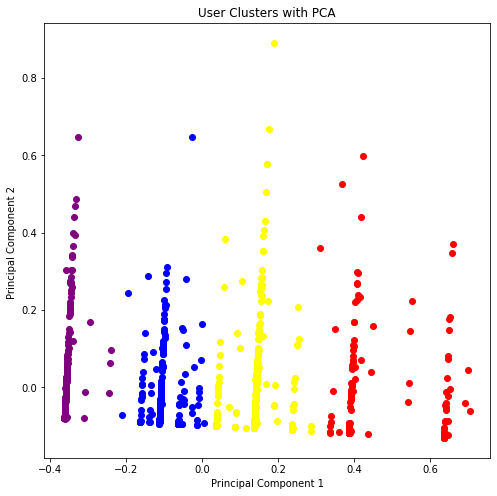

In [ ]:
plt.figure(figsize=(8, 8))
#Plotting the results
plt.scatter(df_pca[df_pca["KMeans"] == 0]["PC1"], df_pca[df_pca["KMeans"] == 0]["PC2"] ,color = 'red')
plt.scatter(df_pca[df_pca["KMeans"] == 1]["PC1"], df_pca[df_pca["KMeans"] == 1]["PC2"] , color = 'blue')
plt.scatter(df_pca[df_pca["KMeans"] == 2]["PC1"], df_pca[df_pca["KMeans"] == 2]["PC2"] ,color = 'yellow')
plt.scatter(df_pca[df_pca["KMeans"] == 3]["PC1"], df_pca[df_pca["KMeans"] == 3]["PC2"] ,color = 'purple')
#plt.scatter(s[s.ses_cluster == 3]["sessions"], s[s.ses_cluster == 3]["trx_is_voucher"] , color = 'green')
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2 ")
plt.title("User Clusters with PCA")
plt.show()

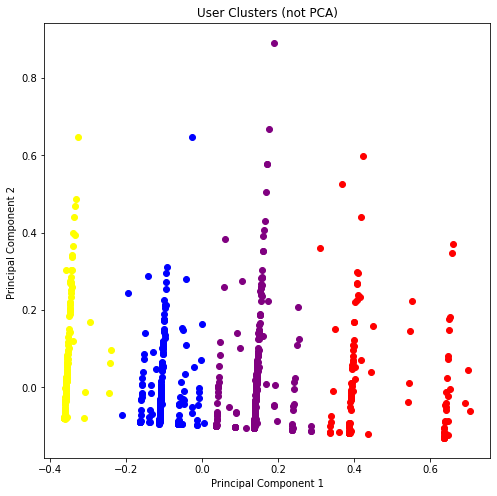

In [ ]:
plt.figure(figsize=(8, 8))
#Plotting the results
plt.scatter(df_pca[df_pca["KMeans_noPCA"] == 0]["PC1"], df_pca[df_pca["KMeans_noPCA"] == 0]["PC2"] ,color = 'red')
plt.scatter(df_pca[df_pca["KMeans_noPCA"] == 1]["PC1"], df_pca[df_pca["KMeans_noPCA"] == 1]["PC2"] , color = 'blue')
plt.scatter(df_pca[df_pca["KMeans_noPCA"] == 2]["PC1"], df_pca[df_pca["KMeans_noPCA"] == 2]["PC2"] ,color = 'yellow')
plt.scatter(df_pca[df_pca["KMeans_noPCA"] == 3]["PC1"], df_pca[df_pca["KMeans_noPCA"] == 3]["PC2"] ,color = 'purple')
#plt.scatter(s[s.ses_cluster == 3]["sessions"], s[s.ses_cluster == 3]["trx_is_voucher"] , color = 'green')
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2 ")
plt.title("User Clusters (not PCA)")
plt.show()

#### Numerical Columns

In [ ]:
km_4 = df_num
km_4_1 = km_4[km_4.KMeans_noPCA == 0]
km_4_2 = km_4[km_4.KMeans_noPCA == 1]
km_4_3 = km_4[km_4.KMeans_noPCA == 2]
km_4_4 = km_4[km_4.KMeans_noPCA == 3]

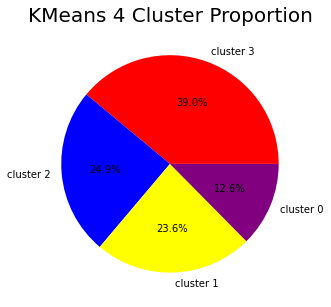

In [ ]:
plt.figure(figsize = (5,5))
plt.pie(km_4.KMeans_noPCA.value_counts().values, labels =  ["cluster " + str(i) for i in km_4.KMeans_noPCA.value_counts().index], 
        colors = ["red", "blue", "yellow", "purple"], autopct='%1.1f%%')
plt.title("KMeans 4 Cluster Proportion", fontsize=20)
plt.show()

In [ ]:
km_4_ = [km_4_1, km_4_2, km_4_3, km_4_4]
col_name = ["cluster_1", "cluster_2", "cluster_3", "cluster_4"]
plt.figure()
for col in km_4.columns[:-2] :
  print("Column =", col)
  print(pd.concat([pd.DataFrame(km_4_1[col].describe()), pd.DataFrame(km_4_2[col].describe()), pd.DataFrame(km_4_3[col].describe()), pd.DataFrame(km_4_4[col].describe())], axis = 1).rename(columns = dict(zip([col for i in km_4_], col_name))))
  print()
  for cluster in km_4_ : 
    print(len(cluster[(cluster[col] >= cluster[col].min()) &(cluster[col] <= cluster[col].quantile(0.75))][[col]]) / len(cluster))
    fig = px.histogram(cluster[(cluster[col] >= cluster[col].min()) &(cluster[col] <= cluster[col].quantile(0.75))][[col]], col, nbins = 50)
    fig.show()
  print()
  print()
  print()
  print()

Column = duration
          cluster_4     cluster_4     cluster_4     cluster_4
count  1.010000e+02  1.940000e+02  2.160000e+02  3.160000e+02
mean   1.069787e+08  1.052532e+06  1.259792e+06  1.287414e+06
std    1.046999e+09  1.645716e+06  2.733548e+06  2.297474e+06
min    1.267800e+04  1.411100e+04  2.797750e+03  4.760600e+04
25%    6.048040e+05  3.254985e+05  3.702241e+05  3.854083e+05
50%    1.267284e+06  5.581230e+05  6.048375e+05  6.048258e+05
75%    2.813268e+06  8.704577e+05  8.664878e+05  8.796996e+05
max    1.052495e+10  1.080217e+07  2.368428e+07  1.589408e+07

0.6495726495726496


0.6621004566210046


0.7012987012987013


0.6546961325966851






Column = ending_price
          cluster_4     cluster_4    cluster_4   cluster_4
count  1.020000e+02  1.940000e+02   216.000000  317.000000
mean   6.135133e+08  5.746334e+03    44.707406    1.322359
std    6.196167e+09  7.977209e+04   632.555965    6.995228
min    1.000000e-03  1.000000e-03     0.000000    0.002800
25%    1.226250e-01  8.634000e-02     0.074917    0.084000
50%    2.888889e-01  1.972989e-01     0.249997    0.199000
75%    1.059196e+00  5.032500e-01     0.740000    0.530000
max    6.257822e+10  1.111111e+06  9298.016811   85.000000

0.6495726495726496


0.6621004566210046


0.7012987012987013


0.6574585635359116






Column = starting_price
          cluster_4     cluster_4    cluster_4   cluster_4
count  1.020000e+02  1.940000e+02   216.000000  317.000000
mean   6.135133e+08  5.746344e+03    44.707804    1.322390
std    6.196167e+09  7.977209e+04   632.555938    6.995224
min    1.000000e-03  1.000000e-03     0.000000    0.002800
25%    1.226250e-01  8.634000e-02     0.074917    0.084000
50%    2.888889e-01  1.972989e-01     0.249997    0.199000
75%    1.059196e+00  5.032500e-01     0.740000    0.530000
max    6.257822e+10  1.111111e+06  9298.016811   85.000000

0.6495726495726496


0.6621004566210046


0.7012987012987013


0.6574585635359116






Column = market_time
        cluster_4   cluster_4   cluster_4   cluster_4
count  113.000000  211.000000  225.000000  353.000000
mean     3.913503    3.595609    3.121409    3.460084
std      2.111849    1.935983    2.160184    2.032092
min     -2.345145   -2.708050   -1.791759   -0.025318
25%      2.139831    2.122411    0.721897    1.107462
50%      4.746284    4.255425    3.218376    3.986158
75%      5.551530    5.216464    5.161278    5.143163
max      6.828008    6.861415    6.840778    7.152093

0.7264957264957265


0.7214611872146118


0.7316017316017316


0.7320441988950276






Column = total_price
         cluster_4   cluster_4   cluster_4   cluster_4
count    96.000000  179.000000  154.000000  279.000000
mean     19.748795    0.374918    1.316695    0.778602
std     170.118411    0.694144    4.812924    4.606888
min       0.001200    0.000000    0.000000    0.000000
25%       0.083306    0.080150    0.106350    0.090000
50%       0.203031    0.150000    0.240954    0.175000
75%       0.662558    0.304492    0.512571    0.431272
max    1666.993333    5.828850   43.437690   75.000000

0.6153846153846154


0.6118721461187214


0.49783549783549785


0.5773480662983426






Column = num_sales
        cluster_4   cluster_4   cluster_4   cluster_4
count  117.000000  219.000000  231.000000  362.000000
mean         -inf        -inf        -inf        -inf
std           NaN         NaN         NaN         NaN
min          -inf        -inf        -inf        -inf
25%      0.000000    0.000000    0.000000    0.000000
50%      0.405465    0.223144    0.000000    0.251314
75%      0.773190    0.693147    0.693147    0.777026
max      7.403061    8.951440    9.686450    8.101678

0.7521367521367521


0.7853881278538812


0.7965367965367965


0.7486187845303868






Column = asset_favorites
        cluster_4   cluster_4   cluster_4   cluster_4
count  117.000000  219.000000  231.000000  362.000000
mean         -inf        -inf        -inf        -inf
std           NaN         NaN         NaN         NaN
min          -inf        -inf        -inf        -inf
25%      0.310155    0.000000    0.188239    0.000000
50%      1.005522    0.693147    1.098612    0.916291
75%      1.791759    1.504077    1.906429    1.513280
max      6.855760    8.648221    8.411833    7.377759

0.7777777777777778


0.7579908675799086


0.7489177489177489


0.7486187845303868






Column = stats_total_volume
        cluster_4   cluster_4   cluster_4   cluster_4
count  117.000000  219.000000  231.000000  362.000000
mean     6.928502    5.937227    4.902384    6.264444
std      2.739085    2.182425    2.984638    2.502249
min     -1.386294    0.086178   -3.912023   -3.853754
25%      5.285627    4.555018    2.609184    5.128983
50%      6.953095    6.217781    5.469206    6.658464
75%      8.772758    7.332098    6.939738    7.873361
max     13.656889   10.892389   11.059366   11.955263

0.7521367521367521


0.7488584474885844


0.7489177489177489


0.7486187845303868






Column = primary_asset_contracts_dev_seller_fee_basis_points
        cluster_4   cluster_4    cluster_4   cluster_4
count  117.000000  219.000000   231.000000  362.000000
mean   176.290598  744.785388   997.896104  504.116022
std    118.097714   36.036482    13.848482   40.644637
min      0.000000  633.000000   888.000000  350.000000
25%      0.000000  750.000000  1000.000000  500.000000
50%    250.000000  750.000000  1000.000000  500.000000
75%    250.000000  750.000000  1000.000000  500.000000
max    350.000000  850.000000  1000.000000  600.000000

0.905982905982906


0.8447488584474886


1.0


0.8756906077348067






Column = stats_total_supply
        cluster_4   cluster_4   cluster_4   cluster_4
count  117.000000  219.000000  231.000000  362.000000
mean     8.491559    7.957064    7.017514    8.285440
std      2.046191    1.988374    2.553331    1.750793
min      1.098612    0.000000    0.000000    0.000000
25%      7.860185    7.708856    6.239300    8.112078
50%      8.878079    8.622454    7.824446    8.851446
75%      9.212338    9.092457    8.890519    9.210240
max     14.514162   10.740064   11.678592   12.013737

0.7521367521367521


0.7579908675799086


0.7489177489177489


0.7596685082872928






Column = stats_count
        cluster_4   cluster_4   cluster_4   cluster_4
count  117.000000  219.000000  231.000000  362.000000
mean     8.491559    7.957064    7.017514    8.285440
std      2.046191    1.988374    2.553331    1.750793
min      1.098612    0.000000    0.000000    0.000000
25%      7.860185    7.708856    6.239300    8.112078
50%      8.878079    8.622454    7.824446    8.851446
75%      9.212338    9.092457    8.890519    9.210240
max     14.514162   10.740064   11.678592   12.013737

0.7521367521367521


0.7579908675799086


0.7489177489177489


0.7596685082872928






Column = stats_average_price
        cluster_4   cluster_4   cluster_4   cluster_4
count  117.000000  219.000000  231.000000  362.000000
mean    -1.202540   -1.661772   -1.578394   -1.652848
std      1.563330    1.070955    1.350160    1.283291
min     -6.888798   -4.879510   -7.127384   -5.799664
25%     -2.130871   -2.317302   -2.340187   -2.402103
50%     -1.420178   -1.741003   -1.563315   -1.731449
75%     -0.214402   -1.107914   -0.793436   -0.929582
max      3.786803    1.804660    2.431780    2.714863

0.7521367521367521


0.7488584474885844


0.7489177489177489


0.7486187845303868






Column = stats_market_cap
        cluster_4   cluster_4   cluster_4   cluster_4
count  117.000000  219.000000  231.000000  362.000000
mean         -inf        -inf        -inf        -inf
std           NaN         NaN         NaN         NaN
min          -inf        -inf        -inf        -inf
25%      4.932565    5.070858    3.577912    5.084562
50%      6.645045    6.033749    5.429911    6.534737
75%      8.768777    7.118520    7.007321    7.607327
max     13.758826   10.548682   12.188957   13.255912

0.7521367521367521


0.7488584474885844


0.7489177489177489


0.7486187845303868






Column = stats_floor_price
        cluster_4   cluster_4   cluster_4   cluster_4
count  116.000000  219.000000  229.000000  362.000000
mean    -2.469954   -2.494514   -2.261801   -2.451885
std      1.999619    1.397863    1.760087    1.707511
min     -7.013116   -6.725434   -7.600902   -7.418581
25%     -3.621353   -3.355273   -3.402198   -3.506558
50%     -2.618212   -2.590267   -2.353878   -2.529489
75%     -1.386294   -1.609438   -1.146832   -1.386294
max      4.343805    1.252763    3.393165    2.459589

0.7692307692307693


0.7534246575342466


0.7445887445887446


0.7486187845303868






Column = stats_num_owners
           cluster_4    cluster_4     cluster_4     cluster_4
count     117.000000   219.000000    231.000000    362.000000
mean     7649.153846  2418.333333   2805.887446   2786.165746
std     28937.982937  1790.842666   7230.700773   2413.152428
min         2.000000    19.000000      2.000000     33.000000
25%      1176.000000   877.000000    420.500000   1238.500000
50%      2409.000000  2048.000000   1106.000000   2513.000000
75%      4942.000000  3641.500000   3079.500000   3830.750000
max    285059.000000  9442.000000  79117.000000  28239.000000

0.7521367521367521


0.7488584474885844


0.7489177489177489


0.7486187845303868






Column = KMeans
       cluster_4  cluster_4  cluster_4  cluster_4
count      117.0      219.0      231.0      362.0
mean         0.0        1.0        3.0        2.0
std          0.0        0.0        0.0        0.0
min          0.0        1.0        3.0        2.0
25%          0.0        1.0        3.0        2.0
50%          0.0        1.0        3.0        2.0
75%          0.0        1.0        3.0        2.0
max          0.0        1.0        3.0        2.0

1.0


1.0


1.0


1.0






Column = KMeans_noPCA
       cluster_4  cluster_4  cluster_4  cluster_4
count      117.0      219.0      231.0      362.0
mean         0.0        1.0        2.0        3.0
std          0.0        0.0        0.0        0.0
min          0.0        1.0        2.0        3.0
25%          0.0        1.0        2.0        3.0
50%          0.0        1.0        2.0        3.0
75%          0.0        1.0        2.0        3.0
max          0.0        1.0        2.0        3.0

1.0


1.0


1.0


1.0






Column = Spectral
        cluster_4   cluster_4   cluster_4   cluster_4
count  117.000000  219.000000  231.000000  362.000000
mean     1.461538    0.465753    3.584416    0.497238
std      0.846274    0.868652    0.813217    1.109637
min      1.000000    0.000000    2.000000    0.000000
25%      1.000000    0.000000    4.000000    0.000000
50%      1.000000    0.000000    4.000000    0.000000
75%      1.000000    0.000000    4.000000    0.000000
max      3.000000    4.000000    4.000000    3.000000

0.7692307692307693


0.771689497716895


1.0


0.8287292817679558






Column = Spectral_noPCA
        cluster_4   cluster_4   cluster_4   cluster_4
count  117.000000  219.000000  231.000000  362.000000
mean     1.256410    0.977169    2.264069    0.698895
std      0.811064    1.717270    0.675316    1.512807
min      1.000000    0.000000    2.000000    0.000000
25%      1.000000    0.000000    2.000000    0.000000
50%      1.000000    0.000000    2.000000    0.000000
75%      1.000000    0.000000    2.000000    0.000000
max      4.000000    4.000000    4.000000    4.000000

0.905982905982906


0.7534246575342466


0.8658008658008658


0.8232044198895028






Column = Gaussian
        cluster_4   cluster_4   cluster_4   cluster_4
count  117.000000  219.000000  231.000000  362.000000
mean     1.205128    0.890411    2.000000    3.295580
std      1.477057    0.770350    0.323029    1.450354
min      0.000000    0.000000    0.000000    0.000000
25%      0.000000    0.000000    2.000000    4.000000
50%      0.000000    1.000000    2.000000    4.000000
75%      3.000000    1.000000    2.000000    4.000000
max      3.000000    3.000000    3.000000    4.000000

1.0


0.9178082191780822


0.9653679653679653


1.0






Column = Gaussian_noPCA
        cluster_4   cluster_4   cluster_4   cluster_4
count  117.000000  219.000000  231.000000  362.000000
mean     1.940171    1.977169    1.904762    2.049724
std      0.853902    0.400034    0.543358    0.418098
min      0.000000    0.000000    0.000000    0.000000
25%      2.000000    2.000000    2.000000    2.000000
50%      2.000000    2.000000    2.000000    2.000000
75%      2.000000    2.000000    2.000000    2.000000
max      4.000000    3.000000    3.000000    3.000000

0.7948717948717948


0.9360730593607306


0.9134199134199135


0.8895027624309392


<Figure size 432x288 with 0 Axes>

In [ ]:
km_4_1["stats_num_owners"] / km_4_1["stats_count"] * 100 

asset_contract_address
0x015b192a652129f6ea8c03dddb030297cf721af2     14497.706116
0x049aba7510f45ba5b64ea9e658e342f904db358d    511269.252341
0x05844e9ae606f9867ae2047c93cac370d54ab2e1     48236.383520
0x05a46f1e545526fb803ff974c790acea34d1f2d6     20060.583553
0x05dbbe4baed86d9b1da83e67dea6326e2617dad2    373817.673755
                                                  ...      
0xf497253c2bb7644ebb99e4d9ecc104ae7a79187a     31037.992370
0xf75140376d246d8b1e5b8a48e3f00772468b3c0c     43969.654085
0xf9b899e6e84f6383f99b262eda36c9bddd5fc080     13509.774748
0xfaafdc07907ff5120a76b34b731b278c38d6043c     37956.621707
0xfb5ecf2ebf1b02c26ad1736fd79cab11367de7bb      4918.452904
Length: 117, dtype: float64

In [ ]:
km_4_1["unique_wallet"] = km_4_1["stats_num_owners"] / km_4_1["stats_count"] * 100 
km_4_2["unique_wallet"] = km_4_2["stats_num_owners"] / km_4_2["stats_count"] * 100 
km_4_3["unique_wallet"] = km_4_3["stats_num_owners"] / km_4_3["stats_count"] * 100 
km_4_4["unique_wallet"] = km_4_4["stats_num_owners"] / km_4_4["stats_count"] * 100 
col = "unique_wallet"
pd.concat([pd.DataFrame(km_4_1[col].describe()), pd.DataFrame(km_4_2[col].describe()), pd.DataFrame(km_4_3[col].describe()), pd.DataFrame(km_4_4[col].describe())], axis = 1)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/st

unique_wallet  unique_wallet  unique_wallet  unique_wallet
count   1.170000e+02   2.190000e+02   2.310000e+02   3.620000e+02
mean    7.392450e+04            inf            inf            inf
std     2.214724e+05            NaN            NaN            NaN
min     6.676164e+01   5.978502e+02   9.617967e+01   9.214120e+02
25%     1.449771e+04   1.191844e+04   6.920843e+03   1.519180e+04
50%     2.887893e+04   2.688314e+04   1.763240e+04   2.949194e+04
75%     5.477437e+04   4.529282e+04   4.140233e+04   4.460090e+04
max     2.136544e+06            inf            inf            inf

#### Categorical Columns